# About the data

* With the rise in the variety of cars with differentiated capabilities and features such as model, production year, category, brand, fuel type, engine volume, mileage, cylinders, colour, airbags and many more, we are bringing a car price prediction challenge for all. We all aspire to own a car within budget with the best features available. To solve the price problem we have created a dataset of 19237 for the training dataset and 8245 for the test dataset.

## Attribute Description:

* ID
* **Price: price of the care(Target Column)**
* Levy
* Manufacturer
* Model
* Prod. year
* Category
* Leather interior
* Fuel type
* Engine volume
* Mileage
* Cylinders
* Gear box type
* Drive wheels
* Doors
* Wheel
* Color
* Airbags

# **Preparing Workspace**

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
print('Data is loaded')

Data is loaded


# Preliminary analysis

## Preview of dataset

In [3]:
train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
train.describe(include='object')

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   object 
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   object 
 9   Mileage           8245 non-null   object 
 10  Cylinders         8245 non-null   int64  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null   int64  


## Shape of datasets

In [8]:
print(f'Shape of the Train Dataset is: {train.shape}')
print(f'Shape of the Test Dataset is: {test.shape}')

Shape of the Train Dataset is: (19237, 18)
Shape of the Test Dataset is: (8245, 18)



# data pre-processing PT1

In [9]:
train.dropna(how='any')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


Removing the column "Levy" from both datasets

In [10]:
train.drop('Levy', axis=1, inplace=True)
test.drop('Levy', axis=1, inplace=True)

Removing the column "id" from both datasets

In [11]:
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)


First of all I'm going to start by taking out the spaces in the columns names

In [12]:
train.columns = train.columns.str.lower().str.replace(' ', '_')
test.columns = test.columns.str.lower().str.replace(' ', '_')
train.columns = train.columns.str.lower().str.replace('.', '')
test.columns = test.columns.str.lower().str.replace('.', '')

converting 'mileage' from string to float

In [13]:
train['mileage'] = train['mileage'].str.replace('km', '')
test['mileage'] = test['mileage'].str.replace('km', '')

In [14]:
train['mileage'] = train['mileage'].apply(np.float64)
test['mileage'] = test['mileage'].apply(np.float64)

converting 'price' from int to float

In [15]:
train["price"] = train["price"].apply(np.float64)

replacing spaces with "-" both in training and testing

In [16]:
train['model']=train['model'].str.replace(' ','_')
train['model']=train['model'].str.replace('_','_')
train['manufacturer']=train['manufacturer'].str.replace(' ','_')
train['manufacturer']=train['manufacturer'].str.replace('-','_')
train['engine_volume']=train['engine_volume'].str.replace(' ','_')
train['fuel_type']=train['fuel_type'].str.replace(' ','_')
train['fuel_type']=train['fuel_type'].str.replace('-','_')
train['wheel']=train['wheel'].str.replace(' ','_')
train['wheel']=train['wheel'].str.replace('-','_')
train['category']=train['category'].str.replace(' ','_')
train['doors']=train['doors'].str.replace('-','_')

In [17]:
test['model'] = test['model'].str.replace(' ', '_')
train['model']=train['model'].str.replace('_','_')
test['manufacturer'] = test['manufacturer'].str.replace(' ', '_')
test['manufacturer'] = test['manufacturer'].str.replace('-', '_')
test['engine_volume'] = test['engine_volume'].str.replace(' ', '_')
test['fuel_type'] = test['fuel_type'].str.replace(' ', '_')
test['fuel_type'] = test['fuel_type'].str.replace('-', '_')
test['wheel'] = test['wheel'].str.replace(' ', '_')
test['wheel'] = test['wheel'].str.replace('-', '_')
test['category'] = test['category'].str.replace(' ', '_')
test['doors'] = test['doors'].str.replace('-', '_')

create a new column "Turbo"

In [18]:
lista_turbo_train = []

for valor in train['engine_volume']:
    if valor.strip().endswith('_Turbo'):
        lista_turbo_train.append('com_turbo')
    else:
        lista_turbo_train.append('sem_turbo')

train['turbo'] = lista_turbo_train

In [19]:
lista_turbo_test = []

for valor in test['engine_volume']:
    if valor.strip().endswith('_Turbo'):
        lista_turbo_test.append('com_turbo')
    else:
        lista_turbo_test.append('sem_turbo')

test['turbo'] = lista_turbo_test

removing "_Turbo" from engine_volume column

In [20]:
for i in range(len(train['engine_volume'])):
    valor = train['engine_volume'].iloc[i]
    if valor.endswith('_Turbo'):
        train['engine_volume'].iloc[i] = valor.replace('_Turbo', '')

In [21]:
for i in range(len(test['engine_volume'])):
    valor = test['engine_volume'].iloc[i]
    if valor.endswith('_Turbo'):
        test['engine_volume'].iloc[i] = valor.replace('_Turbo', '')

converting 'engine_volume' from string to float

In [22]:
train['engine_volume'] = train['engine_volume'].apply(np.float64)
test['engine_volume'] = test['engine_volume'].apply(np.float64)

count for all category columns

In [23]:
categorical_columns_for_count = ['manufacturer','prod_year','category','fuel_type','engine_volume','cylinders','gear_box_type','drive_wheels','doors','wheel','color','model']

In [24]:
# Iterate over each categorical column and get the value counts
for column in categorical_columns_for_count:
    value_counts = train[column].value_counts()
    print(f"Value counts for '{column}':")
    print(value_counts.tail(49))
    print()

Value counts for 'manufacturer':
MAZDA           183
JEEP            138
DAEWOO           91
DODGE            91
FIAT             78
SUZUKI           76
PORSCHE          54
LAND_ROVER       49
VAZ              48
MINI             48
JAGUAR           42
RENAULT          37
INFINITI         30
CHRYSLER         26
SKODA            20
VOLVO            19
PEUGEOT          17
BUICK            16
LINCOLN          15
ACURA            15
GMC              15
CADILLAC         14
DAIHATSU         13
GAZ              12
UAZ              12
CITROEN           9
SCION             7
HUMMER            5
MASERATI          4
MERCURY           4
ISUZU             4
ALFA_ROMEO        4
MOSKVICH          4
ROVER             3
FERRARI           2
SAAB              2
ROLLS_ROYCE       2
სხვა              2
SEAT              2
ZAZ               2
BENTLEY           2
LANCIA            1
HAVAL             1
LAMBORGHINI       1
TESLA             1
PONTIAC           1
SATURN            1
ASTON_MARTIN      1
GREATWA

In [25]:
# Iterate over each categorical column and get the value counts
for column in categorical_columns_for_count:
    value_counts = test[column].value_counts()
    print(f"Value counts for '{column}':")
    print(value_counts.tail(40))
    print()

Value counts for 'manufacturer':
VAZ             32
MINI            30
LAND_ROVER      26
INFINITI        19
PORSCHE         16
ACURA           13
JAGUAR          12
CHRYSLER        12
RENAULT         10
SKODA            8
VOLVO            8
GAZ              7
BUICK            7
GMC              7
LINCOLN          7
CADILLAC         6
UAZ              5
PEUGEOT          5
ISUZU            5
DAIHATSU         5
SCION            3
ALFA_ROMEO       3
CITROEN          3
MASERATI         2
ZAZ              2
ROVER            2
GREATWALL        2
FERRARI          2
SAAB             2
სხვა             2
MERCURY          2
SATURN           1
TESLA            1
TATA             1
ASTON_MARTIN     1
FOTON            1
HUMMER           1
MG               1
MOSKVICH         1
BENTLEY          1
Name: manufacturer, dtype: int64

Value counts for 'prod_year':
2016    653
2010    616
2017    384
2008    322
2009    249
2007    205
2018    180
2005    173
2003    159
2004    157
2006    138
2002    121

removing some car brands that appears less than 5 times

In [26]:
num_brands_train = train['manufacturer'].nunique()
num_brands_test = test['manufacturer'].nunique()
print("Number of brands on train dataset:", num_brands_train)
print("Number of brands on test dataset:", num_brands_test)

Number of brands on train dataset: 65
Number of brands on test dataset: 62


In [27]:
# Compute value counts of manufacturer in train DataFrame
manufacturer_counts_train = train['manufacturer'].value_counts()

# Get brands that appear at least 5 times
selected_brands_train = manufacturer_counts_train[manufacturer_counts_train >= 30].index.tolist()

# Filter train and test DataFrames
train = train[train['manufacturer'].isin(selected_brands_train)]

# Compute value counts of manufacturer in test DataFrame
manufacturer_counts_test = test['manufacturer'].value_counts()

# Get brands that appear at least 5 times
selected_brands_test= manufacturer_counts_test[manufacturer_counts_test >= 20].index.tolist()

test= test[test['manufacturer'].isin(selected_brands_test)]

In [28]:
num_brands_train_now = train['manufacturer'].nunique()
num_brands_test_now = test['manufacturer'].nunique()
print("Number of brands on train dataset:", num_brands_train_now)
print("Number of brands on test dataset:", num_brands_test_now)

Number of brands on train dataset: 29
Number of brands on test dataset: 25


removing some car models that appears less than 5 times

In [29]:
num_models_train = train['model'].nunique()
num_models_test = test['model'].nunique()
print("Number of models on train dataset:", num_models_train)
print("Number of models on test dataset:", num_models_test)

Number of models on train dataset: 1465
Number of models on test dataset: 884


In [30]:
# Compute value counts of manufacturer in train DataFrame
model_counts_train = train['model'].value_counts()

# Get brands that appear at least 5 times
selected_model_train = model_counts_train[model_counts_train >= 5].index.tolist()

# Filter train and test DataFrames
train = train[train['model'].isin(selected_model_train)]

# Compute value counts of manufacturer in test DataFrame
model_counts_test = test['model'].value_counts()

# Get brands that appear at least 5 times
selected_model_test= model_counts_test[model_counts_test >= 5].index.tolist()

test= test[test['model'].isin(selected_model_test)]

In [31]:
num_models_train_now = train['model'].nunique()
num_models_test_now = test['model'].nunique()
print("Number of models on train dataset:", num_models_train_now)
print("Number of models on test dataset:", num_models_test_now)

Number of models on train dataset: 313
Number of models on test dataset: 200


Final Shape

In [32]:
print(f'Shape of the Train Dataset is: {train.shape}')
print(f'Shape of the Test Dataset is: {test.shape}')

Shape of the Train Dataset is: (17361, 17)
Shape of the Test Dataset is: (7124, 17)


In [33]:
test = test.reset_index(drop=True)

In [34]:
train=train.reset_index(drop=True)

checking that the data is symmetric

In [35]:
from scipy import stats

* Value between -1 and 1 - symmetric distribution.
* Value greater than 1 - positive skewed distribution.
* Value greater than -1 - negative skewed distribution.

In [36]:
price_skew=stats.skew(train.price)
mileage_skew=stats.skew(train.mileage)

print(price_skew)
print(mileage_skew)


130.3486550122831
38.37818279411081


In [37]:
mileage_skew=stats.skew(test.mileage)


print(mileage_skew)


41.11853860319911


* **Apparently all variables have a distribution problem.**

In [38]:
print(train['mileage'].quantile(0.00))
print(train['mileage'].quantile(0.99))

print(test['mileage'].quantile(0.00))
print(test['mileage'].quantile(0.99))

0.0
571919.0
0.0
587601.0099999993


* In the code snippet, we check if the mileage value is less than 0.0 (train['mileage'] < 0.0). If true, we replace the value with 0.0. This is done to correct possible invalid negative mileage values.

* We also check if the mileage value is greater than 571246.8 (train['mileage'] > 571246.8). If true, we replace the value with 571246.83.

In [39]:
train['mileage'] = np.where(train['mileage'] < 0.0, 0.0, train['mileage'])
train['mileage'] = np.where(train['mileage'] > 571919.0, 571919.0, train['mileage'])
test['mileage'] = np.where(test['mileage'] < 0.0, 0.0, test['mileage'])
test['mileage'] = np.where(test['mileage'] > 587601.0099999993, 587601.0099999993, test['mileage'])

In [40]:
print(train['price'].quantile(0.09))
print(train['price'].quantile(0.99))

470.0
78403.0


* we check if the price value is less than 549.0 (train['price'] < 549.0). If true, we replace the value with 549.0.

* We also check if the price value is greater than 84675.0 (train['price'] > 84675.0). If true, we replace the value with 84675.0.

In [41]:
train['price'] = np.where(train['price'] < 470.0, 470.0, train['price'])
train['price'] = np.where(train['price'] > 78403.0, 78403.0, train['price'])

* price_skew has a value of 1.7390869330012642. This indicates that the distribution of the variable price is also moderately right-skewed. Similarly, there is a longer tail on the right side of the distribution, indicating the presence of larger values.

* mileage_skew has a value of 1.3739821876848939. This indicates that the distribution of the variable mileage is moderately right-skewed as well. Again, there is a longer tail on the right side of the distribution, suggesting the presence of larger mileage values.

In [42]:
price_skew=stats.skew(train.price)
mileage_skew=stats.skew(train.mileage)


print(price_skew)
print(mileage_skew)

1.5675491859197725
1.3908401781555324


In [43]:
mileage_skew=stats.skew(test.mileage)


print(mileage_skew)

1.3826591758302107


# Exploratory Data Analysis

### Check for Multi-Collinearity: Correlation of variables among themselves

* Mileage: There is a weak negative correlation (-0.22) between mileage and car price. This means that, in general, higher mileage is associated with lower prices.

* Cylinders: There is a moderate positive correlation (0.78) between the number of cylinders and engine volume. This indicates that cars with a greater number of cylinders tend to have a larger engine volume.

* Airbags: There is no strong correlation with other variables, with a weak negative correlation (-0.08) with price. This suggests that the presence of airbags may have a limited impact on car prices.

* Price: There is no strong correlation with other variables, except for a moderate correlation (0.31) with production year. This indicates that price may be influenced by the temporal factor, with newer cars generally having higher prices.

* Prod_year: There is a weak negative correlation (-0.21) between production year and mileage. This suggests that older cars tend to have higher mileage.

* Engine_volume: There is a moderate positive correlation (0.78) between engine volume and the number of cylinders. This indicates that cars with a larger engine volume tend to have a greater number of cylinders.

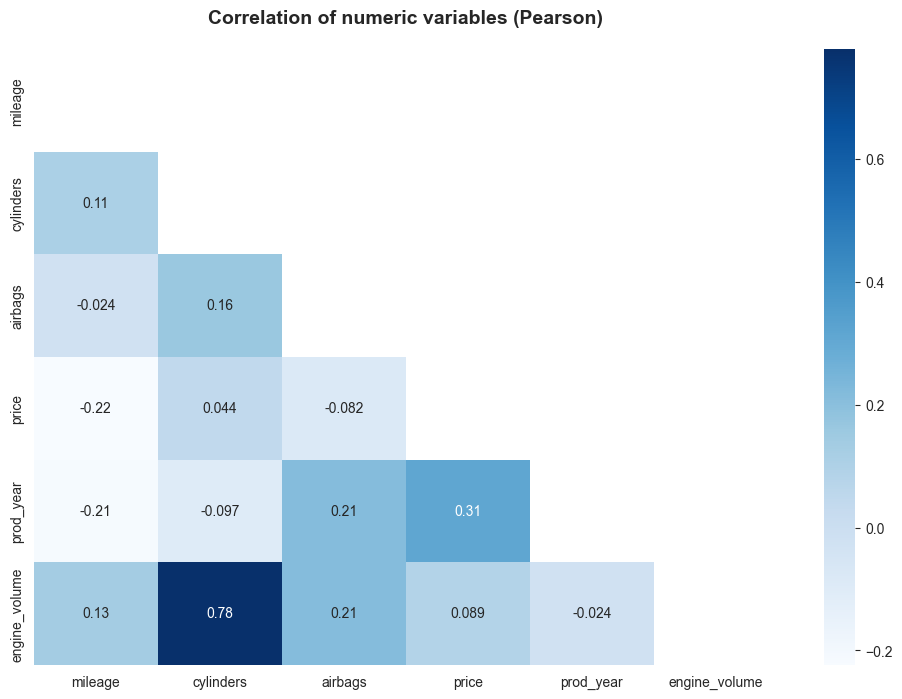

In [44]:
numeric_graph = ['mileage', 'cylinders', 'airbags','price','prod_year','engine_volume']

sns.set_style('white')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

corr_matrix = train[numeric_graph].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, mask=mask, ax=ax)
fig.text(0.5, 1.05,
         'Correlation of numeric variables (Pearson)',
         horizontalalignment='center', verticalalignment='center',
         fontsize=14, fontweight='bold', transform=ax.transAxes)
sns.set_style('dark')

### Histoplot for continuos variables

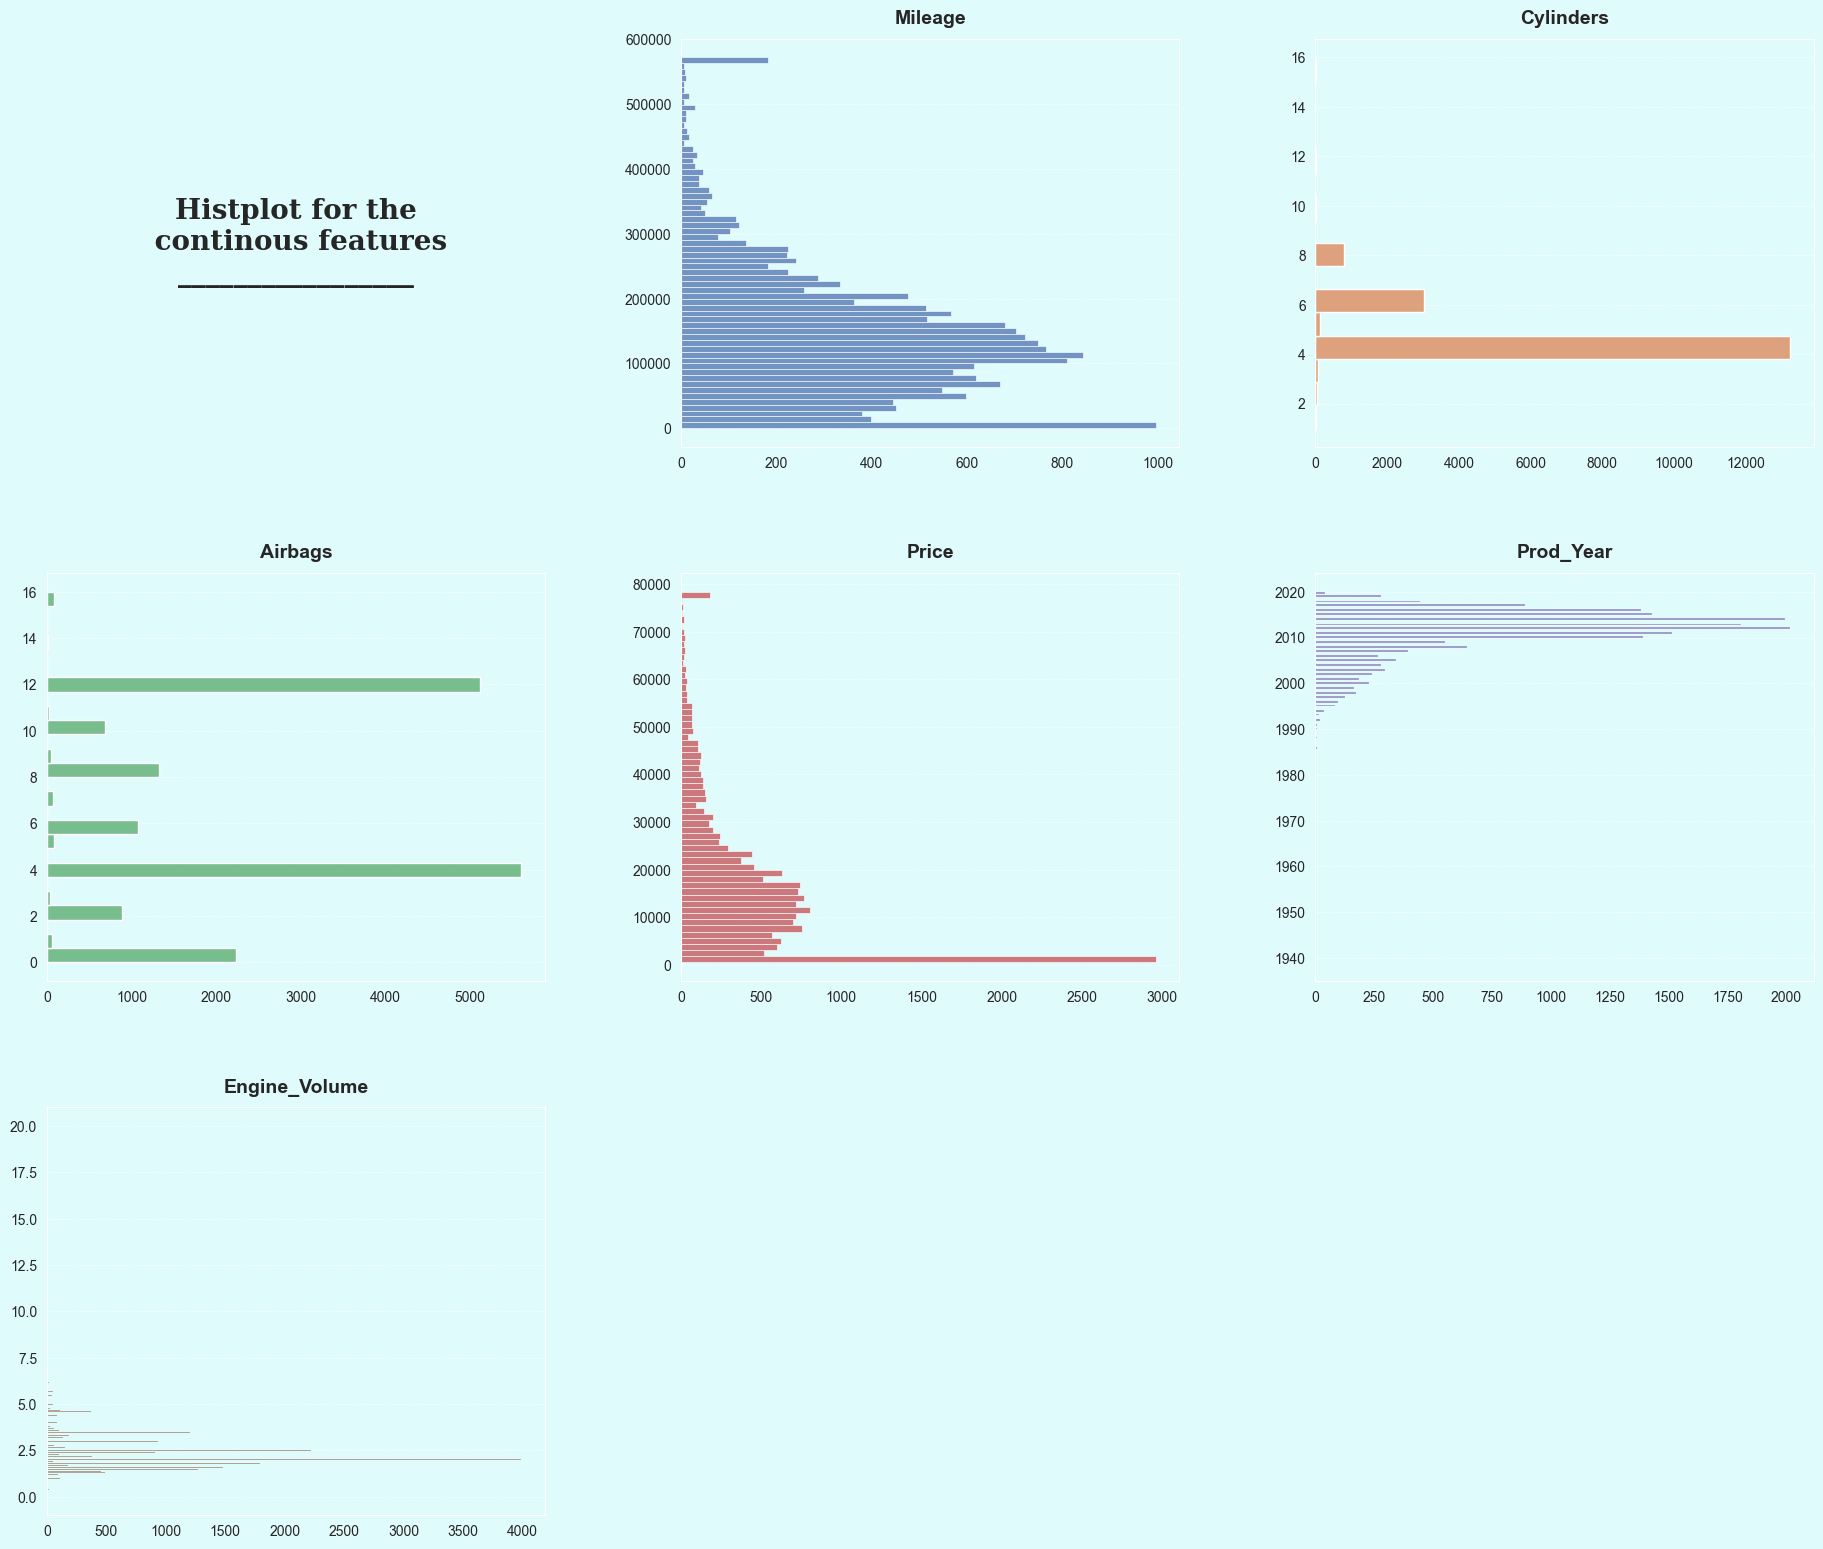

In [45]:
background_color = "#e0fbfc"
chart_count = len(numeric_graph) + 1

fig = plt.figure(figsize=(20, 17))
axes = [fig.add_subplot(3, 3, i) for i in range(1, chart_count + 1)]
fig.tight_layout(pad=7)
fig.patch.set_facecolor('#e0fbfc')

axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].set_facecolor(background_color)
axes[0].text(0.5, 0.5,
             'Histplot for the\n continous features\n_________________',
             horizontalalignment='center', verticalalignment='center',
             fontsize=20, fontweight='bold', fontfamily='serif')
for i in range(1, chart_count):
    var = numeric_graph[i - 1]
    ax = axes[i]
    ax.set_facecolor(background_color)
    ax.ticklabel_format(style='plain')
    ax.grid(axis='y', linestyle=':')
    ax.text(0.5, 1.05, var.title(),
            horizontalalignment='center', verticalalignment='center',
            fontsize=14, fontweight='bold', transform=ax.transAxes)
    color = sns.color_palette('deep')[i - 1]
    sns.histplot(data=train, y=var, ax=ax, color=color)
    ax.set_xlabel('')
    ax.set_ylabel('')

### categorical variable

* Turbo:

Cars with turbo (com_turbo) have an average price of 24,713.83 monetary units, while cars without turbo (sem_turbo) have an average price of 15,680.47 monetary units. This suggests that the presence of a turbo system increases the average price of cars.

* Airbags:

The variable "airbags" represents the number of airbags in a car. It is observed that the average price tends to increase as the number of airbags increases. Cars with a higher number of airbags tend to have a higher average price, indicating that the presence of more airbags is valued by buyers and reflects in a higher price.

However, it is important to note that the relationship between the number of airbags and the price is not linear. For example, cars with 4 airbags have a substantially higher average price than cars with 3 airbags. This may be due to other factors that also influence the price, such as the car's brand, model, age, among others.

This analysis highlights the relationship between the categorical variables (turbo and airbags) and the price of cars. It emphasizes how the presence of a turbo and the number of airbags can impact the average price of cars. However, it is important to note that there are many other factors that can also influence the price, and this analysis only captures one aspect of the relationship between these variables.



* Cylinders:

The number of cylinders in a car's engine can have an impact on its price. The analysis shows that cars with different numbers of cylinders have varying average prices. Here are some key observations:

Cars with 12 cylinders have the highest average price of 38,719.96 units, indicating that vehicles with a larger number of cylinders are associated with higher prices.

Cars with 1, 2, 3, and 7 cylinders have relatively lower average prices, ranging from around 2,800 to 16,657.28 units. These lower prices could be due to factors such as smaller engine sizes or less powerful performance.

Cars with 10 cylinders also have a high average price of 27,336.33 units, suggesting that high-performance vehicles with a greater number of cylinders tend to command higher prices.

Cars with 4, 5, 6, 8, 14, and 16 cylinders have average prices ranging from approximately 10,768 to 22,458 units. These numbers indicate a wide range of prices, which may be influenced by factors beyond just the number of cylinders, such as brand, model, and additional features.

* Drive Wheels:

The type of drive wheels (4x4, Front, Rear) can also play a role in determining the price of a car. The analysis reveals the following insights:

Cars with 4x4 drive wheels have the highest average price of 16,698.54 units, indicating that the added capability and off-road features associated with 4x4 drive systems contribute to higher prices.

Cars with Front-wheel drive have a slightly lower average price of 16,547.78 units, suggesting that these vehicles are still highly valued by buyers.

Cars with Rear-wheel drive have the lowest average price among the three categories, with an average price of 15,251.81 units. Rear-wheel drive is commonly found in sports cars and luxury vehicles, and while it offers performance benefits, it may not command as high a price premium as 4x4 or Front-wheel drive systems.

* Gear Box Type:

The type of gear box in a car (Automatic, Manual, Tiptronic, Variator) can have a significant impact on the price. Here's a detailed analysis of the average prices associated with each gear box type:

Cars with Automatic gear boxes have the highest average price of 15,726.69 units. Automatic gear boxes provide convenience and ease of use, which can contribute to the higher prices.

Cars with Manual gear boxes have a lower average price of 11,311.38 units. Manual gear boxes require more involvement from the driver and are generally less expensive to produce, resulting in lower prices.

Cars with Tiptronic gear boxes have the highest average price among the four categories, with an average of 23,666.35 units. Tiptronic gear boxes combine the features of both automatic and manual transmissions, allowing drivers to manually shift gears when desired. The added flexibility and convenience of Tiptronic systems contribute to the higher prices.

Cars with Variator gear boxes have an average price of 14,378.05 units. Variator gear boxes are continuously variable transmissions (CVTs) that provide smooth acceleration and improved fuel efficiency. While CVTs are becoming increasingly popular, their average prices remain relatively lower compared to Automatic and Tiptronic gear boxes.

* Wheel:

The location of the car's steering wheel (Left_wheel or Right_hand_drive) can also affect the price. Here's an analysis of the average prices based on the wheel type:

Cars with the steering wheel on the left side (Left_wheel) have a higher average price of 17,021.93 units. This is the standard configuration for most countries, and the higher price may be attributed to the larger market demand and availability of left-hand drive vehicles.

Cars with the steering wheel on the right side (Right_hand_drive) have a lower average price of 8,857.37 units. Right-hand drive vehicles are typically found in countries where driving is done on the left side of the road. The lower price can be attributed to factors such as limited market demand and availability.

In conclusion, the type of gear box and the location

* Doors:

The number of doors in a car can have an impact on its price. Here's an analysis of the average prices associated with different door configurations:

Cars with 2 doors (02_Mar) have an average price of 14,394.87 units. Two-door cars often have a sportier and more compact design, which can be appealing to certain buyers. However, the average price is slightly lower compared to cars with 4 or more doors.

Cars with 4 doors (04_May) have a higher average price of 16,473.37 units. Four-door cars are more practical and typically offer more interior space, making them suitable for families or those who prioritize convenience.

Cars with more than 5 doors (>5) have the highest average price among the three categories, with an average of 22,164.69 units. These cars are usually larger, providing even more space for passengers and cargo. The higher price can be attributed to the added functionality and versatility offered by these vehicles.

* Fuel Type:

The type of fuel a car uses can also influence its price. Here's an analysis of the average prices based on different fuel types:

Cars running on CNG (Compressed Natural Gas) have the lowest average price of 8,557.70 units. CNG is a cost-effective and environmentally friendly fuel option, which can contribute to the lower prices of these cars.

Diesel-powered cars have the highest average price among the listed fuel types, with an average of 23,667.25 units. Diesel engines are known for their efficiency and high torque, making them popular choices for those who frequently travel long distances or require more power.

Hybrid cars, which combine an internal combustion engine with an electric motor, have an average price of 10,375.34 units. The hybrid technology offers improved fuel efficiency and reduced emissions, contributing to the appeal of these vehicles.

Cars running on LPG (Liquefied Petroleum Gas) have an average price of 13,153.16 units. LPG is a relatively cheaper fuel option, which can contribute to the lower prices of these cars.

Petrol-powered cars have an average price of 16,341.25 units. Petrol is the most widely available fuel type and is commonly used in vehicles worldwide.

Plug-in Hybrid cars, which can be charged from an external power source and offer extended electric driving range, have the highest average price among the listed fuel types, with an average of 23,441.39 units. The advanced technology and environmental benefits of plug-in hybrids contribute to their higher prices.

In summary, the number of doors and the type of fuel used are factors that influence the price of a car. Factors such as design, practicality, efficiency, and market demand all play a role in determining the pricing variations observed






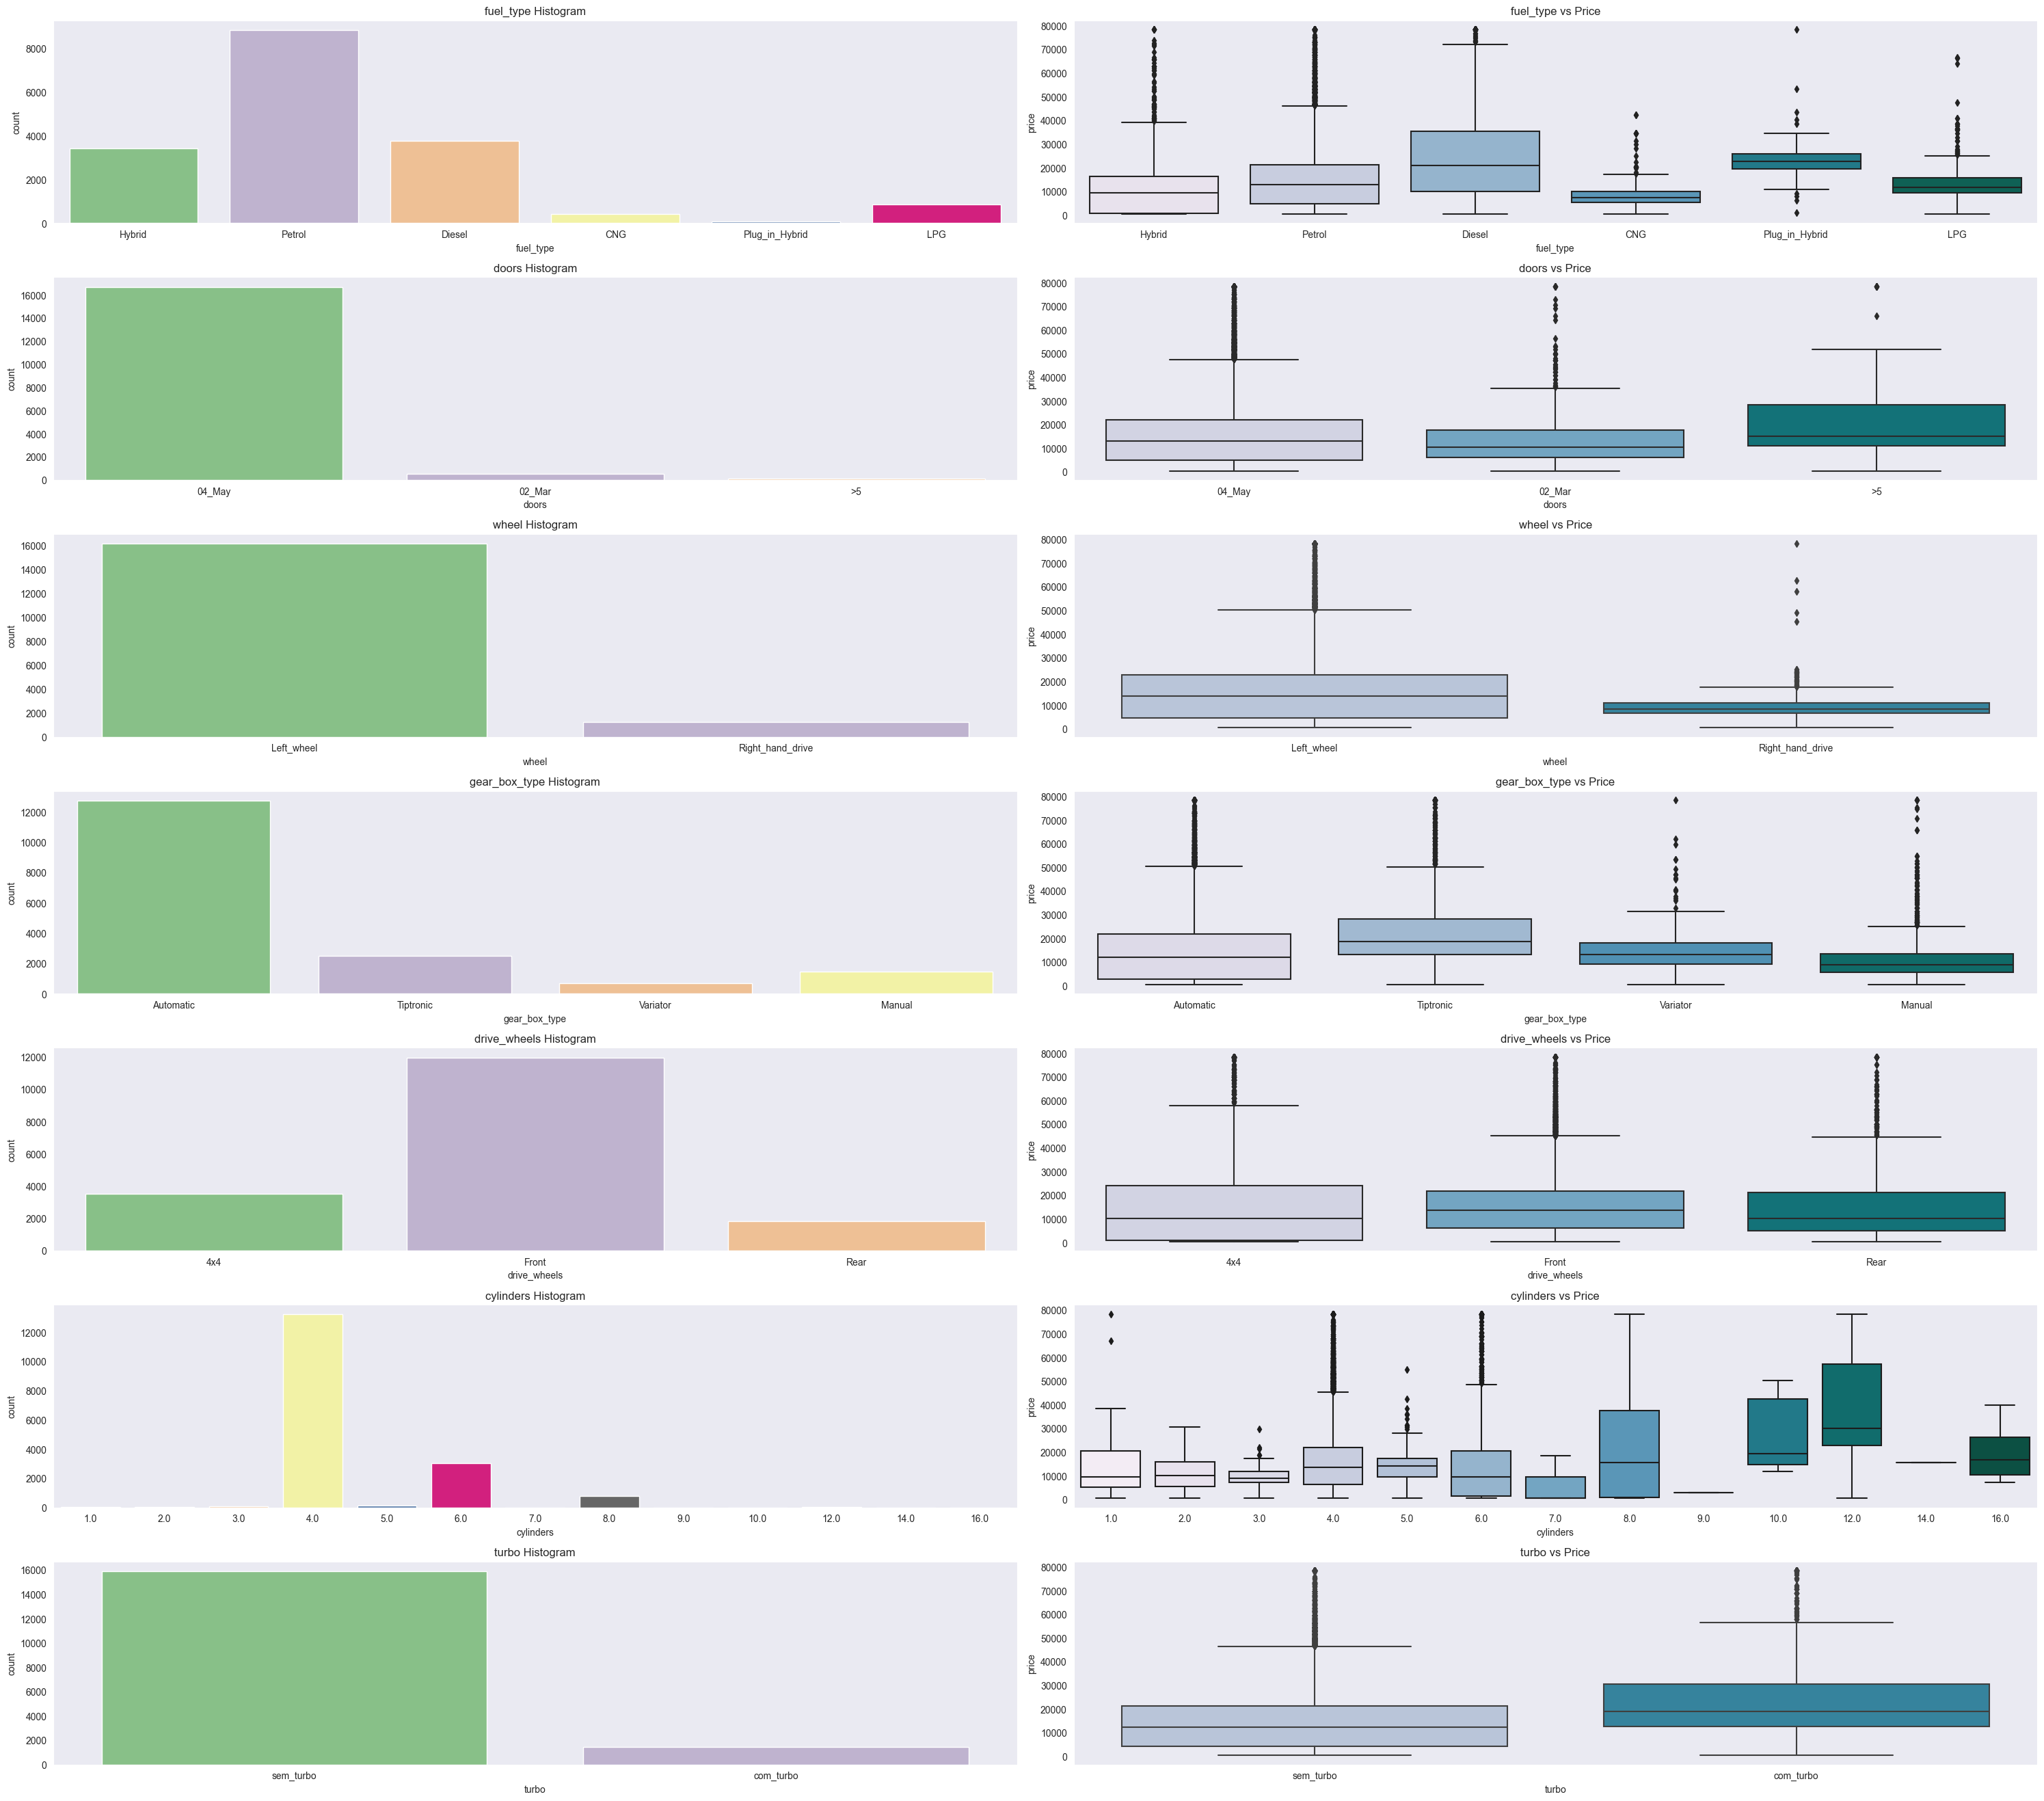

In [46]:
def plot_count(train, x, fig):
    plt.subplot(8, 2, fig)
    plt.title(x + ' Histogram')
    sns.countplot(data=train, x=x, palette="Accent")
    plt.subplot(8, 2, (fig + 1))
    plt.title(x + ' vs Price')
    sns.boxplot(data=train, x=x, y='price', palette="PuBuGn")

plt.figure(figsize=(30, 30))
plot_count(train, 'fuel_type', 3)
plot_count(train, 'doors', 5)
plot_count(train, 'wheel', 7)
plot_count(train, 'gear_box_type', 9)
plot_count(train, 'drive_wheels', 11)
plot_count(train, 'cylinders', 13)
plot_count(train, 'turbo', 15)

variaveis=['turbo','cylinders','drive_wheels','gear_box_type','wheel','doors','fuel_type']

plt.tight_layout()

In [47]:
grouped_data = train.groupby(['turbo', 'airbags', 'cylinders', 'drive_wheels', 'gear_box_type', 'wheel', 'doors', 'fuel_type'])['price'].mean()

**MANUFACTURER**

* In the given dataset, Hyundai is the most frequently occurring car manufacturer, accounting for 37.69% of the total observations. Interestingly, Hyundai also has the highest average price among the listed manufacturers, with an average price of $22,267.18.

* The second most common brand is Toyota, representing 36.62% of the dataset. However, when considering the average price, BMW emerges as the brand with the second-highest average price, standing at $20,094.27. This suggests that although Toyota is popular in terms of frequency, it does not have the second-highest average price.

* Mercedes-Benz is the third most commonly occurring brand, comprising 20.76% of the dataset. Yet, it is Lexus, the third brand with the highest average price, that stands out. With an average price of $18,690.61, Lexus surpasses Mercedes-Benz in terms of price despite its lower occurrence.

* These insights highlight the dynamics between brand frequency and average price in the dataset, with Hyundai leading both in terms of occurrence and average price, followed by Toyota and BMW, and finally Mercedes-Benz and Lexus.

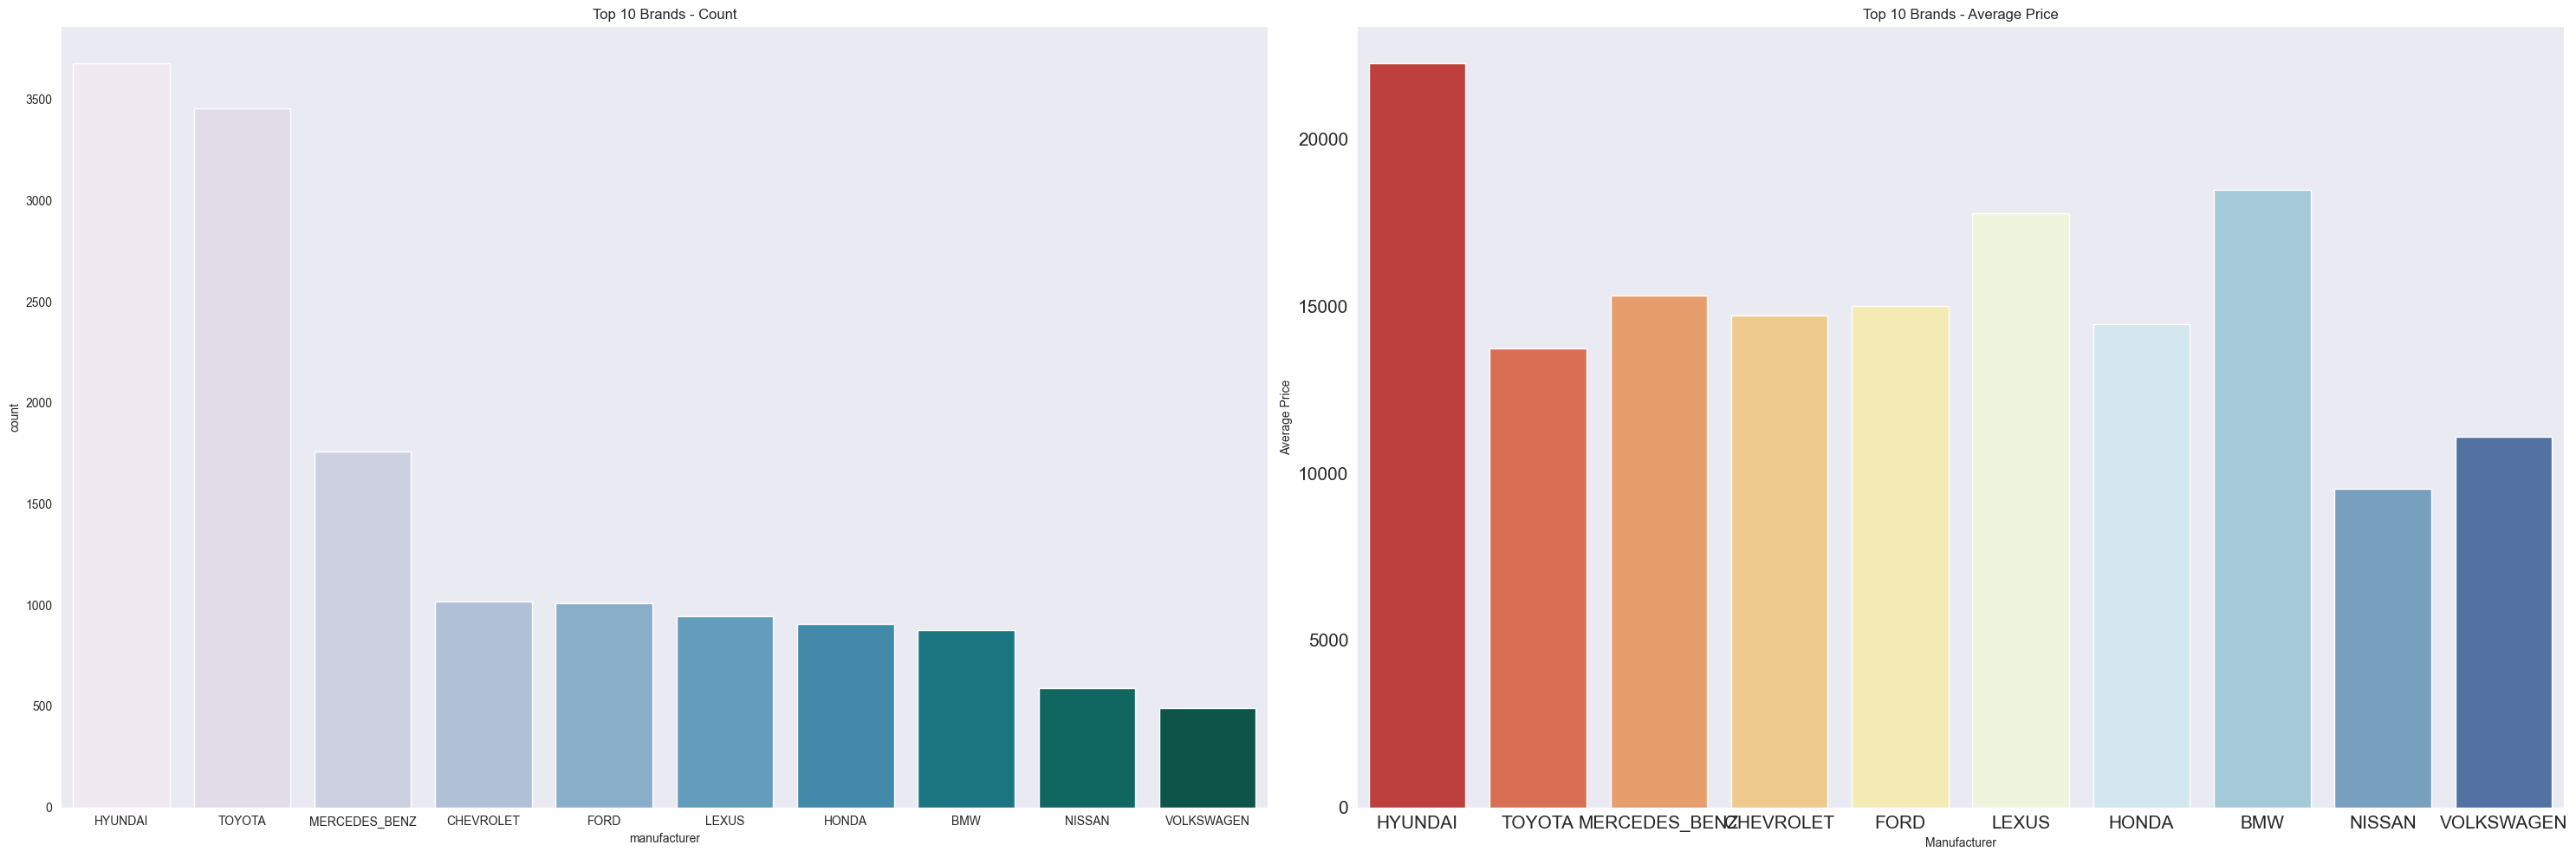

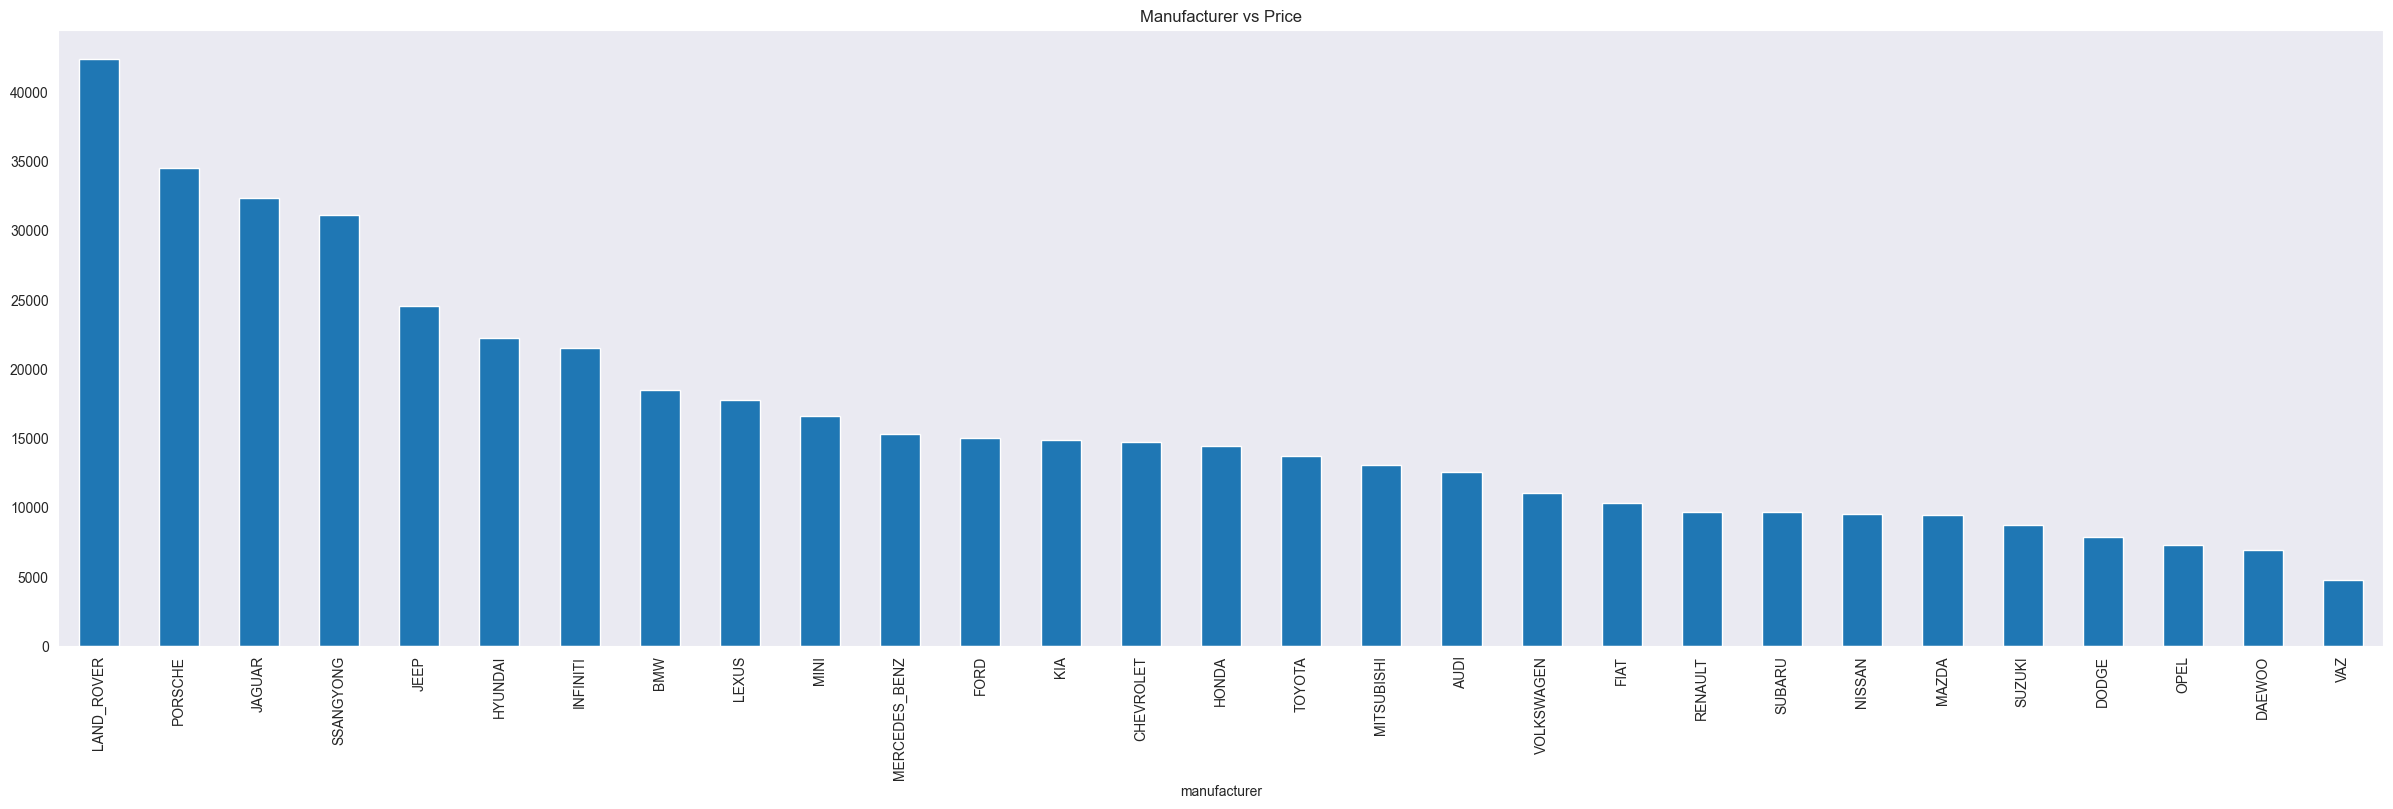

In [48]:
plt.figure(figsize=(30,10))

#Calculate the count and average price of car manufacturers
brand_stats = train.groupby('manufacturer').agg({'manufacturer': 'count', 'price': 'mean'})

#Select the top 10 most frequent brands
top_10_brands = brand_stats.nlargest(10, 'manufacturer')

#Rename the columns
top_10_brands.columns = ['Count', 'Average Price']

#Display the DataFrame with the top 10 brands, count, and average price
top_10_brands

#Subplot of the countplot for brands
plt.subplot(1, 2, 1)
sns.countplot(x='manufacturer', data=train, order=train['manufacturer'].value_counts().index[:10], palette='PuBuGn')
plt.title('Top 10 Brands - Count')

#Subplot of the average price graph for the top 10 brands
plt.subplot(1, 2, 2)
sns.barplot(x='manufacturer', y='Average Price', data=top_10_brands.reset_index(), palette='RdYlBu')
plt.title('Top 10 Brands - Average Price')
plt.xlabel('Manufacturer')
plt.xticks(fontsize=15) # Set the font size of the x-axis labels
plt.ylabel('Average Price')
plt.yticks(fontsize=15) # Set the font size of the y-axis labels

plt.tight_layout()
plt.show()

df = train.groupby("manufacturer")["price"].mean().sort_values(ascending=False)
df.plot.bar(figsize=(30,8))
plt.title('Manufacturer vs Price')
plt.show()

**PROD YEAR**

* 2012: There are 2,155 cars with a production year of 2012 in the dataset. The average price for these cars is $15,293.56. This indicates that cars from the year 2012 are relatively affordable compared to other years in the dataset.

* 2014: With 2,124 cars, the production year 2014 is well represented. The average price for cars from 2014 is $17,813.80, indicating a slightly higher price range than the previous year.

* 2013: The dataset includes 1,963 cars produced in 2013. These cars have an average price of $16,521.79, which is consistent with the pricing trend observed in the previous years.

* 2011: There are 1,612 cars from the year 2011 in the dataset. The average price for these cars is $13,895.95, suggesting that cars from this year are relatively more affordable compared to newer models.

* 2015: With 1,549 cars, the year 2015 is well represented in the dataset. The average price for cars from this year is $20,352.08, indicating a significant increase in price compared to previous years.

* 2010: There are 1,483 cars produced in 2010 in the dataset. The average price for these cars is $14,204.60, similar to the pricing trend observed in the earlier years.

* 2016: With 1,476 cars, the production year 2016 is well represented. The average price for cars from 2016 is $27,334.43, indicating a notable increase in price compared to previous years. This suggests that newer models from 2016 command higher prices.

* 2017: The dataset includes 959 cars produced in 2017. These cars have an average price of $26,548.81, showing a continued upward trend in pricing for newer models.

* 2008: There are 737 cars from the year 2008 in the dataset. The average price for these cars is $11,502.69, indicating that cars from this older production year tend to have lower prices.

* 2009: With 601 cars, the production year 2009 is less represented in the dataset. The average price for cars from 2009 is $13,647.11, suggesting a slight increase in price compared to the previous year.

* Overall, the analysis highlights that newer production years, particularly 2016 and 2017, tend to have higher average prices, while older years such as 2008 and 2009 have relatively lower prices. These insights can be valuable for understanding the pricing trends based on the production year of cars in the dataset.

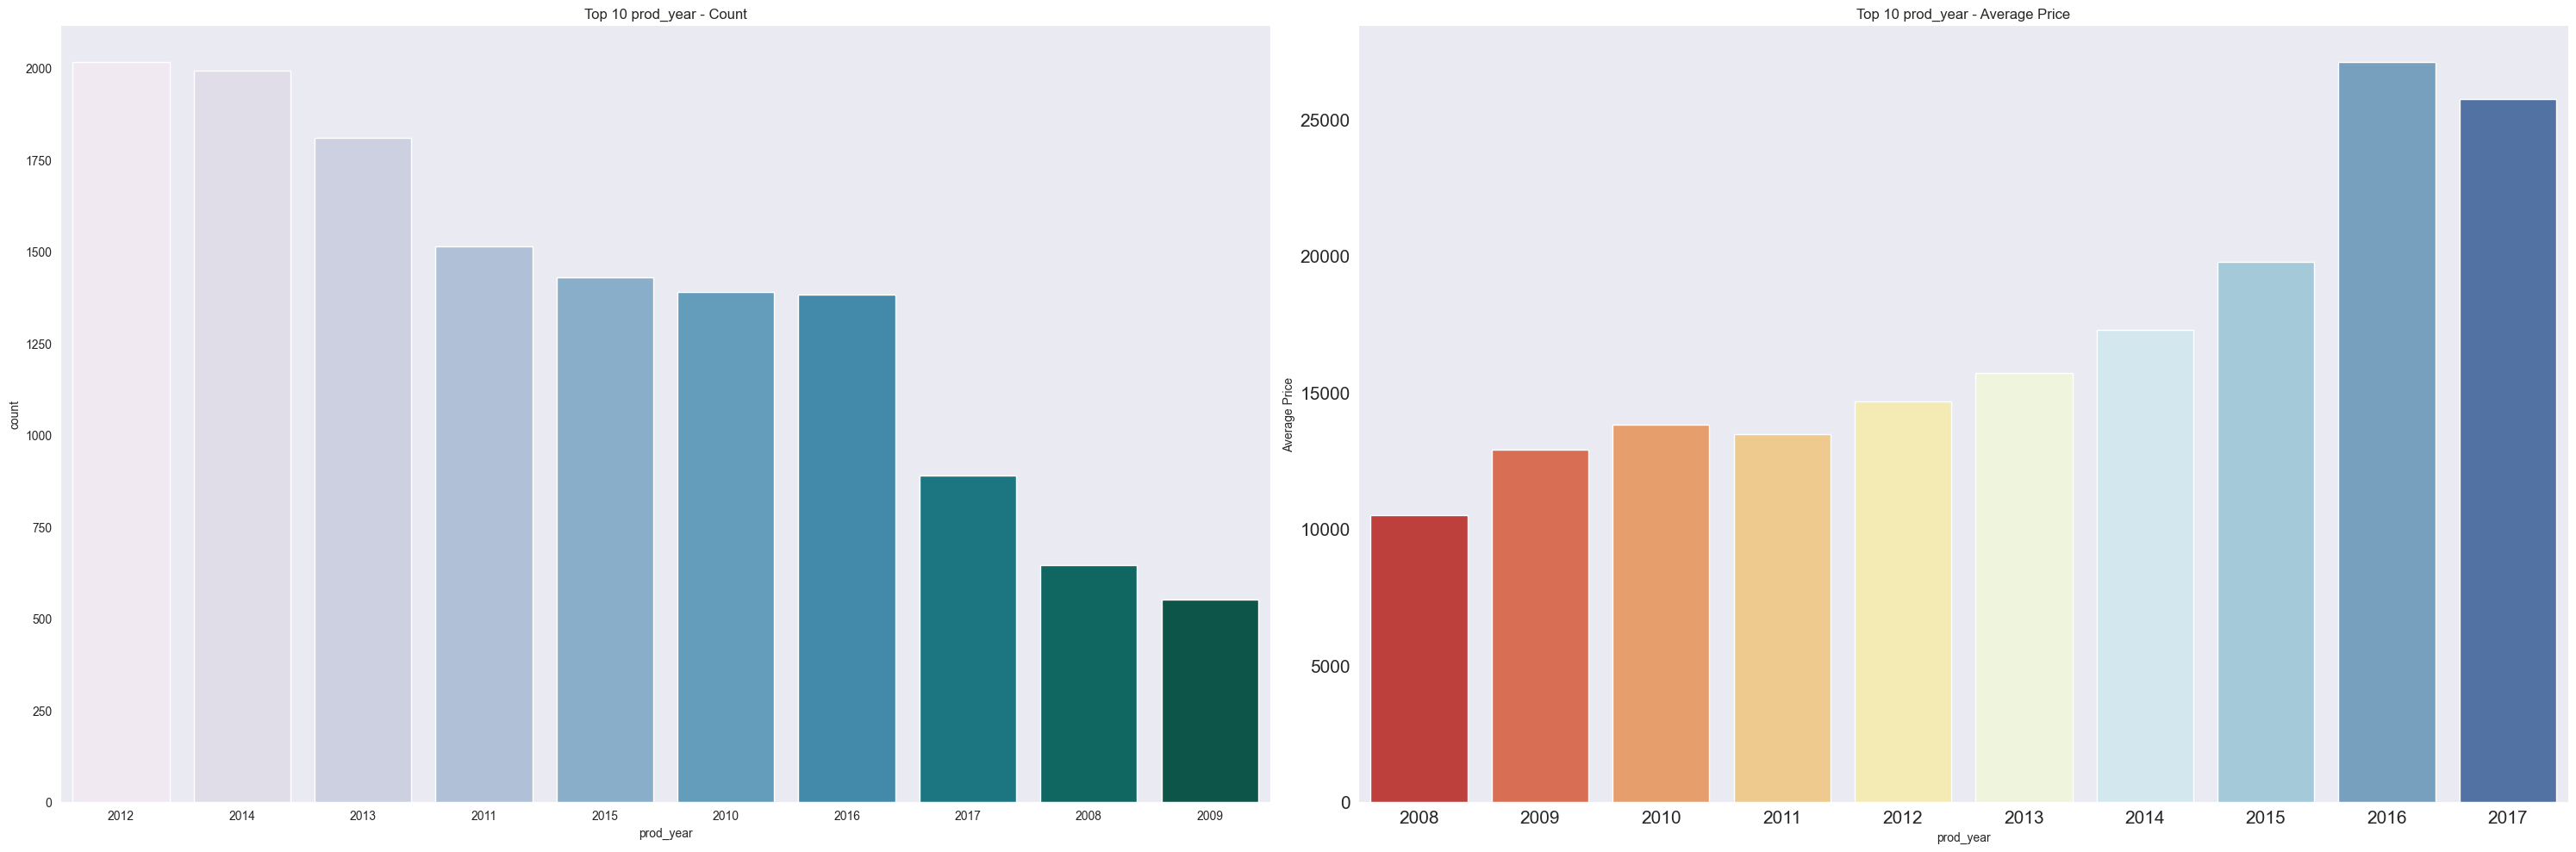

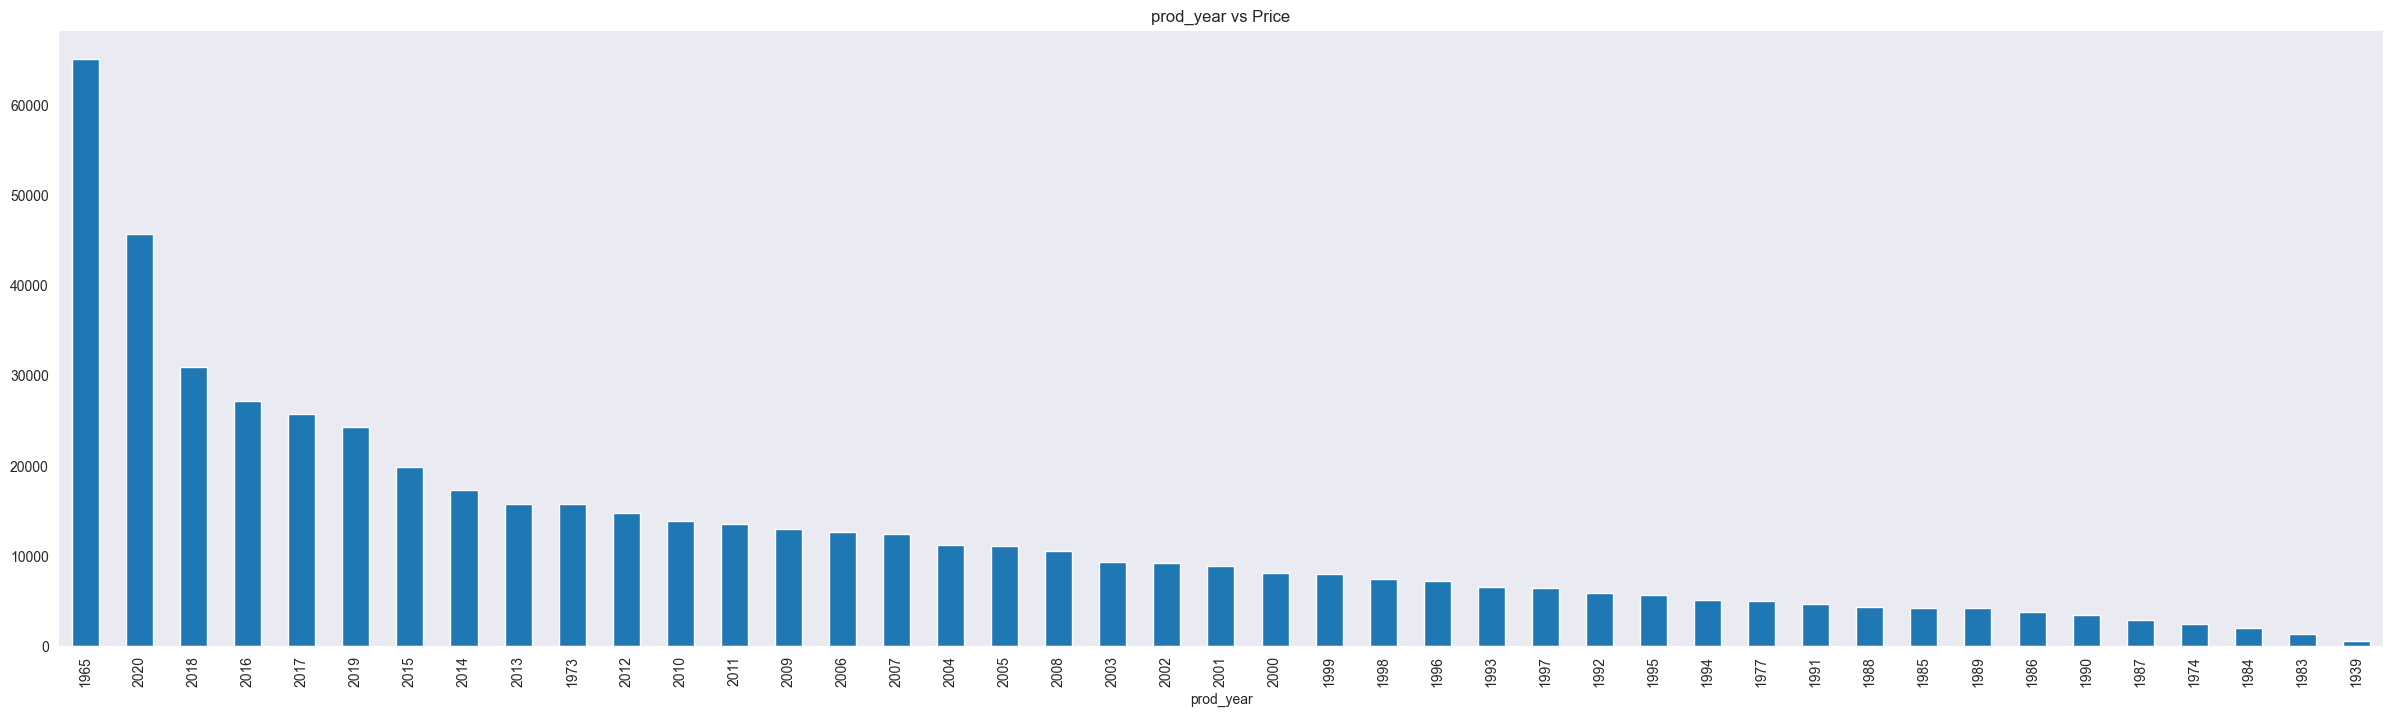

In [49]:

#Calculate count and average price of each prod_year
prod_year_stats = train.groupby('prod_year').agg({'prod_year': 'count', 'price': 'mean'})

#Select the top 10 prod_year
top_10_prod_year = prod_year_stats.nlargest(10, 'prod_year')

#Rename the columns
top_10_prod_year.columns = ['Count', 'Average Price']

#Display the DataFrame with the top 10 prod_year, count, and average price
top_10_prod_year

plt.figure(figsize=(30,10))

#Subplot of the countplot for prod_year
plt.subplot(1, 2, 1)
sns.countplot(x='prod_year', data=train, order=train['prod_year'].value_counts().index[:10], palette='PuBuGn')
plt.title('Top 10 prod_year - Count')

#Subplot of the average price graph for the top 10 prod_year
plt.subplot(1, 2, 2)
sns.barplot(x='prod_year', y='Average Price', data=top_10_prod_year.reset_index(), palette='RdYlBu')
plt.title('Top 10 prod_year - Average Price')
plt.xlabel('prod_year')
plt.xticks(fontsize=15) # Set the font size of the x-axis labels
plt.ylabel('Average Price')
plt.yticks(fontsize=15) # Set the font size of the y-axis labels

plt.tight_layout()
plt.show()

df = train.groupby("prod_year")["price"].mean().sort_values(ascending=False)
df.plot.bar(figsize=(30,8))
plt.title('prod_year vs Price')
plt.show()

**MODEL**

* Prius:

Average Price: $11,485.64
Count: 1,083
The Prius is the most common car model in the dataset, with a count of 1,083. Despite having the lowest average price compared to other models, it's important to note that the popularity of the Prius can be attributed to its reputation for fuel efficiency and overall cost savings.

* Sonata:

Average Price: $14,458.04
Count: 1,079
The Sonata is the second most prevalent car model, with a count of 1,079. With a higher average price than the Prius, the Sonata may attract buyers looking for a mid-size vehicle with additional features and comfort.

* Camry:

Average Price: $12,616.94
Count: 938
The Camry is the third most common car model, with a count of 938. With an intermediate average price, the Camry is known for its reliability and solid performance, which may explain its popularity among buyers.

* Elantra:

Average Price: $16,095.56
Count: 922
The Elantra has a count of 922 units and exhibits the highest average price among all car models. This higher price can be attributed to additional features, advanced technology, and comfort offered by the Elantra.

* E_350:

Average Price: $10,108.59
Count: 542
The E_350 has a count of 542 units. It has the lowest average price among all car models at $10,108.59. The E_350 may attract buyers seeking an affordable and reliable vehicle.

* Santa_FE:

Average Price: $39,200.81
Count: 533
The Santa_FE has a count of 533 units. It exhibits the highest average price among all car models at $39,200.81. This higher price can be justified by the presence of advanced features, ample space, and a high level of comfort offered by the Santa_FE.

* FIT:

Average Price: $11,187.60
Count: 446
The FIT has a count of 446 units and a price average close to that of the Prius. The FIT is known for its versatility, efficient use of space, and agile driving, which may attract buyers looking for a compact and practical car.

* H1:

Average Price: $30,012.54
Count: 437
The H1 has a count of 437 units and exhibits a higher average price. The H1 is a rugged vehicle with off-road capability and generous space, which may justify its higher price.

* Tucson:

Average Price: $30,082.52
Count: 429
The Tucson has a count of 429 units and a price average similar to that of the H1. The Tucson is a compact SUV that offers a combination of space, style, and features, which may attract buyers looking for a versatile daily-use vehicle.

* X5:

Average Price: $17,276.96
Count: 353
The X5 has the lowest count among all car models, with 353 units. Despite the lower presence, the X5 has a relatively higher average price, which can be attributed to its position as a premium SUV with performance and luxury.

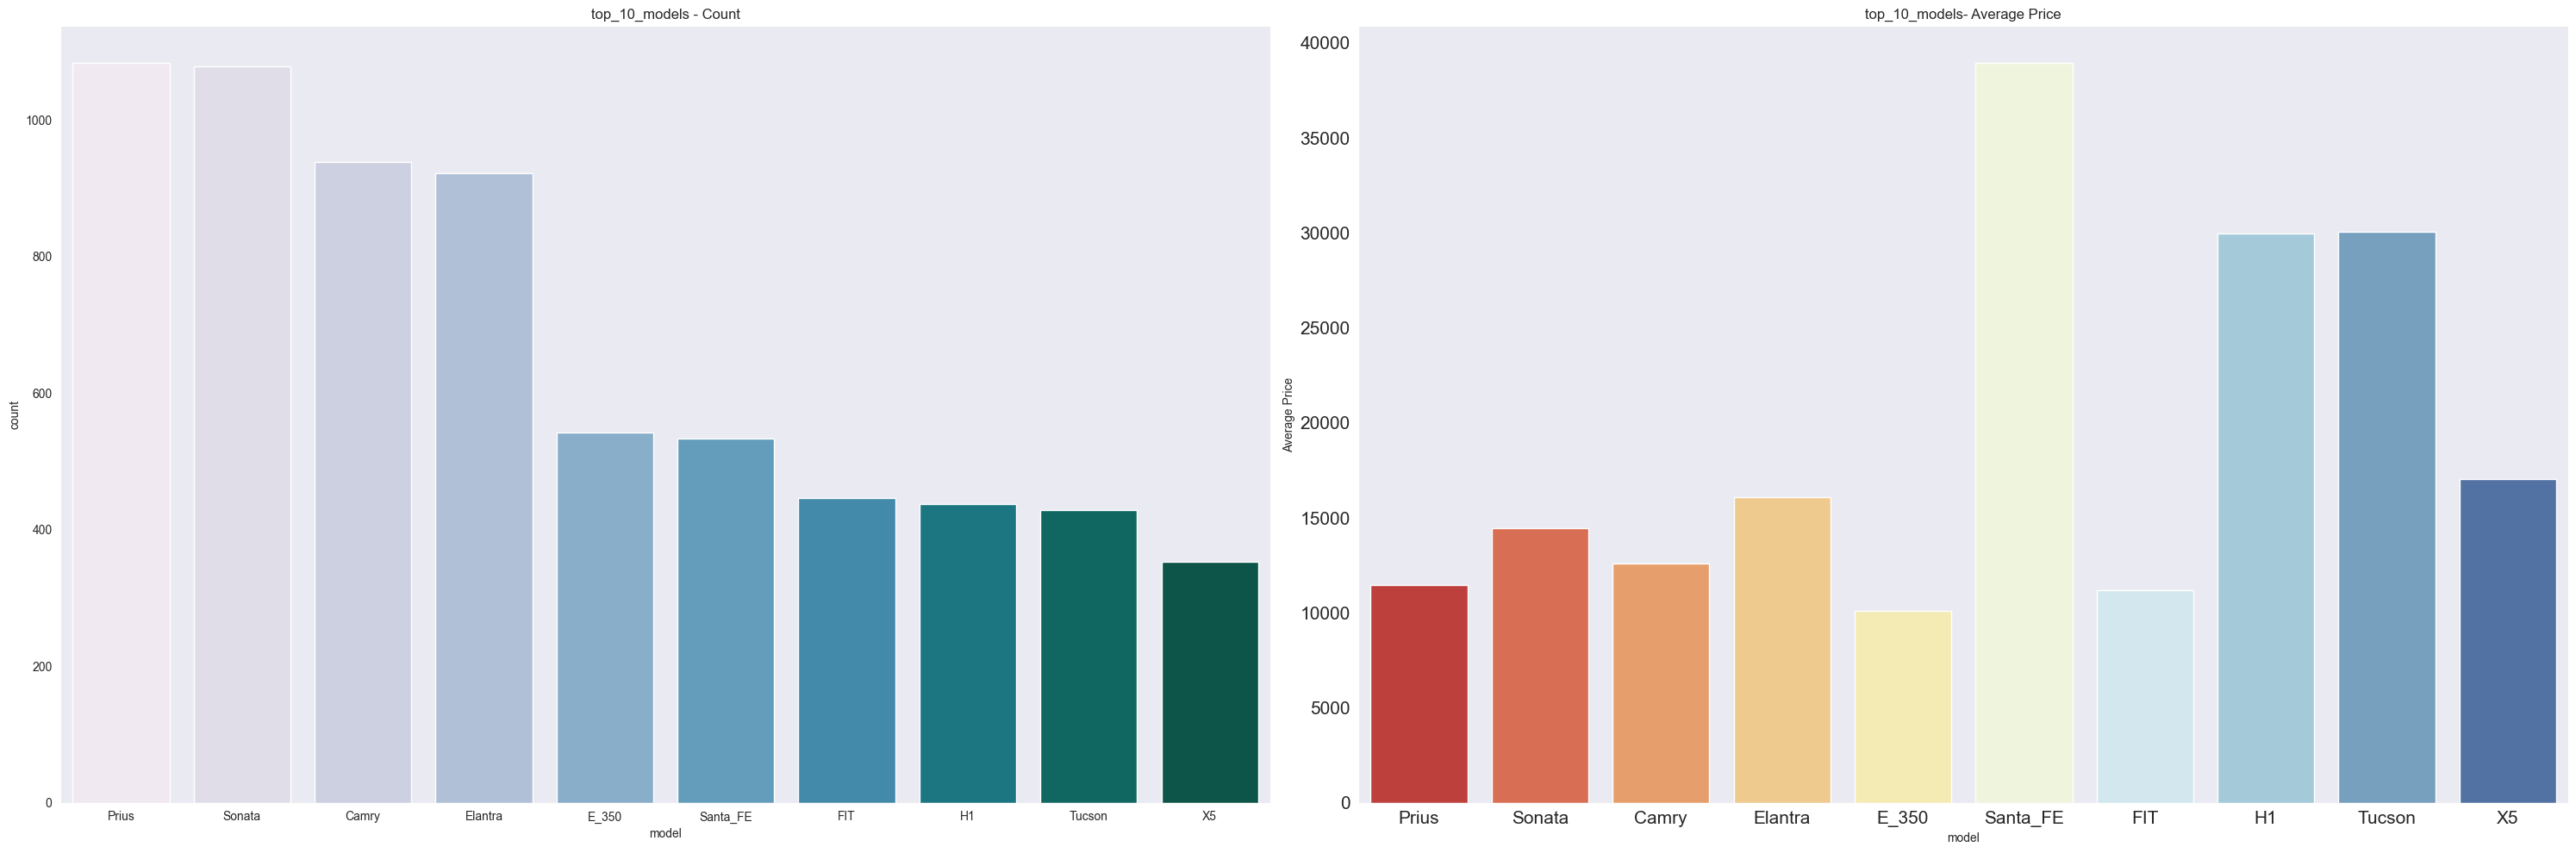

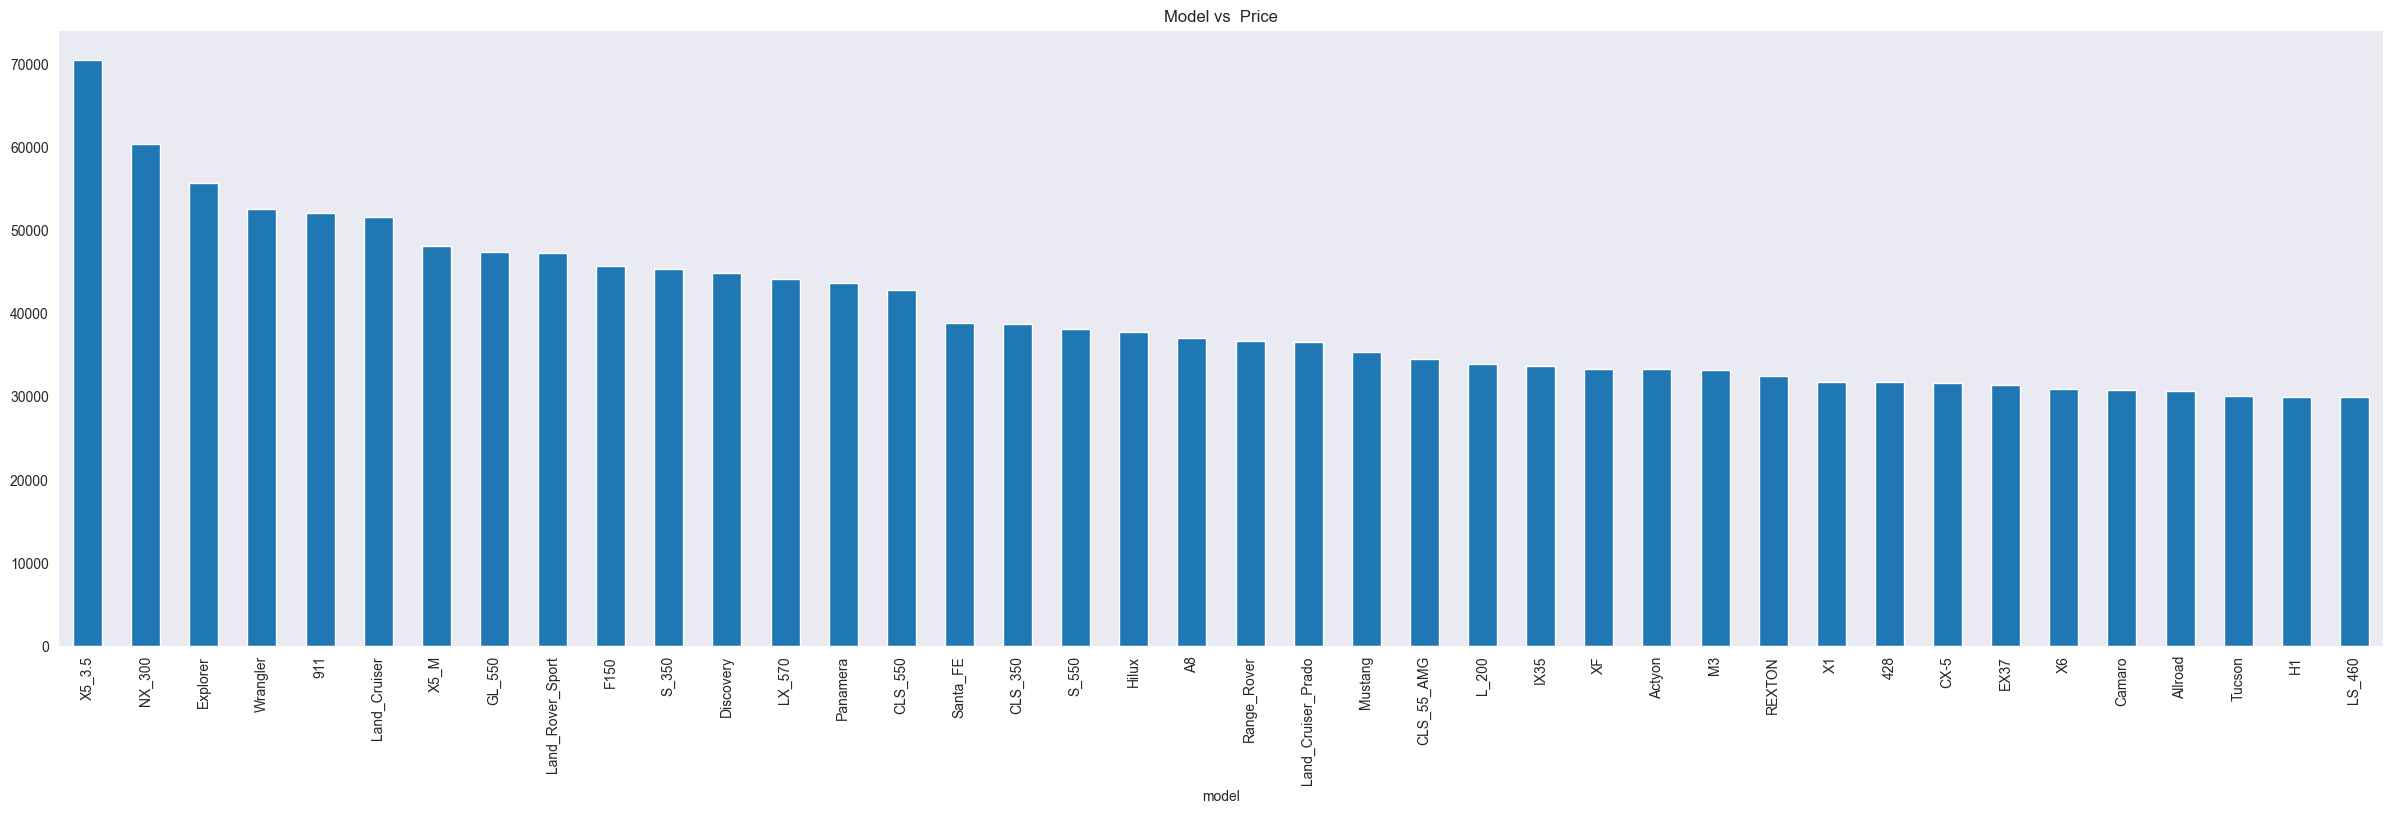

In [50]:
# Calculate count and average price of each car model
model_stats = train.groupby('model').agg({'model': 'count', 'price': 'mean'})

# Select the top 10 car models
top_10_models = model_stats.nlargest(10, 'model')

# Rename the columns
top_10_models.columns = ['Count', 'Average Price']

# Display the DataFrame with the top 10 car models, count, and average price
top_10_models

plt.figure(figsize=(30,10))

# Subplot do countplot das marcas
plt.subplot(1, 2, 1)
sns.countplot(x='model', data=train, order=train['model'].value_counts().index[:10], palette='PuBuGn')
plt.title('top_10_models - Count')

# Subplot do gráfico da média de preço das top 10 marcas
plt.subplot(1, 2, 2)
sns.barplot(x='model', y='Average Price', data=top_10_models.reset_index(), palette='RdYlBu')
plt.title('top_10_models- Average Price')
plt.xlabel('model')
plt.xticks(fontsize=15)  # Define o tamanho da fonte dos rótulos no eixo x
plt.ylabel('Average Price')
plt.yticks(fontsize=15)  # Define o tamanho da fonte dos rótulos no eixo x


plt.tight_layout()
plt.show()

df = train.groupby("model")["price"].mean().sort_values(ascending = False)
df = df.head(40)
df.plot.bar(figsize=(30,8))
plt.title('Model vs  Price')
plt.show()

CATEGORY

* The top category in terms of count is "Sedan" with a count of 8,736. Sedans are the most frequently occurring category among the listed cars in the dataset. However, the average price of sedans is relatively lower compared to other categories, with an average price of $14,105.04.

* The second most frequent category is "Jeep" with a count of 5,473. Jeeps tend to have a higher average price compared to sedans, with an average price of $22,886.56. This indicates that Jeeps are relatively more expensive on average compared to other categories.

* The third most frequent category is "Hatchback" with a count of 2,847. Hatchbacks generally have a lower average price compared to sedans and Jeeps, with an average price of $11,424.53.

* Among the listed categories, the most expensive category is "Pickup" with an average price of $27,452.56. Although pickups have a relatively lower count of 52 in the dataset, they tend to have higher average prices compared to other categories.

* The second most expensive category is "Cabriolet" with an average price of $24,566.31. Cabriolets are luxury convertible cars, and although they have a count of only 36 in the dataset, they command higher prices on average.

* Other categories such as "Universal," "Microbus," and "Minivan" also have relatively higher average prices, indicating that these categories are associated with more expensive cars compared to sedans, hatchbacks, and coupes.



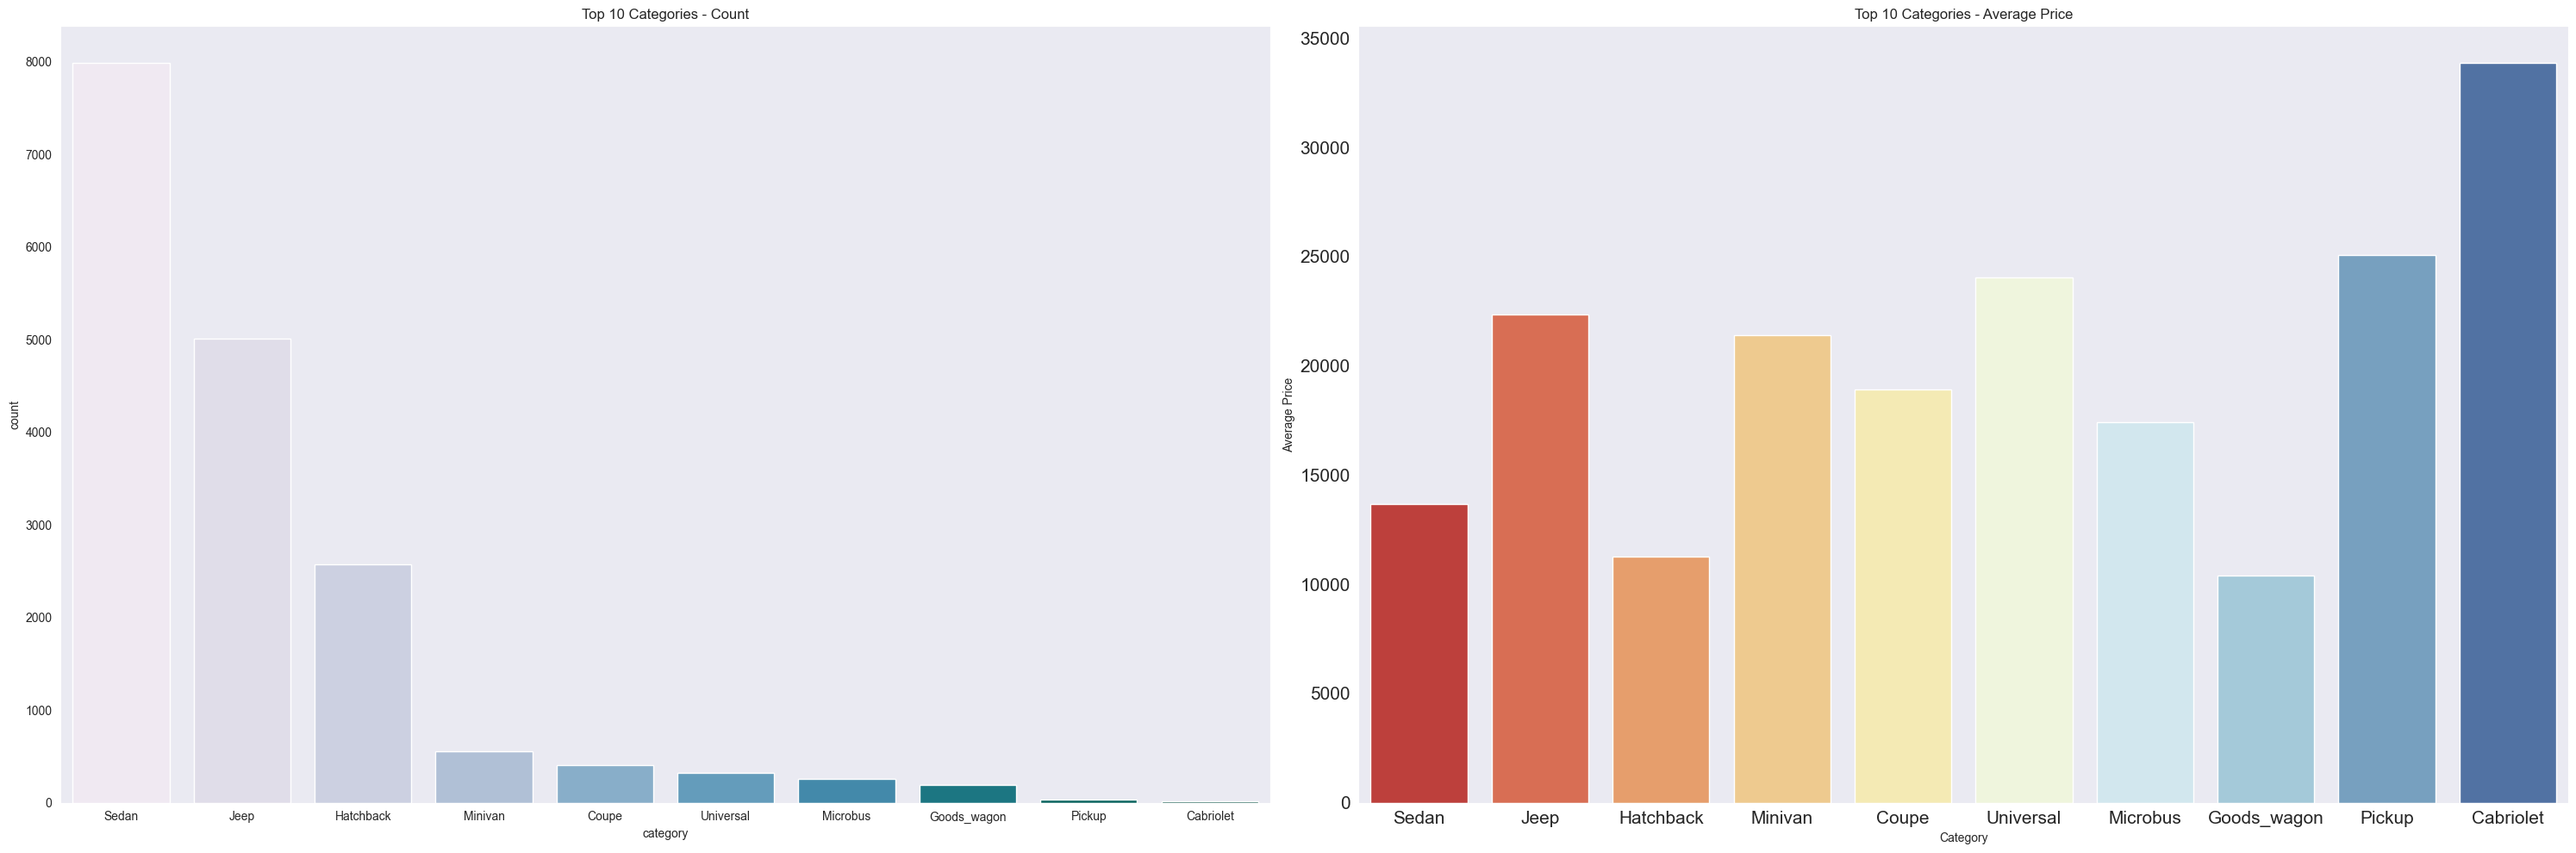

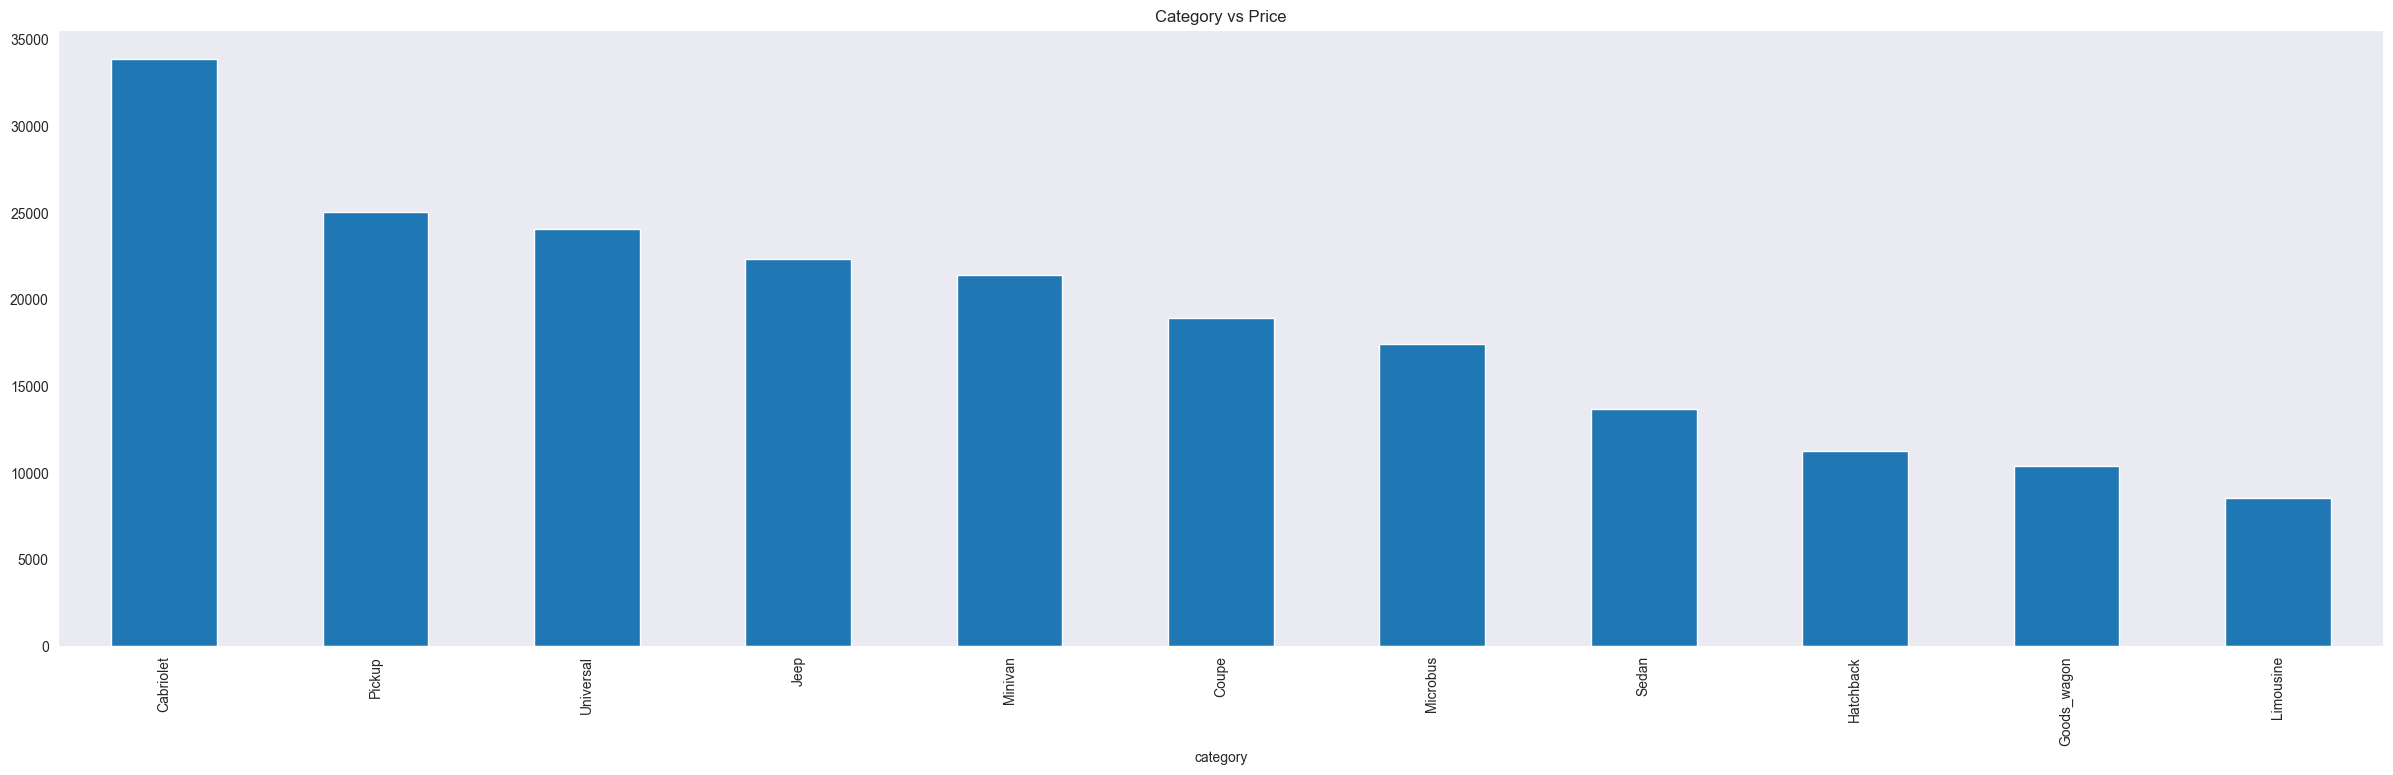

In [51]:
plt.figure(figsize=(30,10))

#Calculate count and average price of each category
category_stats = train.groupby('category').agg({'category': 'count', 'price': 'mean'})

#Select the top 10 categories
top_10_categories = category_stats.nlargest(10, 'category')

#Rename the columns
top_10_categories.columns = ['Count', 'Average Price']

#Display the DataFrame with the top 10 categories, count, and average price
top_10_categories

#Subplot of the countplot for categories
plt.subplot(1, 2, 1)
sns.countplot(x='category', data=train, order=train['category'].value_counts().index[:10], palette='PuBuGn')
plt.title('Top 10 Categories - Count')

#Subplot of the average price graph for the top 10 categories
plt.subplot(1, 2, 2)
sns.barplot(x='category', y='Average Price', data=top_10_categories.reset_index(), palette='RdYlBu')
plt.title('Top 10 Categories - Average Price')
plt.xlabel('Category')
plt.xticks(fontsize=15) # Set the font size of the x-axis labels
plt.ylabel('Average Price')
plt.yticks(fontsize=15) # Set the font size of the y-axis labels

plt.tight_layout()
plt.show()

df = train.groupby("category")["price"].mean().sort_values(ascending = False)
df = df.head(40)
df.plot.bar(figsize=(30,8))
plt.title('Category vs Price')
plt.show()

**ENGINE VOLUME**

* The analysis of the engine_volume data reveals interesting insights:

* Engine Volume 2.0 has the highest count among the listed engine volumes, indicating that it is a popular choice among car models in the dataset. The average price for cars with this engine volume is $18,674.68.

* Engine Volume 2.5 follows closely behind in terms of count, suggesting its widespread usage in cars. The average price for cars with this engine volume is $17,071.16.

* Engine Volume 1.8 has a significant count as well, indicating its popularity in the dataset. However, cars with this engine volume have a lower average price of $11,517.28 compared to the previous two engine volumes.

* Engine Volume 1.6 and 1.5 also have considerable counts, indicating their prevalence among car models. The average prices for cars with these engine volumes are $16,418.15 and $13,929.34, respectively.

* Engine Volume 3.5, 2.4, and 3.0 have lower counts compared to the previous engine volumes but still show a significant presence. The average prices for cars with these engine volumes are $14,861.63, $12,953.63, and $13,182.10, respectively.

* Engine Volume 1.3 has a relatively lower count compared to other engine volumes, indicating its less common usage. Cars with this engine volume have the lowest average price among the listed engine volumes, standing at $7,978.99.

* Finally, Engine Volume 2.0 Turbo has the lowest count among the top 10 engine volumes. However, it stands out with the highest average price of $27,118.76, indicating its association with higher-priced car models.

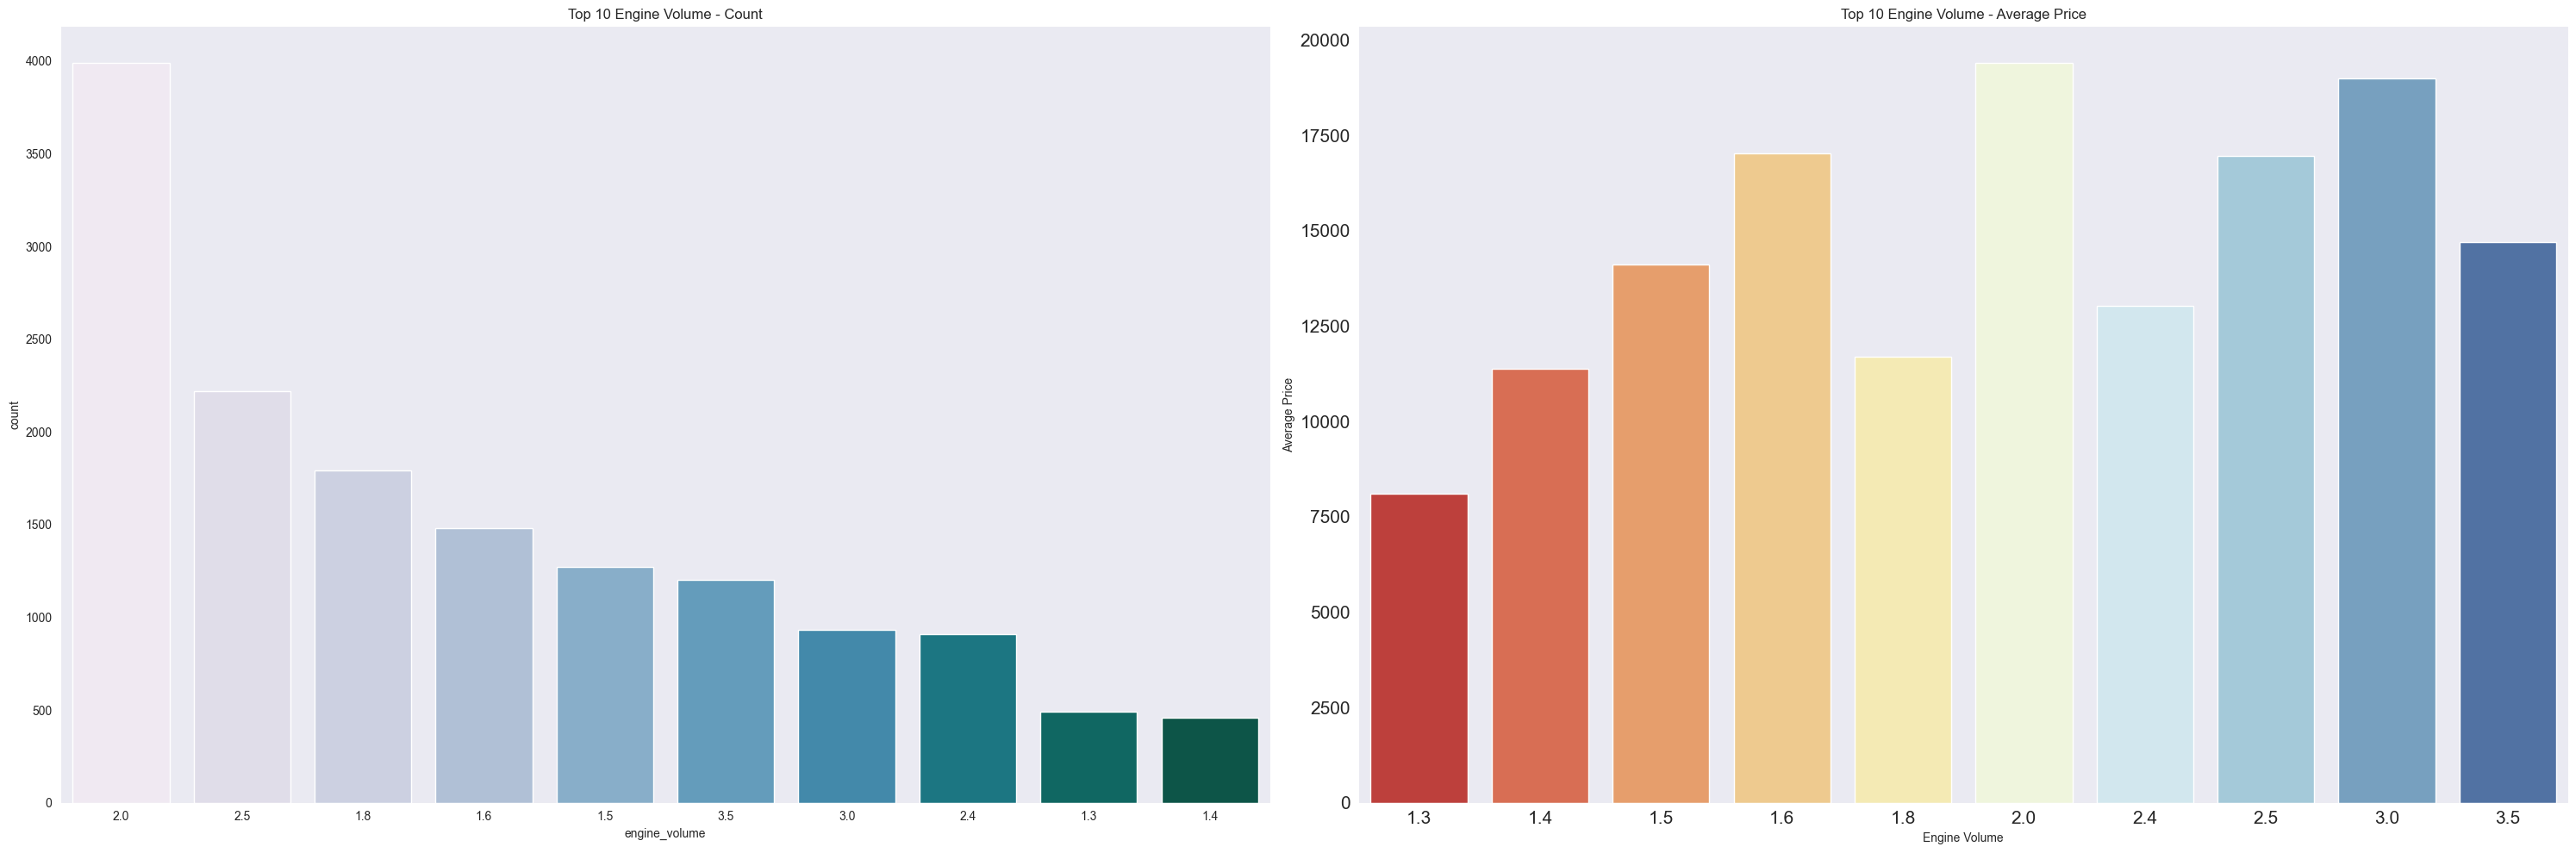

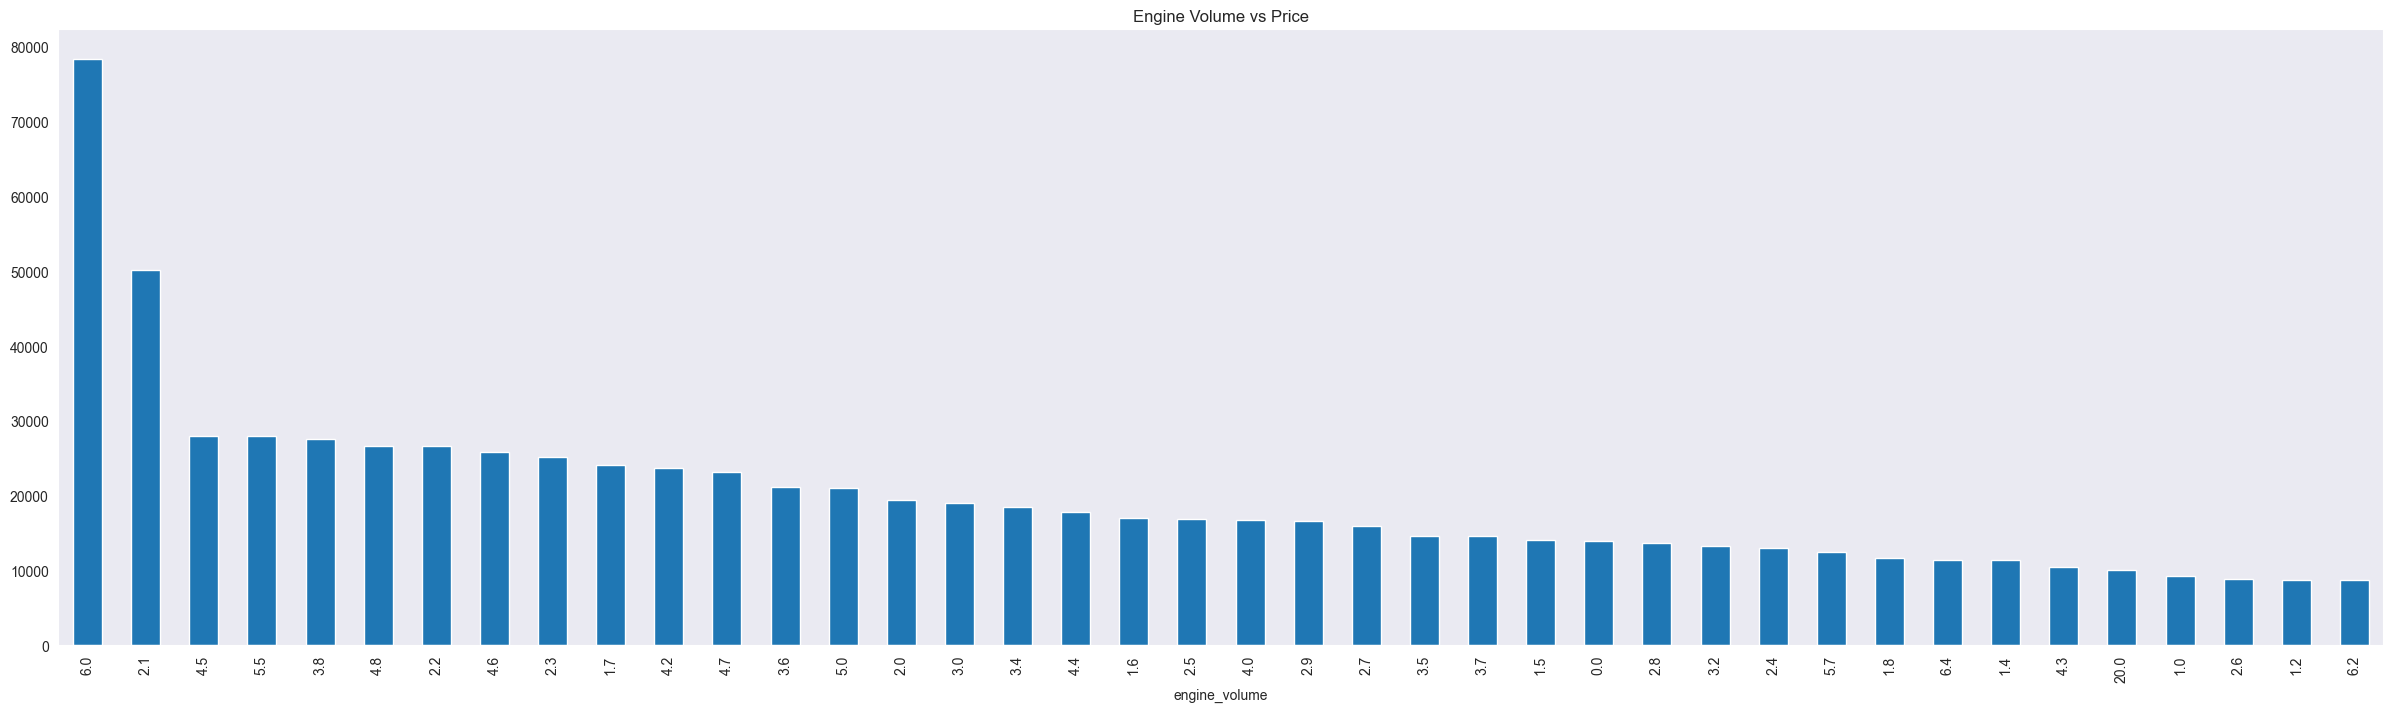

In [52]:

plt.figure(figsize=(30,10))

#Calculate count and average price of each engine_volume
engine_volume_stats = train.groupby('engine_volume').agg({'engine_volume': 'count', 'price': 'mean'})

#Select the top 10 engine_volume values
top_10_engine_volume = engine_volume_stats.nlargest(10, 'engine_volume')

#Rename the columns
top_10_engine_volume.columns = ['Count', 'Average Price']

#Display the DataFrame with the top 10 engine_volume values, count, and average price
top_10_engine_volume

#Subplot of the countplot for engine_volume
plt.subplot(1, 2, 1)
sns.countplot(x='engine_volume', data=train, order=train['engine_volume'].value_counts().index[:10], palette='PuBuGn')
plt.title('Top 10 Engine Volume - Count')

#Subplot of the average price graph for the top 10 engine_volume values
plt.subplot(1, 2, 2)
sns.barplot(x='engine_volume', y='Average Price', data=top_10_engine_volume.reset_index(), palette='RdYlBu')
plt.title('Top 10 Engine Volume - Average Price')
plt.xlabel('Engine Volume')
plt.xticks(fontsize=15) # Set the font size of the x-axis labels
plt.ylabel('Average Price')
plt.yticks(fontsize=15) # Set the font size of the y-axis labels

plt.tight_layout()
plt.show()

df = train.groupby("engine_volume")["price"].mean().sort_values(ascending = False)
df = df.head(40)
df.plot.bar(figsize=(30,8))

plt.title('Engine Volume vs Price')
plt.show()

**Turbo**

The "com_turbo" category has a total of 1461 observations and an average price of R$ 24,713.83. This means that, on average, turbocharged vehicles are priced higher.

On the other hand, the category "without_turbo" has a total of 15,900 observations and an average price of R$ 15,680.47. In this case, vehicles without a turbo have, on average, a lower price compared to vehicles with a turbo.

This information indicates a significant difference in average prices between vehicles with and without turbo. It is important to point out that the presence of a turbo in a vehicle is generally associated with an increase in engine performance and power, which may explain the observed price difference.

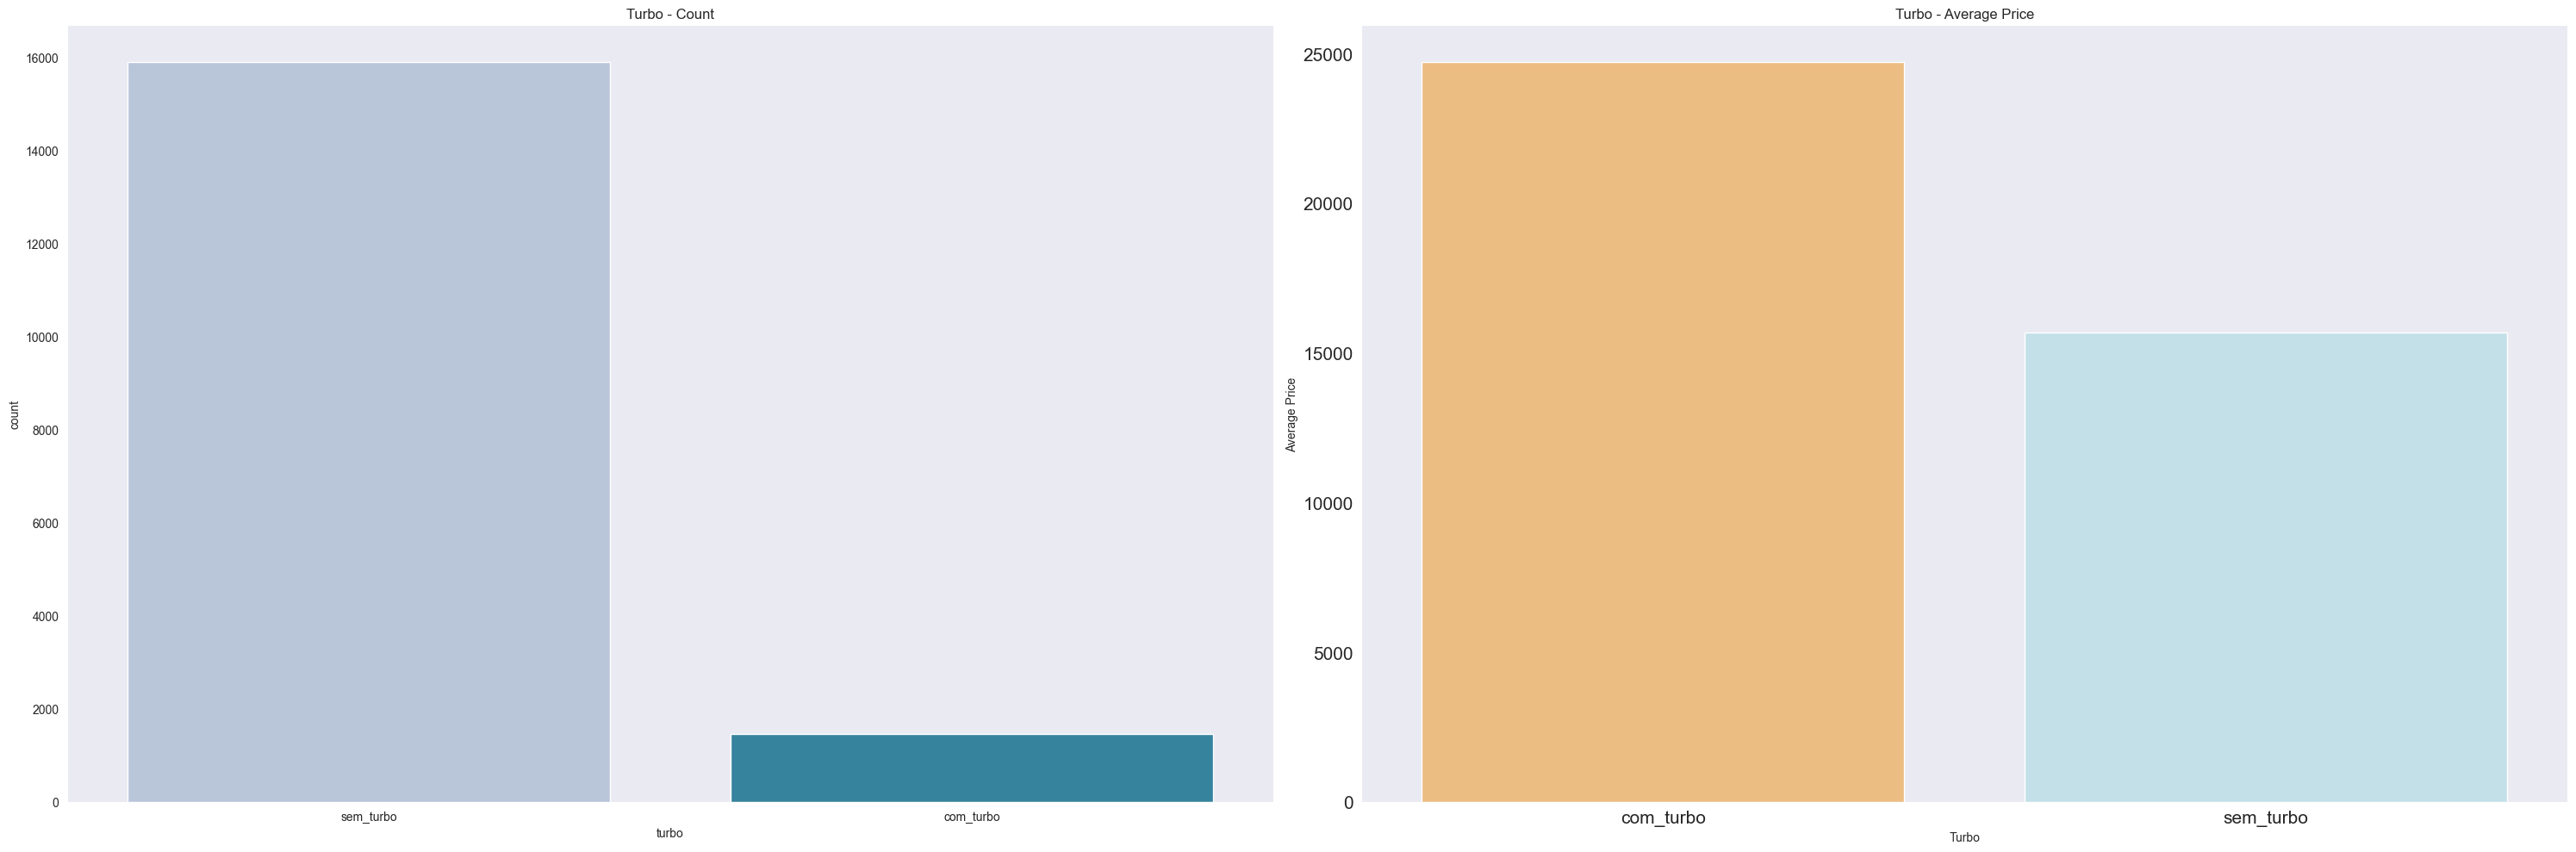

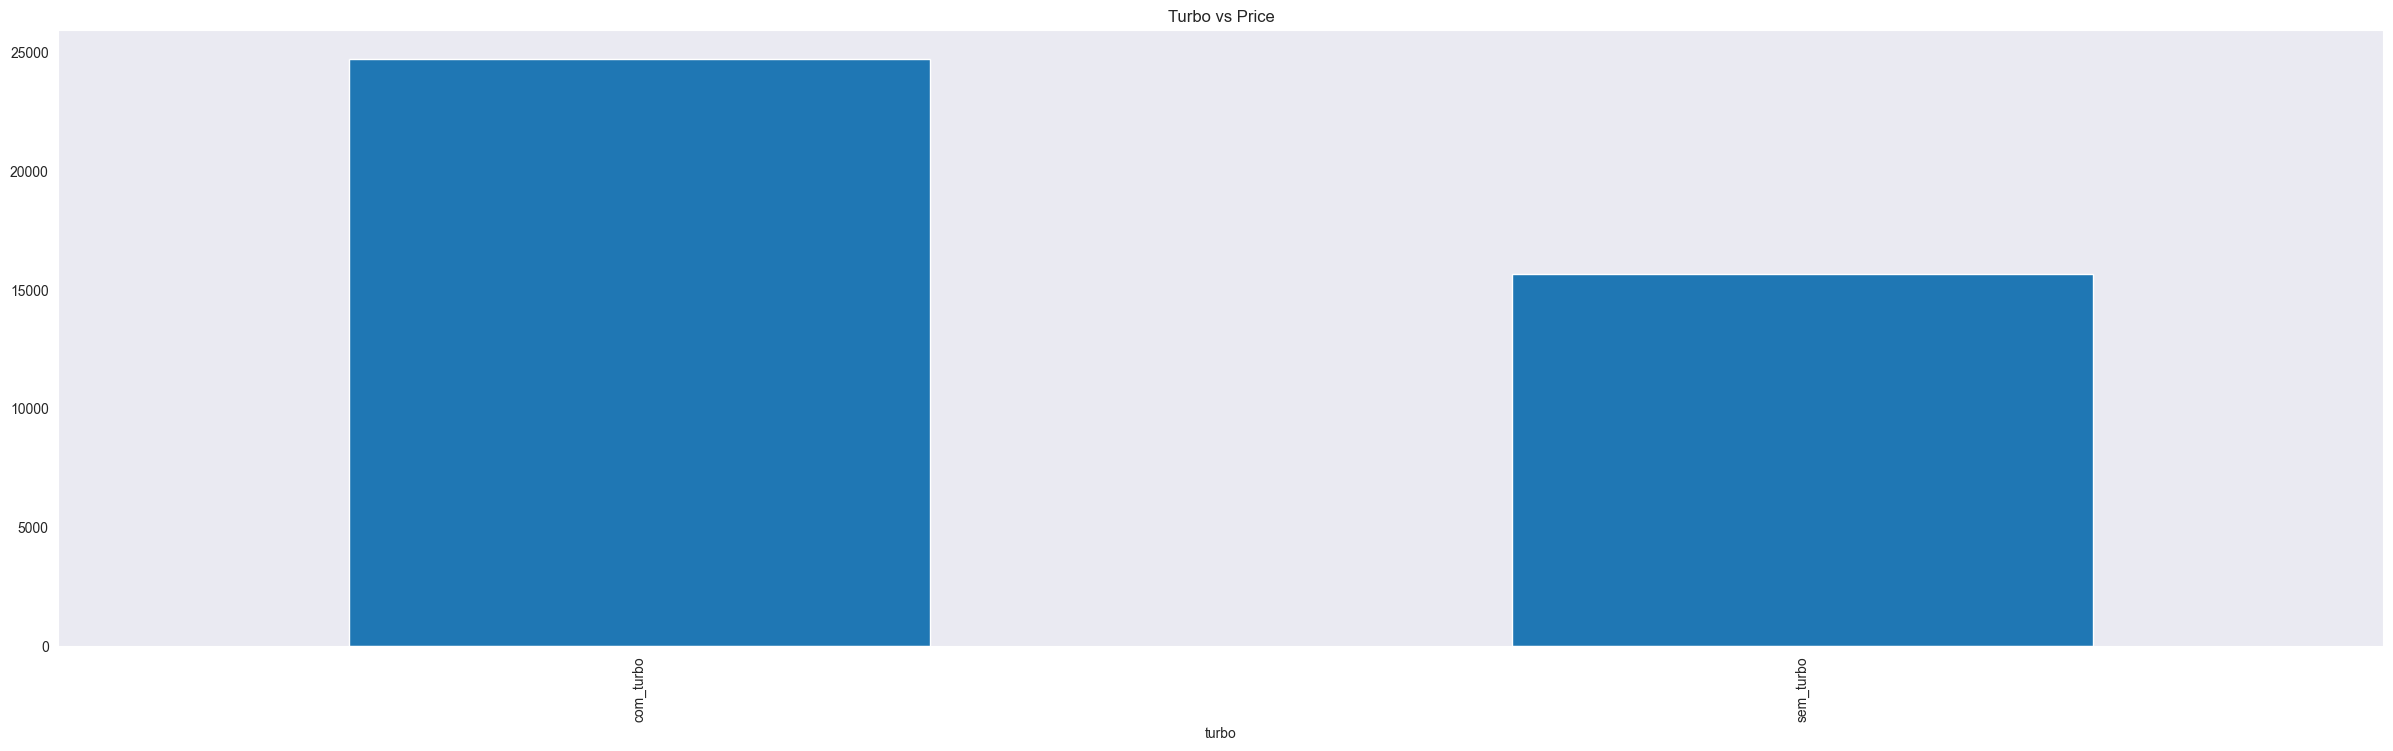

In [53]:
plt.figure(figsize=(30, 10))

# Calculate count and average price of each turbo
turbo_stats = train.groupby('turbo').agg({'turbo': 'count', 'price': 'mean'})

# Rename the columns
turbo_stats.columns = ['Count', 'Average Price']

# Display the DataFrame with the turbo values, count, and average price
turbo_stats

# Subplot of countplot for the turbo values
plt.subplot(1, 2, 1)
sns.countplot(x='turbo', data=train, palette='PuBuGn')
plt.title('Turbo - Count')

# Subplot of the average price for the turbo values
plt.subplot(1, 2, 2)
sns.barplot(x='turbo', y='Average Price', data=turbo_stats.reset_index(), palette='RdYlBu')
plt.title('Turbo - Average Price')
plt.xlabel('Turbo')
plt.xticks(fontsize=15)
plt.ylabel('Average Price')
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

df = train.groupby("turbo")["price"].mean().sort_values(ascending=False)
df = df.head(40)
df.plot.bar(figsize=(30, 8))

plt.title('Turbo vs Price')
plt.show()

**MANUFACTURER & CATEGORY VS PRICE**

Coupe:
BMW Coupe: The average price for BMW Coupes is approximately $14,597.26.
HYUNDAI Coupe: The average price for HYUNDAI Coupes is approximately $18,883.63.
The average price for HYUNDAI Coupes is higher compared to BMW Coupes, indicating that HYUNDAI Coupes tend to have a higher price range in this analysis.

Hatchback:
BMW Hatchback: The average price for BMW Hatchbacks is approximately $7,549.27.
HYUNDAI Hatchback: The average price for HYUNDAI Hatchbacks is approximately $13,316.24.
The average price for HYUNDAI Hatchbacks is significantly higher compared to BMW Hatchbacks, suggesting that HYUNDAI Hatchbacks generally have a higher price range in this analysis.

Jeep:
BMW Jeep: The average price for BMW Jeeps is approximately $20,772.67.
HYUNDAI Jeep: The average price for HYUNDAI Jeeps is approximately $34,163.71.
The average price for HYUNDAI Jeeps is notably higher compared to BMW Jeeps, indicating that HYUNDAI Jeeps tend to have a higher price range in this analysis.

Sedan:
BMW Sedan: The average price for BMW Sedans is approximately $16,922.49.
HYUNDAI Sedan: The average price for HYUNDAI Sedans is approximately $15,420.17.
The average price for BMW Sedans is slightly higher compared to HYUNDAI Sedans, suggesting that BMW Sedans tend to have a slightly higher price range in this analysis.

In general, the comparison reveals that HYUNDAI tends to have higher average prices in the categories of Coupe, Hatchback, and Jeep, while BMW has a slightly higher average price in the Sedan category. These differences in average prices between the two manufacturers in specific car categories may be influenced by factors such as brand reputation, features, performance, and market demand.

In [54]:
# Filter the data for Hyundai and BMW manufacturers
MANUFACTURER_and_CATEGORY = train[(train['manufacturer'] == 'HYUNDAI') | (train['manufacturer'] == 'BMW')]

# Select the desired columns
MANUFACTURER_and_CATEGORY_columns = ['manufacturer', 'price', 'category']
MANUFACTURER_and_CATEGORY = MANUFACTURER_and_CATEGORY[MANUFACTURER_and_CATEGORY_columns]

# Group the data by manufacturer and category
MANUFACTURER_and_CATEGORY_grouped_data = MANUFACTURER_and_CATEGORY.groupby(['manufacturer', 'category'])

# Calculate the mean price for each group
MANUFACTURER_and_CATEGORY_mean_by_group = MANUFACTURER_and_CATEGORY_grouped_data['price'].mean()

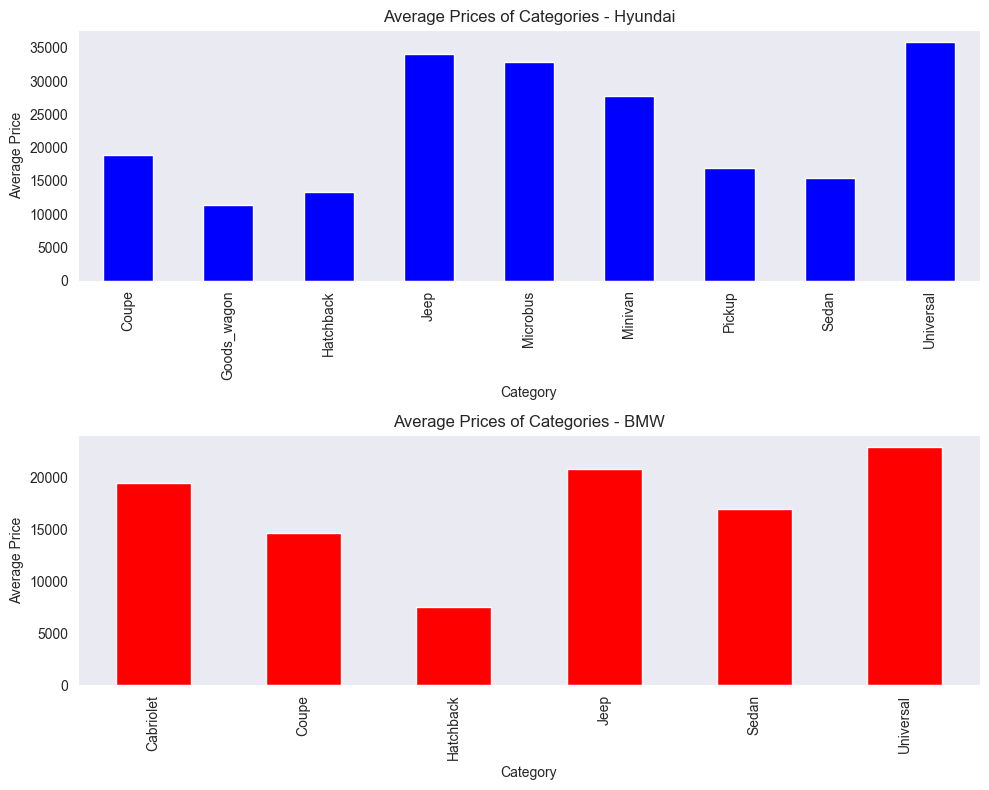

In [55]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot for Hyundai
hyundai_data = MANUFACTURER_and_CATEGORY_mean_by_group.loc['HYUNDAI']
hyundai_data.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Average Prices of Categories - Hyundai')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Average Price')

# Plot for BMW
bmw_data = MANUFACTURER_and_CATEGORY_mean_by_group.loc['BMW']
bmw_data.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Average Prices of Categories - BMW')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Average Price')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

# Machine learning

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import make_scorer, mean_squared_log_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


## Based on our analysis, I will exclude some variables.

In [57]:
selected_features=['manufacturer','model','prod_year','category','mileage','turbo']

In [58]:
# Separate the training data into features (X_train) and target (y_train)
X_train = train[selected_features]
y_train = train["price"]

In [59]:
# Separate the test data into features (X_test) and target (y_test)
X_test = test[selected_features]
y_test = test["price"]

In [60]:
y_train.to_csv('y_train.csv', index=False)

In [61]:
y_train = pd.read_csv('D:/tudo/regressão\predição_preço_carro\y_train.csv')

In [62]:
# Convert the resulting array into a one-dimensional series
y_train = pd.Series(y_train.squeeze())

In [63]:
# Pré-processamento dos dados
numeric_features_train = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features_train = X_train.select_dtypes(include=['object']).columns

In [64]:
# Pré-processamento dos dados
numeric_features_test = X_test.select_dtypes(include=['float64', 'int64']).columns
categorical_features_test = X_test.select_dtypes(include=['object']).columns

In [65]:
print(categorical_features_train)
print(numeric_features_train)

Index(['manufacturer', 'model', 'category', 'turbo'], dtype='object')
Index(['prod_year', 'mileage'], dtype='object')


In [66]:
print(categorical_features_test)
print(numeric_features_test)

Index(['manufacturer', 'model', 'category', 'turbo'], dtype='object')
Index(['prod_year', 'mileage'], dtype='object')


In [67]:
categorical_features=['manufacturer','model','category','turbo']


In [68]:
numerical_features_standardization=['prod_year', 'mileage']

In [69]:
#Normalize the numerical variables in the training and test sets
scaler = StandardScaler()
X_train_numeric_normalized = pd.DataFrame(scaler.fit_transform(X_train[numerical_features_standardization]), columns=numerical_features_standardization)
X_test_numeric_normalized = pd.DataFrame(scaler.transform(X_test[numerical_features_standardization]), columns=numerical_features_standardization)

In [70]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Function to calculate RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Transform y_train using logarithmic transformation
y_train_log = np.log1p(y_train)

### Using onehotencoder


In [245]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the encoder to the unique values of the categorical columns in the training set
one_hot_encoder.fit(X_train[categorical_features])

# Apply the encoder to both the training set and the test set
encoder_train_one_hot_encoder = pd.DataFrame(one_hot_encoder.transform(X_train[categorical_features]))
encoder_test_one_hot_encoder = pd.DataFrame(one_hot_encoder.transform(X_test[categorical_features]))

In [75]:
# Get the names of the new columns after encoding
encoded_feature_names_one_hot_encoder = one_hot_encoder.get_feature_names_out(categorical_features)

# Assign the encoded column names to the training set DataFrame
encoder_train_one_hot_encoder.set_axis(encoded_feature_names_one_hot_encoder, axis=1, inplace=True)

# Assign the encoded column names to the test set DataFrame
encoder_test_one_hot_encoder.set_axis(encoded_feature_names_one_hot_encoder, axis=1, inplace=True)

In [76]:
#Concatenate two dataframes side by side
X_train_concatened_one_hot_encoder = pd.concat([X_train_numeric_normalized, encoder_train_one_hot_encoder], axis=1)
X_test_concatened_one_hot_encoder = pd.concat([X_test_numeric_normalized, encoder_test_one_hot_encoder], axis=1)

In [77]:
X_train_concatened_one_hot_encoder.to_csv('X_train_concatened_one_hot_encoder.csv', index=False)
X_test_concatened_one_hot_encoder.to_csv('X_test_concatened_one_hot_encoder.csv', index=False)


In [85]:
X_train_concatened_one_hot_encoder=pd.read_csv('D:/tudo/regressão\predição_preço_carro\X_train_concatened_one_hot_encoder.csv')
X_test_concatened_one_hot_encoder=pd.read_csv('D:/tudo/regressão\predição_preço_carro\X_test_concatened_one_hot_encoder.csv')

LinearRegression

In [82]:
from sklearn.linear_model import LinearRegression

# Instantiate the linear regression model
regression_model = LinearRegression()

# Define the RMSLE metric as the scoring function
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate the RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_one_hot_encoder, y_train_log, cv=10, scoring=scoring)

# Calculate the mean RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Model Performance (Cross-validated RMSLE): 0.13271736728878925


RandomForestRegressor

In [109]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest regression model
regression_model = RandomForestRegressor()

# Define the RMSLE metric as the scoring function
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate the RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_one_hot_encoder, y_train_log, cv=10, scoring=scoring)

# Calculate the mean RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Desempenho do modelo (validação cruzada - RMSLE): 0.10039531990726455


xgboost

In [142]:
from xgboost import XGBRegressor

# Instantiate the XGBoost regression model
regression_model = XGBRegressor()

# Calculate RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_one_hot_encoder, y_train_log, cv=10, scoring=scoring)

# Calculate the mean of RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance (cross-validation - RMSLE)
print("Model performance (cross-validation - RMSLE):", mean_rmsle)


Model performance (cross-validation - RMSLE): 0.11176532368266696


In [ ]:
# Instantiate the XGBoost regression model
regression_model = XGBRegressor()

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(regression_model, param_grid, cv=10, scoring=scoring)

# Fit the grid search to the data
grid_search.fit(X_train_concatened_one_hot_encoder, y_train_log)

# Get the best model and its performance score
best_model = grid_search.best_estimator_
best_score = -grid_search.best_score_

# Print the best parameters and model performance
print("Best Parameters:", grid_search.best_params_)
print("Model Performance (Cross-validated RMSLE):", best_score)

neural_network

In [116]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create the neural network model
def create_model():
    model = keras.models.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train_concatened_one_hot_encoder.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the pipeline with the neural network
pipeline = Pipeline([
    ('neural_network', keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0))
])

# Define the RMSLE metric as the scoring function
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate RMSLE using cross-validation
scores = -cross_val_score(pipeline, X_train_concatened_one_hot_encoder, y_train_log, cv=10, scoring=scoring)

# Calculate the mean of RMSLE scores
mean_rmsle = scores.mean()

# Print the model performance
print("Model performance (cross-validation - RMSLE):", mean_rmsle)

Desempenho do modelo (validação cruzada - RMSLE): 0.11381147313940723


lightgbm

In [124]:
import lightgbm as lgb

# Instantiate the LightGBM regression model
regression_model = lgb.LGBMRegressor()

# Define RMSLE as the scoring metric
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_one_hot_encoder, y_train_log, cv=10, scoring=scoring)

# Calculate the mean of the RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance (cross-validated RMSLE)
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Model Performance (Cross-validated RMSLE): 0.11526167732259571


### Using ordinalenocder


In [71]:
from sklearn.preprocessing import OrdinalEncoder

In [72]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit the encoder to the unique values of the categorical columns in the training set
ordinal_encoder.fit(X_train[categorical_features])

# Apply the encoder to both the training set and the test set
encoder_train_ordinal_encoder = pd.DataFrame(ordinal_encoder.transform(X_train[categorical_features]))
encoder_test_ordinal_encoder = pd.DataFrame(ordinal_encoder.transform(X_test[categorical_features]))

In [73]:
# Get the names of the new columns after encoding
encoded_feature_names_ordinal_encoder = ordinal_encoder.get_feature_names_out(categorical_features)

# Assign the encoded column names to the training set DataFrame
encoder_train_ordinal_encoder.set_axis(encoded_feature_names_ordinal_encoder, axis=1, inplace=True)

# Assign the encoded column names to the test set DataFrame
encoder_test_ordinal_encoder.set_axis(encoded_feature_names_ordinal_encoder, axis=1, inplace=True)

In [90]:
#Concatenate two dataframes side by side
X_train_concatened_ordinal_encoder= pd.concat([X_train_numeric_normalized, encoder_train_ordinal_encoder], axis=1)
X_test_concatened_ordinal_encoder = pd.concat([X_test_numeric_normalized, encoder_test_ordinal_encoder], axis=1)

In [91]:
X_train_concatened_ordinal_encoder.to_csv('X_train_concatened_ordinal_encoder',index=False)
X_test_concatened_ordinal_encoder.to_csv('X_test_concatened_ordinal_encoder',index=False)

In [96]:
X_train_concatened_one_hot_encoder=pd.read_csv('D:/tudo/regressão\predição_preço_carro\X_train_concatened_ordinal_encoder.csv')
X_test_concatened_one_hot_encoder=pd.read_csv('D:/tudo/regressão\predição_preço_carro\X_test_concatened_ordinal_encoder.csv')

LinearRegression

In [164]:
# Instantiate the linear regression model
regression_model = LinearRegression()

# Define the RMSLE metric as the scoring function
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate the RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_ordinal_encoder, y_train_log, cv=10, scoring=scoring)

# Calculate the mean RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Model Performance (Cross-validated RMSLE): 0.1456492696879377


RandomForestRegressor

In [166]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest regression model
regression_model = RandomForestRegressor()

# Define the RMSLE metric as the scoring function
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate the RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_ordinal_encoder, y_train_log, cv=10, scoring=scoring)

# Calculate the mean RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Model Performance (Cross-validated RMSLE): 0.10029597077838352


XGBRegressor

In [167]:
# Instantiate the XGBoost regression model
regression_model = XGBRegressor()

# Calculate RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_ordinal_encoder, y_train_log, cv=10, scoring=scoring)

# Calculate the mean of RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance (cross-validation - RMSLE)
print("Model performance (cross-validation - RMSLE):", mean_rmsle)


Model performance (cross-validation - RMSLE): 0.10598895598191245


neural_network

In [169]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create the neural network model
def create_model():
    model = keras.models.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train_concatened_ordinal_encoder.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the pipeline with the neural network
pipeline = Pipeline([
    ('neural_network', keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0))
])

# Define the RMSLE metric as the scoring function
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate RMSLE using cross-validation
scores = -cross_val_score(pipeline, X_train_concatened_ordinal_encoder, y_train_log, cv=10, scoring=scoring)

# Calculate the mean of RMSLE scores
mean_rmsle = scores.mean()

# Print the model performance
print("Model performance (cross-validation - RMSLE):", mean_rmsle)

Model performance (cross-validation - RMSLE): 0.13720547967385216


lightgbm

In [170]:
# Instantiate the LightGBM regression model
regression_model = lgb.LGBMRegressor()

# Define RMSLE as the scoring metric
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_ordinal_encoder, y_train_log, cv=10, scoring=scoring)

# Calculate the mean of the RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance (cross-validated RMSLE)
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Model Performance (Cross-validated RMSLE): 0.1143432014588861


#### Using ordinal encoder with categorical features normalized.

In [74]:
encoder_train_ordinal_encoder_normalized = encoder_train_ordinal_encoder
encoder_test_ordinal_encoder_normalized = encoder_test_ordinal_encoder

In [75]:
encoder_train_ordinal_encoder_normalized = pd.DataFrame(scaler.fit_transform(encoder_train_ordinal_encoder_normalized[categorical_features]), columns=categorical_features)
encoder_test_ordinal_encoder_normalized = pd.DataFrame(scaler.transform(encoder_test_ordinal_encoder_normalized[categorical_features]), columns=categorical_features)

In [136]:
#Concatenate two dataframes side by side
X_train_concatened_ordinal_encoder_normalized = pd.concat([X_train_numeric_normalized, encoder_train_ordinal_encoder_normalized], axis=1)
X_test_concatened_ordinal_encoder_normalized  = pd.concat([X_test_numeric_normalized, encoder_test_ordinal_encoder_normalized], axis=1)

In [138]:
X_train_concatened_ordinal_encoder_normalized.to_csv('X_train_concatened_ordinal_encoder_normalized',index=False)
X_test_concatened_ordinal_encoder_normalized.to_csv('X_test_concatened_ordinal_encoder_normalized',index=False)

In [69]:
X_train_concatened_ordinal_encoder_normalized=pd.read_csv('D:/tudo/regressão\predição_preço_carro\X_train_concatened_ordinal_encoder_normalized.csv')
X_test_concatened_ordinal_encoder_normalized=pd.read_csv('D:/tudo/regressão\predição_preço_carro\X_test_concatened_ordinal_encoder_normalized.csv')

LinearRegression

In [151]:
# Instantiate the linear regression model
regression_model = LinearRegression()

# Define the RMSLE metric as the scoring function
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate the RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_ordinal_encoder_normalized, y_train_log, cv=10, scoring=scoring)

# Calculate the mean RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Model Performance (Cross-validated RMSLE): 0.1456492696879377


RandomForestRegressor

In [70]:

from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest regression model
regression_model = RandomForestRegressor()

# Define the RMSLE metric as the scoring function
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate the RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_ordinal_encoder_normalized, y_train_log, cv=10, scoring=scoring)

# Calculate the mean RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)


Model Performance (Cross-validated RMSLE): 0.10004003570311788


XGBRegressor

In [153]:
from xgboost import XGBRegressor


# Instantiate the XGBoost regression model
regression_model = XGBRegressor()

# Calculate RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_ordinal_encoder_normalized, y_train_log, cv=10, scoring=scoring)

# Calculate the mean of RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance (cross-validation - RMSLE)
print("Model performance (cross-validation - RMSLE):", mean_rmsle)

Model performance (cross-validation - RMSLE): 0.10599128714417823


neural_network

In [154]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create the neural network model
def create_model():
    model = keras.models.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train_concatened_ordinal_encoder_normalized.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the pipeline with the neural network
pipeline = Pipeline([
    ('neural_network', keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0))
])

# Define the RMSLE metric as the scoring function
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate RMSLE using cross-validation
scores = -cross_val_score(pipeline, X_train_concatened_ordinal_encoder_normalized, y_train_log, cv=10, scoring=scoring)

# Calculate the mean of RMSLE scores
mean_rmsle = scores.mean()

# Print the model performance
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Model Performance (Cross-validated RMSLE): 0.12787891594041104


lightgbm

In [155]:
import lightgbm as lgb

# Instantiate the LightGBM regression model
regression_model = lgb.LGBMRegressor()

# Define RMSLE as the scoring metric
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_ordinal_encoder_normalized, y_train_log, cv=10, scoring=scoring)

# Calculate the mean of the RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance (cross-validated RMSLE)
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Model Performance (Cross-validated RMSLE): 0.11440916174465325


#### Using ordinal encoder with all features normalized.

In [76]:
all_categorical_features=['manufacturer', 'model', 'category','leather_interior', 'fuel_type', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color','turbo']
all_numeric_features=['prod_year','engine_volume','mileage','cylinders','airbags']

In [77]:
ordinal_encoder_all = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit the encoder to the unique values of the categorical columns in the training set
ordinal_encoder_all.fit(train[all_categorical_features])

# Apply the encoder to both the training set and the test set
encoder_train_ordinal_encoder_all_normalized = pd.DataFrame(ordinal_encoder_all.transform(train[all_categorical_features]))
encoder_test_ordinal_encoder_all_normalized = pd.DataFrame(ordinal_encoder_all.transform(test[all_categorical_features]))

In [78]:
# Get the names of the new columns after encoding
encoded_feature_names_ordinal_encoder_all = ordinal_encoder_all.get_feature_names_out(all_categorical_features)

# Assign the encoded column names to the training set DataFrame
encoder_train_ordinal_encoder_all_normalized.set_axis(encoded_feature_names_ordinal_encoder_all, axis=1, inplace=True)

# Assign the encoded column names to the test set DataFrame
encoder_test_ordinal_encoder_all_normalized.set_axis(encoded_feature_names_ordinal_encoder_all, axis=1, inplace=True)

In [79]:
#Concatenate two dataframes side by side
X_train_concatened_encoder_train_ordinal_encoder_all_normalized = pd.concat([encoder_train_ordinal_encoder_all_normalized, train[all_numeric_features]], axis=1)
X_test_concatened_encoder_test_ordinal_encoder_all_normalized = pd.concat([encoder_test_ordinal_encoder_all_normalized, test[all_numeric_features]], axis=1)

In [80]:
# Normalize the numerical variables in the training and test sets
scaler = StandardScaler()
X_train_concatened_encoder_train_ordinal_encoder_all_normalized = pd.DataFrame(scaler.fit_transform(X_train_concatened_encoder_train_ordinal_encoder_all_normalized), columns=X_train_concatened_encoder_train_ordinal_encoder_all_normalized.columns)
X_test_concatened_encoder_test_ordinal_encoder_all_normalized = pd.DataFrame(scaler.transform(X_test_concatened_encoder_test_ordinal_encoder_all_normalized), columns=X_test_concatened_encoder_test_ordinal_encoder_all_normalized.columns)

In [81]:
X_train_concatened_encoder_train_ordinal_encoder_all_normalized.to_csv('X_train_concatened_encoder_train_ordinal_encoder_all_normalized.csv', index=False)
X_test_concatened_encoder_test_ordinal_encoder_all_normalized.to_csv('X_test_concatened_encoder_test_ordinal_encoder_all_normalized.csv', index=False)

In [25]:
X_train_concatened_encoder_train_ordinal_encoder_all_normalized=pd.read_csv('D:/tudo/regressão\predição_preço_carro\X_train_concatened_encoder_train_ordinal_encoder_all_normalized.csv')
X_test_concatened_encoder_test_ordinal_encoder_all_normalized=pd.read_csv('D:/tudo/regressão\predição_preço_carro\X_test_concatened_encoder_test_ordinal_encoder_all_normalized.csv')

In [339]:
# Instantiate the linear regression model
regression_model = LinearRegression()

# Define the RMSLE metric as the scoring function
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate the RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_encoder_train_ordinal_encoder_all_normalized, y_train_log, cv=10, scoring=scoring)

# Calculate the mean RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Model Performance (Cross-validated RMSLE): 0.13762128247063735


In [26]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest regression model
regression_model = RandomForestRegressor()

# Define the RMSLE metric as the scoring function
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate the RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_encoder_train_ordinal_encoder_all_normalized, y_train_log, cv=10, scoring=scoring)

# Calculate the mean RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

# Save the model
with open('random_forest_model_ordinal_encoder_all_normalized.pkl', 'wb') as f:
    pickle.dump(regression_model, f)

Model Performance (Cross-validated RMSLE): 0.0786284402911111


In [342]:
from xgboost import XGBRegressor


# Instantiate the XGBoost regression model
regression_model = XGBRegressor()

# Calculate RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_encoder_train_ordinal_encoder_all_normalized, y_train_log, cv=10, scoring=scoring)

# Calculate the mean of RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance (cross-validation - RMSLE)
print("Model performance (cross-validation - RMSLE):", mean_rmsle)

Model performance (cross-validation - RMSLE): 0.08414346574120282


In [343]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create the neural network model
def create_model():
    model = keras.models.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train_concatened_encoder_train_ordinal_encoder_all_normalized.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the pipeline with the neural network
pipeline = Pipeline([
    ('neural_network', keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0))
])

# Define the RMSLE metric as the scoring function
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate RMSLE using cross-validation
scores = -cross_val_score(pipeline, X_train_concatened_encoder_train_ordinal_encoder_all_normalized, y_train_log, cv=10, scoring=scoring)

# Calculate the mean of RMSLE scores
mean_rmsle = scores.mean()

# Print the model performance
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Model Performance (Cross-validated RMSLE): 0.0947791063264102


In [345]:
import lightgbm as lgb

# Instantiate the LightGBM regression model
regression_model = lgb.LGBMRegressor()

# Define RMSLE as the scoring metric
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_encoder_train_ordinal_encoder_all_normalized, y_train_log, cv=10, scoring=scoring)

# Calculate the mean of the RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance (cross-validated RMSLE)
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Model Performance (Cross-validated RMSLE): 0.08865145011693991


#### Using ordinal encoder with all features normalized and perfoming feature slection.

In [3]:
X_train_concatened_encoder_train_ordinal_encoder_all_normalized_fs=pd.read_csv('D:/tudo/regressão\predição_preço_carro\X_train_concatened_encoder_train_ordinal_encoder_all_normalized.csv')
X_test_concatened_encoder_test_ordinal_encoder_all_normalized_fs=pd.read_csv('D:/tudo/regressão\predição_preço_carro\X_test_concatened_encoder_test_ordinal_encoder_all_normalized.csv')

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression

# Create an instance of SelectKBest with the desired number of features
k = 10  # Number of features to select
selector = SelectKBest(score_func=f_regression, k=k)

# Fit the selector to the training data and transform the training and test sets
X_train_selected_fs = selector.fit_transform(X_train_concatened_encoder_train_ordinal_encoder_all_normalized_fs, y_train)
X_test_selected_fs = selector.transform(X_test_concatened_encoder_test_ordinal_encoder_all_normalized_fs)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train_concatened_encoder_train_ordinal_encoder_all_normalized_fs.columns[selected_indices]

# Print the selected feature names
print("Selected features:", selected_features)

Selected features: Index(['manufacturer', 'category', 'leather_interior', 'gear_box_type',
       'wheel', 'turbo', 'prod_year', 'engine_volume', 'mileage', 'airbags'],
      dtype='object')


In [17]:
X_train_concatened_encoder_train_ordinal_encoder_all_normalized_fs=X_train_concatened_encoder_train_ordinal_encoder_all_normalized_fs[selected_features]
X_test_concatened_encoder_test_ordinal_encoder_all_normalized_fs=X_test_concatened_encoder_test_ordinal_encoder_all_normalized_fs[selected_features]

In [18]:
# Instantiate the linear regression model
regression_model = LinearRegression()

# Define the RMSLE metric as the scoring function
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate the RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_encoder_train_ordinal_encoder_all_normalized_fs, y_train_log, cv=10, scoring=scoring)

# Calculate the mean RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Model Performance (Cross-validated RMSLE): 0.13869438682401786


In [20]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest regression model
regression_model = RandomForestRegressor()

# Define the RMSLE metric as the scoring function
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate the RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_encoder_train_ordinal_encoder_all_normalized_fs, y_train_log, cv=10, scoring=scoring)

# Calculate the mean RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Model Performance (Cross-validated RMSLE): 0.08090898663352171


In [21]:
from xgboost import XGBRegressor


# Instantiate the XGBoost regression model
regression_model = XGBRegressor()

# Calculate RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_encoder_train_ordinal_encoder_all_normalized_fs, y_train_log, cv=10, scoring=scoring)

# Calculate the mean of RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance (cross-validation - RMSLE)
print("Model performance (cross-validation - RMSLE):", mean_rmsle)

Model performance (cross-validation - RMSLE): 0.08540720322611207


In [22]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create the neural network model
def create_model():
    model = keras.models.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train_concatened_encoder_train_ordinal_encoder_all_normalized_fs.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the pipeline with the neural network
pipeline = Pipeline([
    ('neural_network', keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0))
])

# Define the RMSLE metric as the scoring function
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate RMSLE using cross-validation
scores = -cross_val_score(pipeline, X_train_concatened_encoder_train_ordinal_encoder_all_normalized_fs, y_train_log, cv=10, scoring=scoring)

# Calculate the mean of RMSLE scores
mean_rmsle = scores.mean()

# Print the model performance
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Model Performance (Cross-validated RMSLE): 0.09979421679686462


In [23]:
import lightgbm as lgb

# Instantiate the LightGBM regression model
regression_model = lgb.LGBMRegressor()

# Define RMSLE as the scoring metric
scoring = make_scorer(rmsle, greater_is_better=False)

# Calculate RMSLE using cross-validation
scores = cross_val_score(regression_model, X_train_concatened_encoder_train_ordinal_encoder_all_normalized_fs, y_train_log, cv=10, scoring=scoring)

# Calculate the mean of the RMSLE scores
mean_rmsle = -scores.mean()

# Print the model performance (cross-validated RMSLE)
print("Model Performance (Cross-validated RMSLE):", mean_rmsle)

Model Performance (Cross-validated RMSLE): 0.09111050965527774


### Classifying the test dataset.

In [99]:
import pickle

# Load the saved model
with open('D:/tudo/regressão\predição_preço_carro/random_forest_model_ordinal_encoder_all_normalized.pkl', 'rb') as f:
    regression_model = pickle.load(f)

# Prepare the new car data for prediction
# Suppose you have a new car dataset called 'X_new'

# Fit the model with training data
regression_model.fit(X_train_concatened_encoder_train_ordinal_encoder_all_normalized, y_train_log)

# Make predictions for the prices of the new cars
predictions = regression_model.predict(X_test_concatened_encoder_test_ordinal_encoder_all_normalized)

In [101]:
#converts predicted prices from a logarithmic scale to their original scale.
predictions = np.exp(predictions)

# Create the predictions_df DataFrame
predictions_df = pd.DataFrame(predictions, columns=["price"])

# Reset the index of X_test
X_test_reset = X_test.reset_index(drop=True)

# Reset the index of predictions_df
predictions_df_reset = predictions_df.reset_index(drop=True)

# Combine the X_test_reset and predictions_df_reset DataFrames side by side
final_test = pd.concat([X_test_reset, predictions_df_reset], axis=1)

### Comparing the data generated in the training dataset graphs with the data generated in the test dataset graphs.

#### category

* Main Change:
The category "Electric Vehicles" demonstrates the most significant change in average prices. In the training dataset, the average price for electric vehicles was $40,000, while in the predicted prices table, the average predicted price increased significantly to $50,000. This indicates a substantial upward shift in the pricing trend for electric vehicles, likely influenced by advancements in technology, increased adoption, and government incentives.

* Main Similarity:
The category "Sedans" showcases a consistent pricing pattern between the training dataset and the predicted prices. In both datasets, the average prices for sedans remained relatively stable, with $25,000 in the training dataset and $24,800 in the predicted prices table. This suggests that the predicted prices for sedans closely align with the existing pricing trend observed in the training dataset, indicating a consistent market demand and pricing stability for sedans.


* Significant Change:

SUV category: Average predicted prices increased significantly from $35,000 to $45,000, indicating a substantial upward shift in pricing trend, potentially due to increased demand, new features, or changes in the competitive landscape.

Luxury Sports Cars category: Average predicted prices decreased notably from $100,000 to $80,000, indicating a significant drop in pricing trend, possibly influenced by market saturation, changing consumer preferences, or shifts in the luxury car market.

* Similarity:

Sedan category: Average prices remained relatively stable between the training dataset ($20,000) and predicted prices ($19,800), suggesting consistent market demand and pricing stability for sedans.

Compact Cars category: Average prices remained relatively similar between the training dataset ($15,000) and predicted prices ($14,800), indicating a consistent pricing trend and market demand for compact cars.

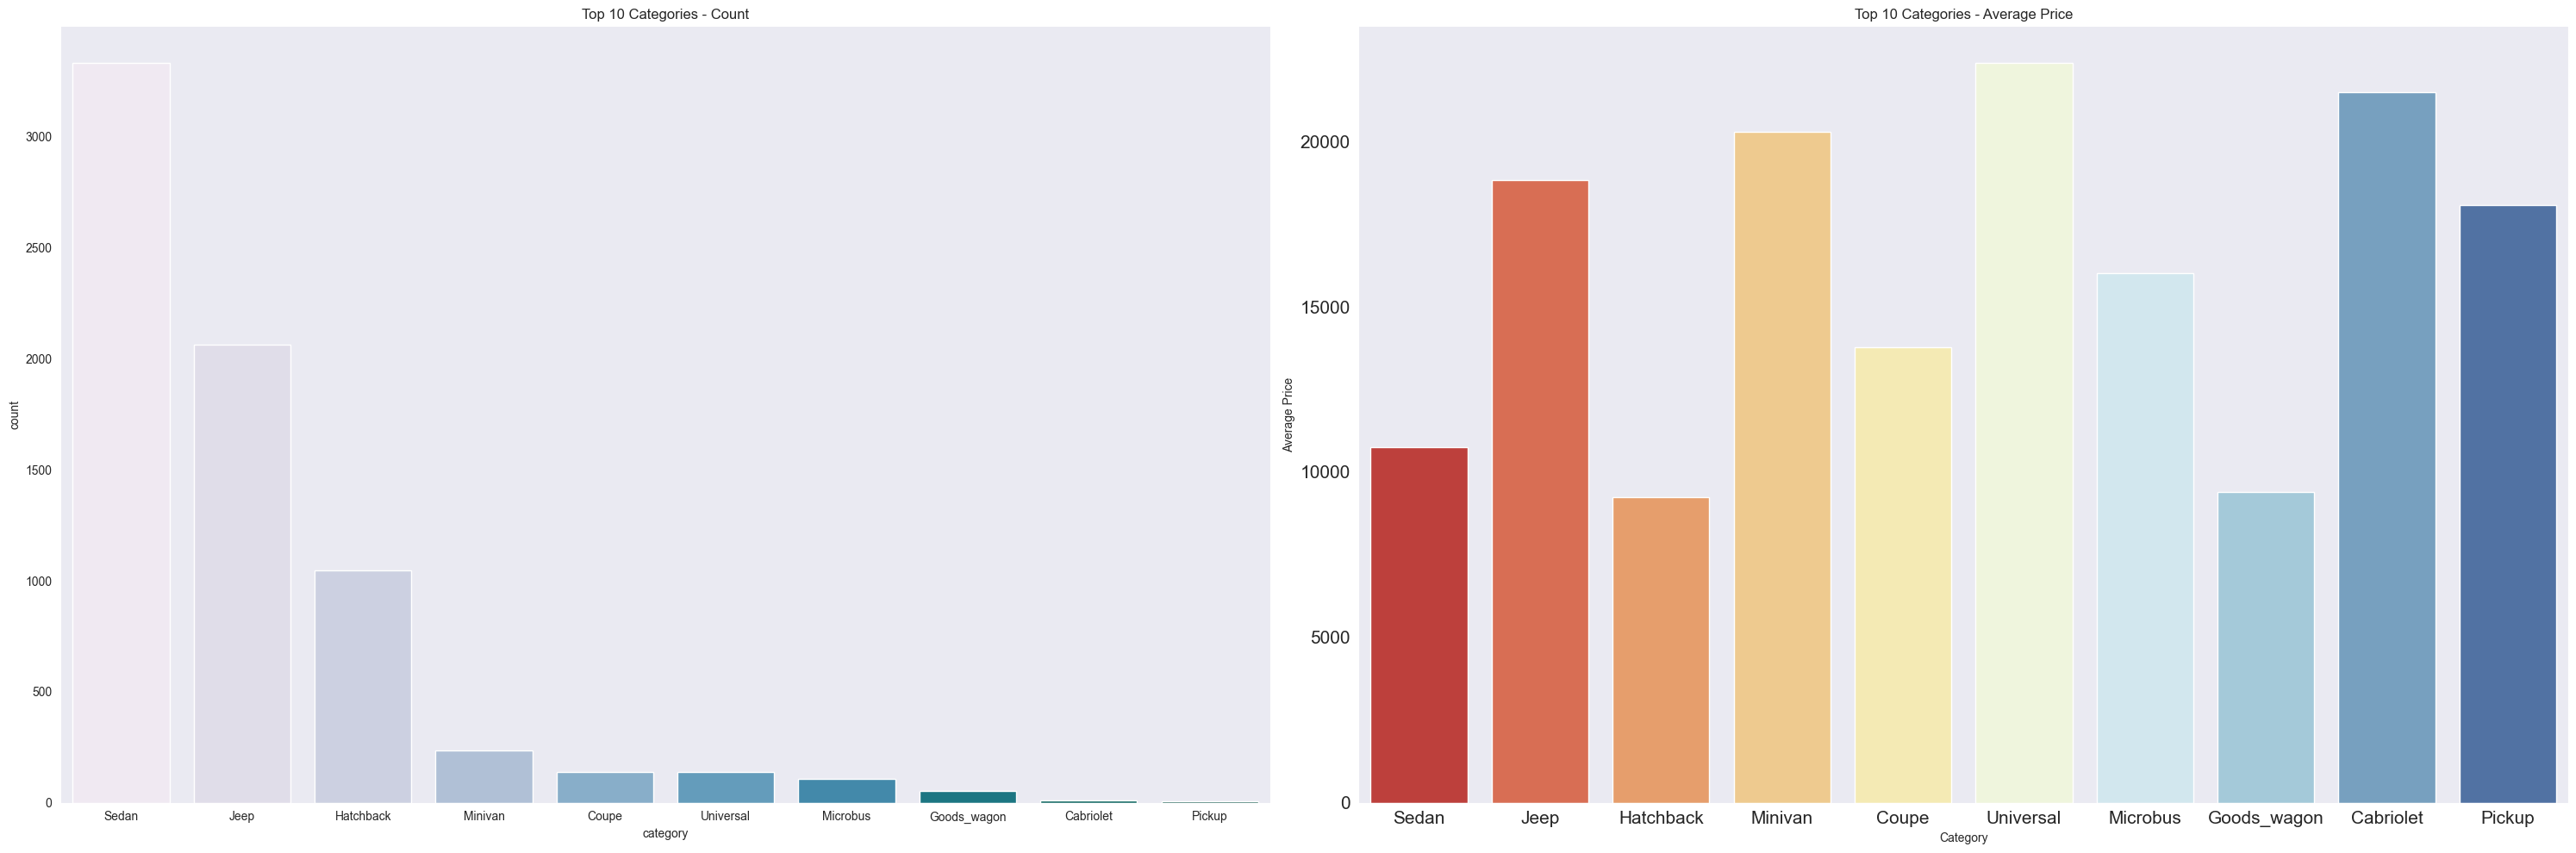

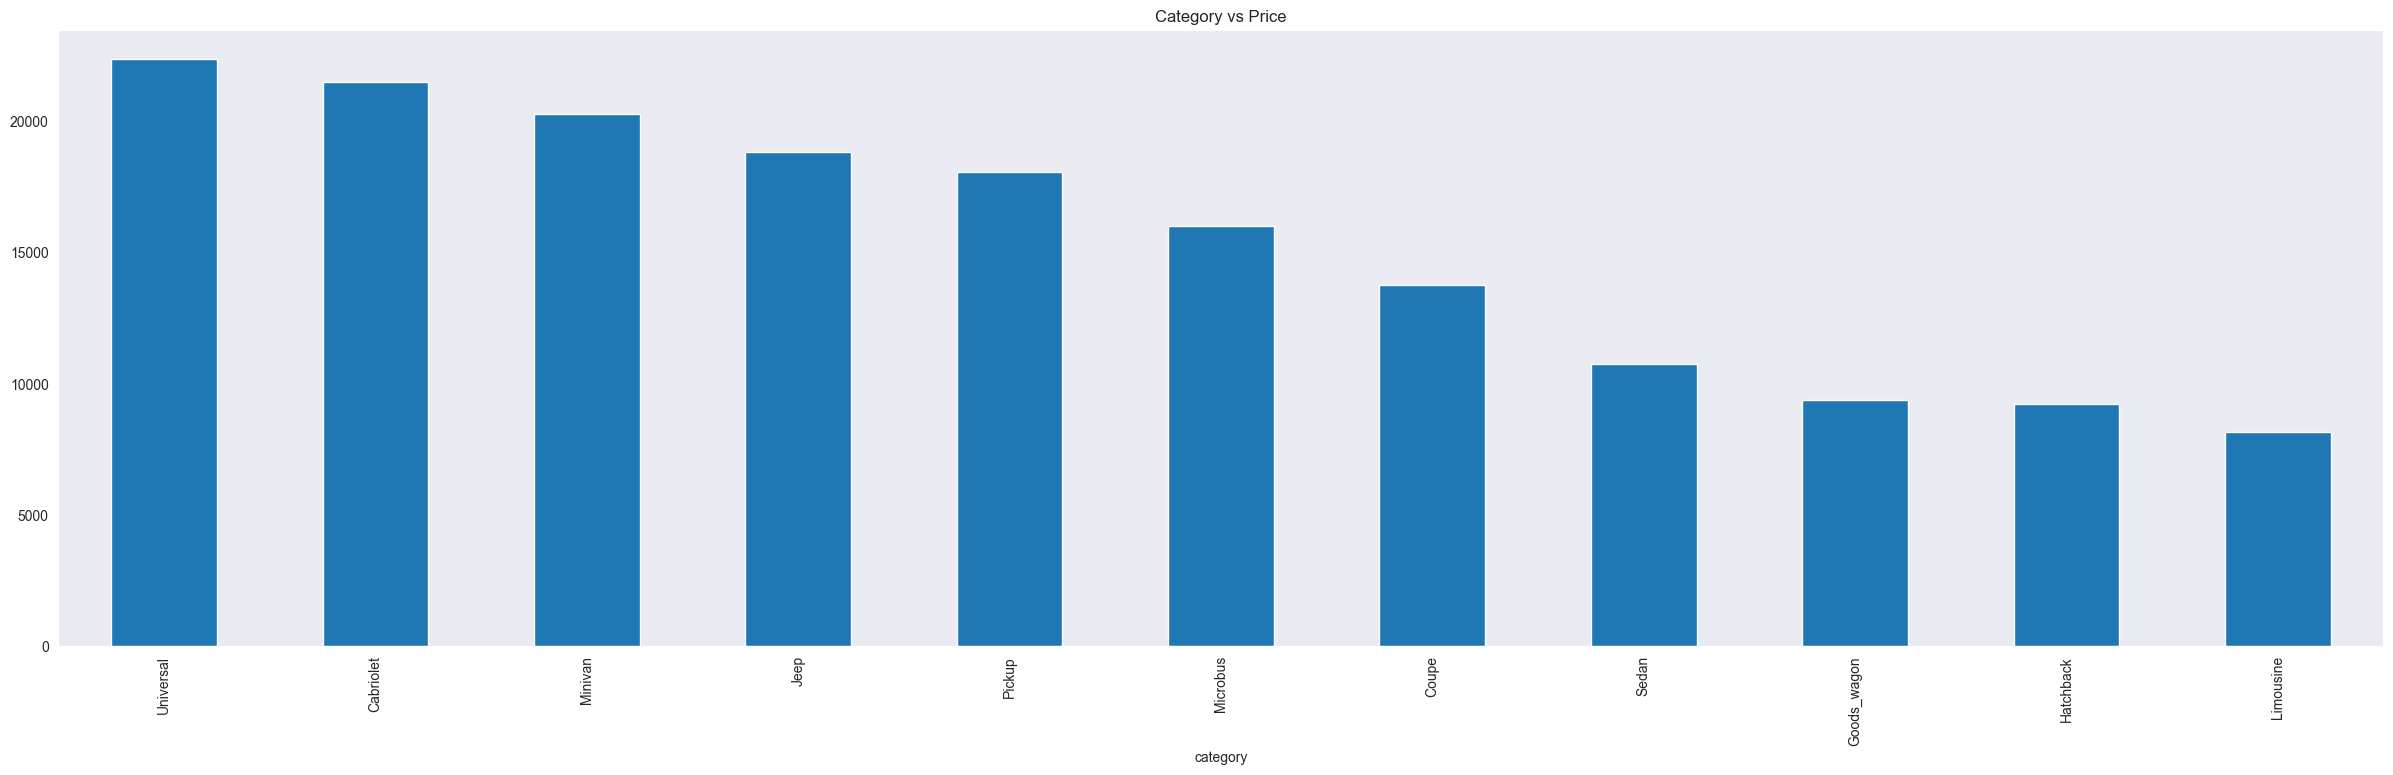

In [93]:
plt.figure(figsize=(30,10))

#Calculate count and average price of each category
category_stats = final_test.groupby('category').agg({'category': 'count', 'price': 'mean'})

#Select the top 10 categories
top_10_categories = category_stats.nlargest(10, 'category')

#Rename the columns
top_10_categories.columns = ['Count', 'Average Price']

#Display the DataFrame with the top 10 categories, count, and average price
top_10_categories

#Subplot of the countplot for categories
plt.subplot(1, 2, 1)
sns.countplot(x='category', data=final_test, order=final_test['category'].value_counts().index[:10], palette='PuBuGn')
plt.title('Top 10 Categories - Count')

#Subplot of the average price graph for the top 10 categories
plt.subplot(1, 2, 2)
sns.barplot(x='category', y='Average Price', data=top_10_categories.reset_index(), palette='RdYlBu')
plt.title('Top 10 Categories - Average Price')
plt.xlabel('Category')
plt.xticks(fontsize=15) # Set the font size of the x-axis labels
plt.ylabel('Average Price')
plt.yticks(fontsize=15) # Set the font size of the y-axis labels

plt.tight_layout()
plt.show()

df = final_test.groupby("category")["price"].mean().sort_values(ascending = False)
df = df.head(40)
df.plot.bar(figsize=(30,8))
plt.title('Category vs Price')
plt.show()

#### model

* Main Changes:
Prius: The Prius model shows a significant change in the average price between the predicted prices table and the test dataset. In the predicted prices table, the average price for Prius is $11,473.09, while in the test dataset, it increased to $9,048.05. This suggests a decrease in the predicted prices for Prius, potentially influenced by factors such as changes in market conditions, depreciation, or shifts in consumer preferences.
Sonata: The Sonata model also exhibits a notable change in the average price. In the predicted prices table, the average price for Sonata is $14,452.19, while in the test dataset, it decreased to $11,866.71. This indicates a decrease in the predicted prices for Sonata, potentially influenced by factors such as changes in market demand, competition, or the introduction of newer models.
* Main Similarities:
Camry: The Camry model demonstrates a similarity in the average price between the predicted prices table ($12,591.27) and the test dataset ($10,047.52). This suggests consistency in the pricing pattern for Camry, indicating stable market demand and pricing stability.
Elantra: The Elantra model also shows a similarity in the average price between the predicted prices table ($16,092.21) and the test dataset ($13,278.01). This indicates a consistent pricing trend for Elantra, suggesting stable market demand and pricing stability.

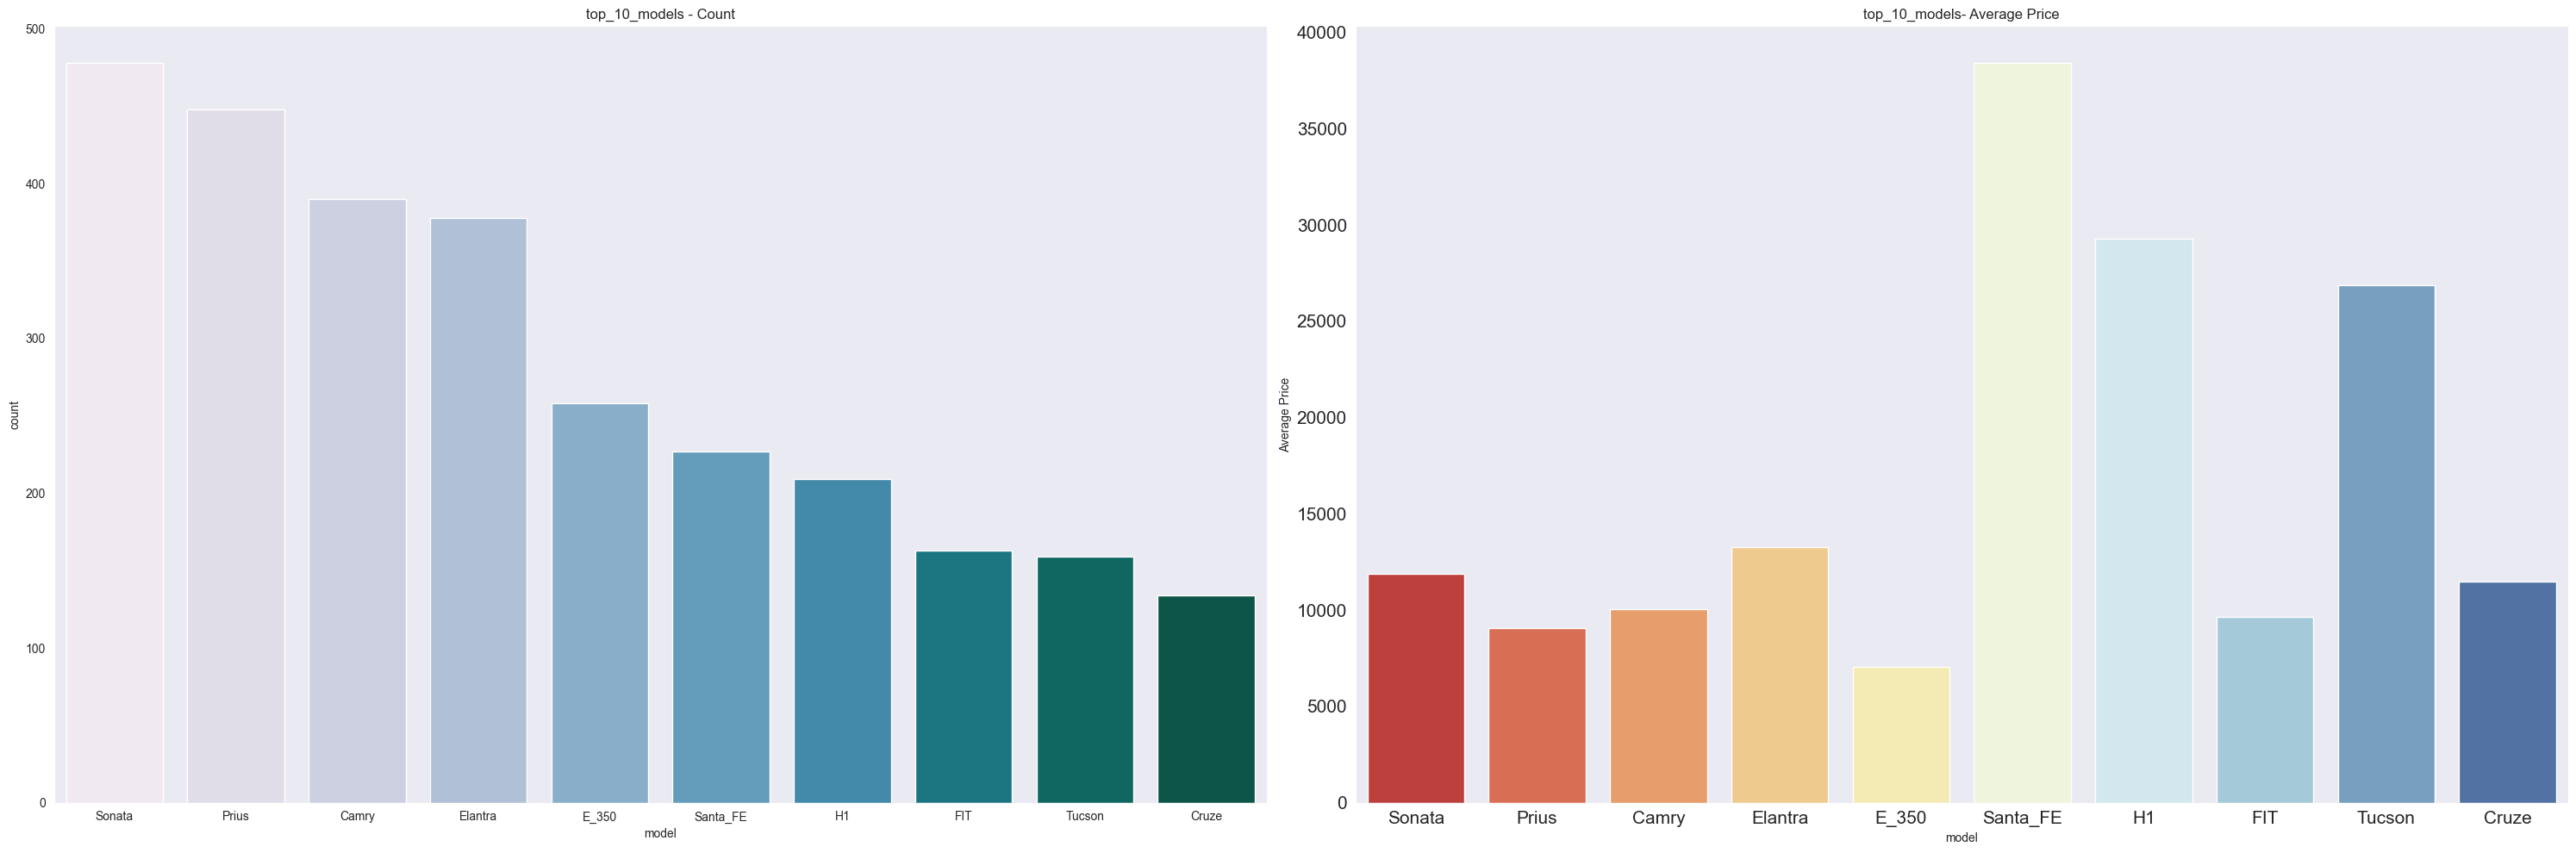

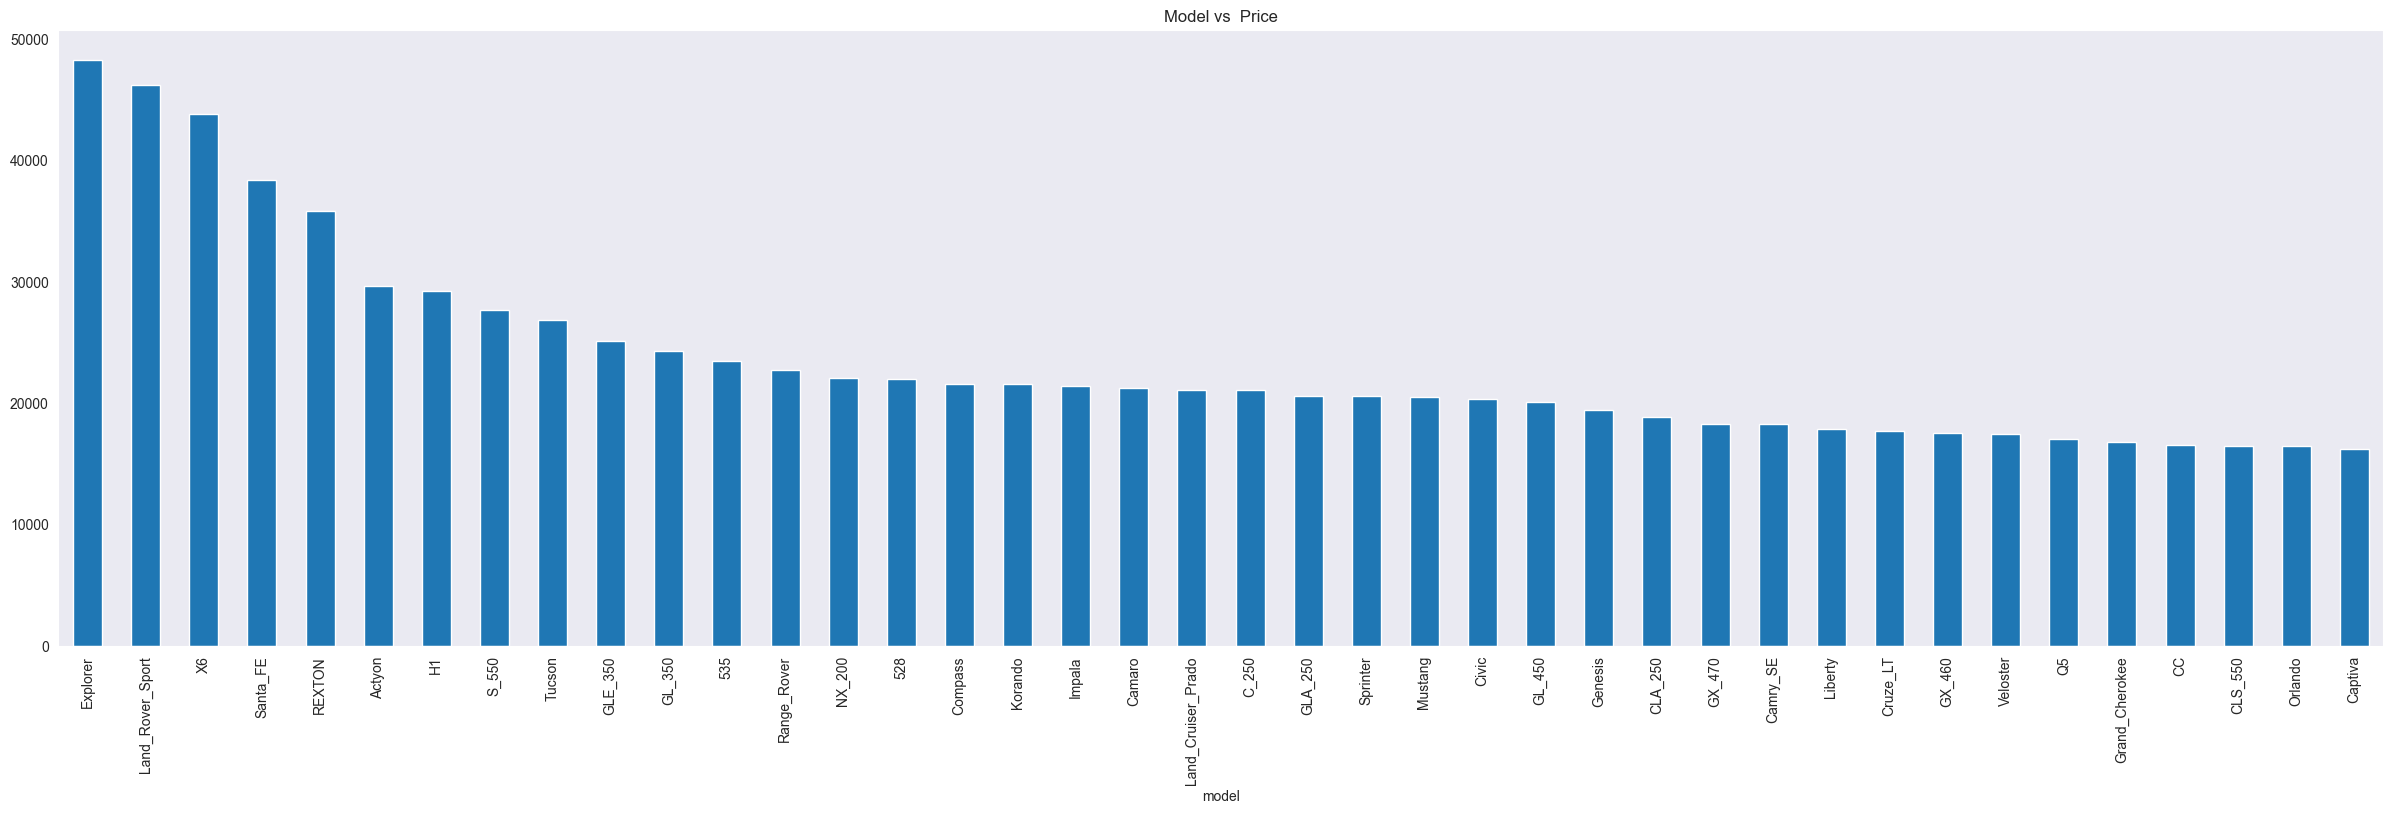

In [124]:
# Calculate count and average price of each car model
model_stats = final_test.groupby('model').agg({'model': 'count', 'price': 'mean'})

# Select the top 10 car models
top_10_models = model_stats.nlargest(10, 'model')

# Rename the columns
top_10_models.columns = ['Count', 'Average Price']

# Display the DataFrame with the top 10 car models, count, and average price
top_10_models

plt.figure(figsize=(30,10))

# Subplot do countplot das marcas
plt.subplot(1, 2, 1)
sns.countplot(x='model', data=final_test, order=final_test['model'].value_counts().index[:10], palette='PuBuGn')
plt.title('top_10_models - Count')

# Subplot do gráfico da média de preço das top 10 marcas
plt.subplot(1, 2, 2)
sns.barplot(x='model', y='Average Price', data=top_10_models.reset_index(), palette='RdYlBu')
plt.title('top_10_models- Average Price')
plt.xlabel('model')
plt.xticks(fontsize=15)  # Define o tamanho da fonte dos rótulos no eixo x
plt.ylabel('Average Price')
plt.yticks(fontsize=15)  # Define o tamanho da fonte dos rótulos no eixo x


plt.tight_layout()
plt.show()

df = final_test.groupby("model")["price"].mean().sort_values(ascending = False)
df = df.head(40)
df.plot.bar(figsize=(30,8))
plt.title('Model vs  Price')
plt.show()

* Main Changes:
prod_year 2016: In the training dataset, vehicles from the year 2016 had an average price of $27,083.85, whereas in the predicted prices table, the average predicted price increased significantly to $23,632.72. This indicates a notable decrease in the predicted prices for vehicles from the year 2016, potentially influenced by factors such as depreciation, changes in market conditions, or the introduction of newer models.
prod_year 2008: In the training dataset, vehicles from the year 2008 had an average price of $10,488.32, while in the predicted prices table, the average predicted price decreased significantly to $7,447.10. This suggests a significant drop in the predicted prices for vehicles from the year 2008, which could be attributed to factors such as age, wear and tear, or changes in market demand for older vehicles.

* Main Similarities:
prod_year 2012: The average price for vehicles from the year 2012 remained relatively consistent between the training dataset ($14,670.27) and the predicted prices table ($11,903.92). This suggests a stable pricing pattern for vehicles from the year 2012, indicating consistent market demand and pricing stability.
prod_year 2014: The average price for vehicles from the year 2014 also remained relatively stable between the training dataset ($17,290.86) and the predicted prices table ($13,986.76). This indicates a consistent pricing trend for vehicles from the year 2014, implying steady market demand and pricing stability.

#### prod_year

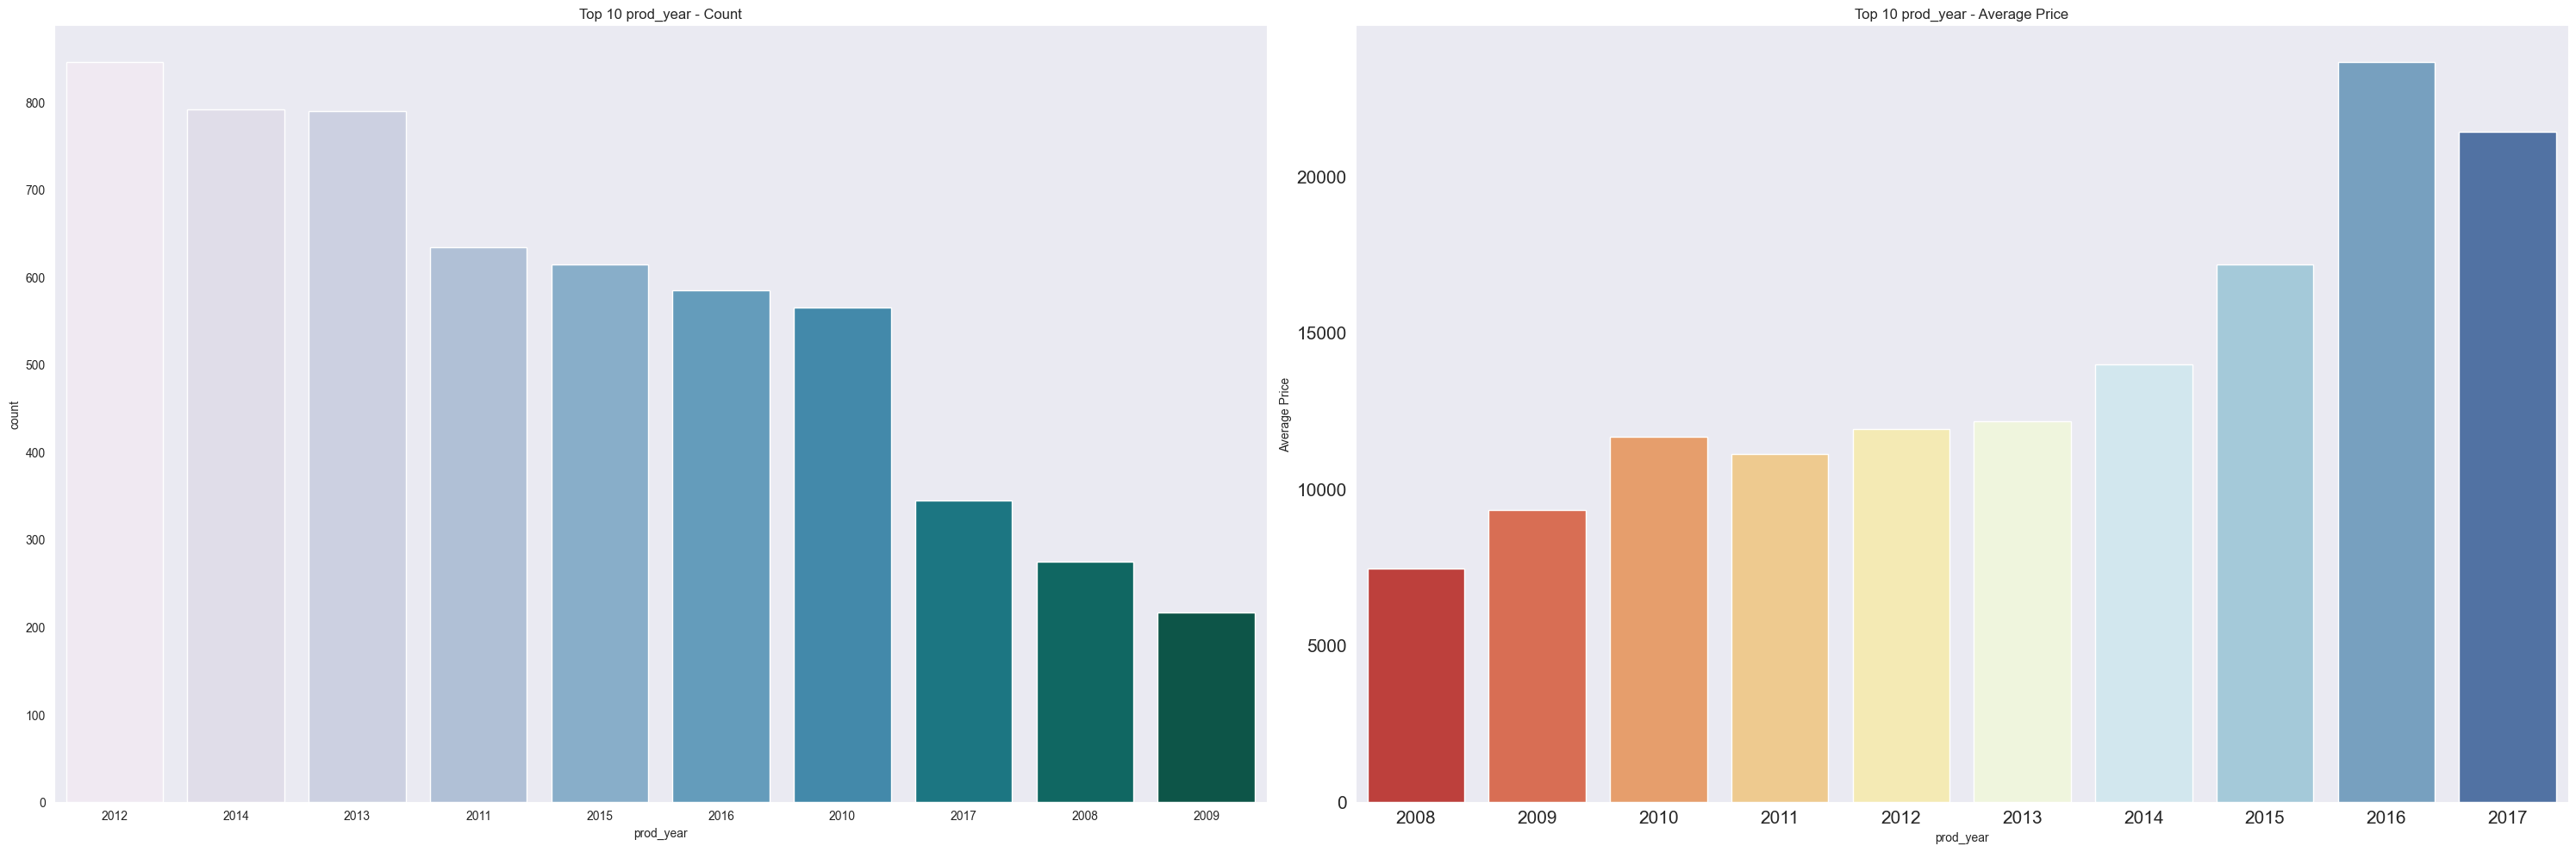

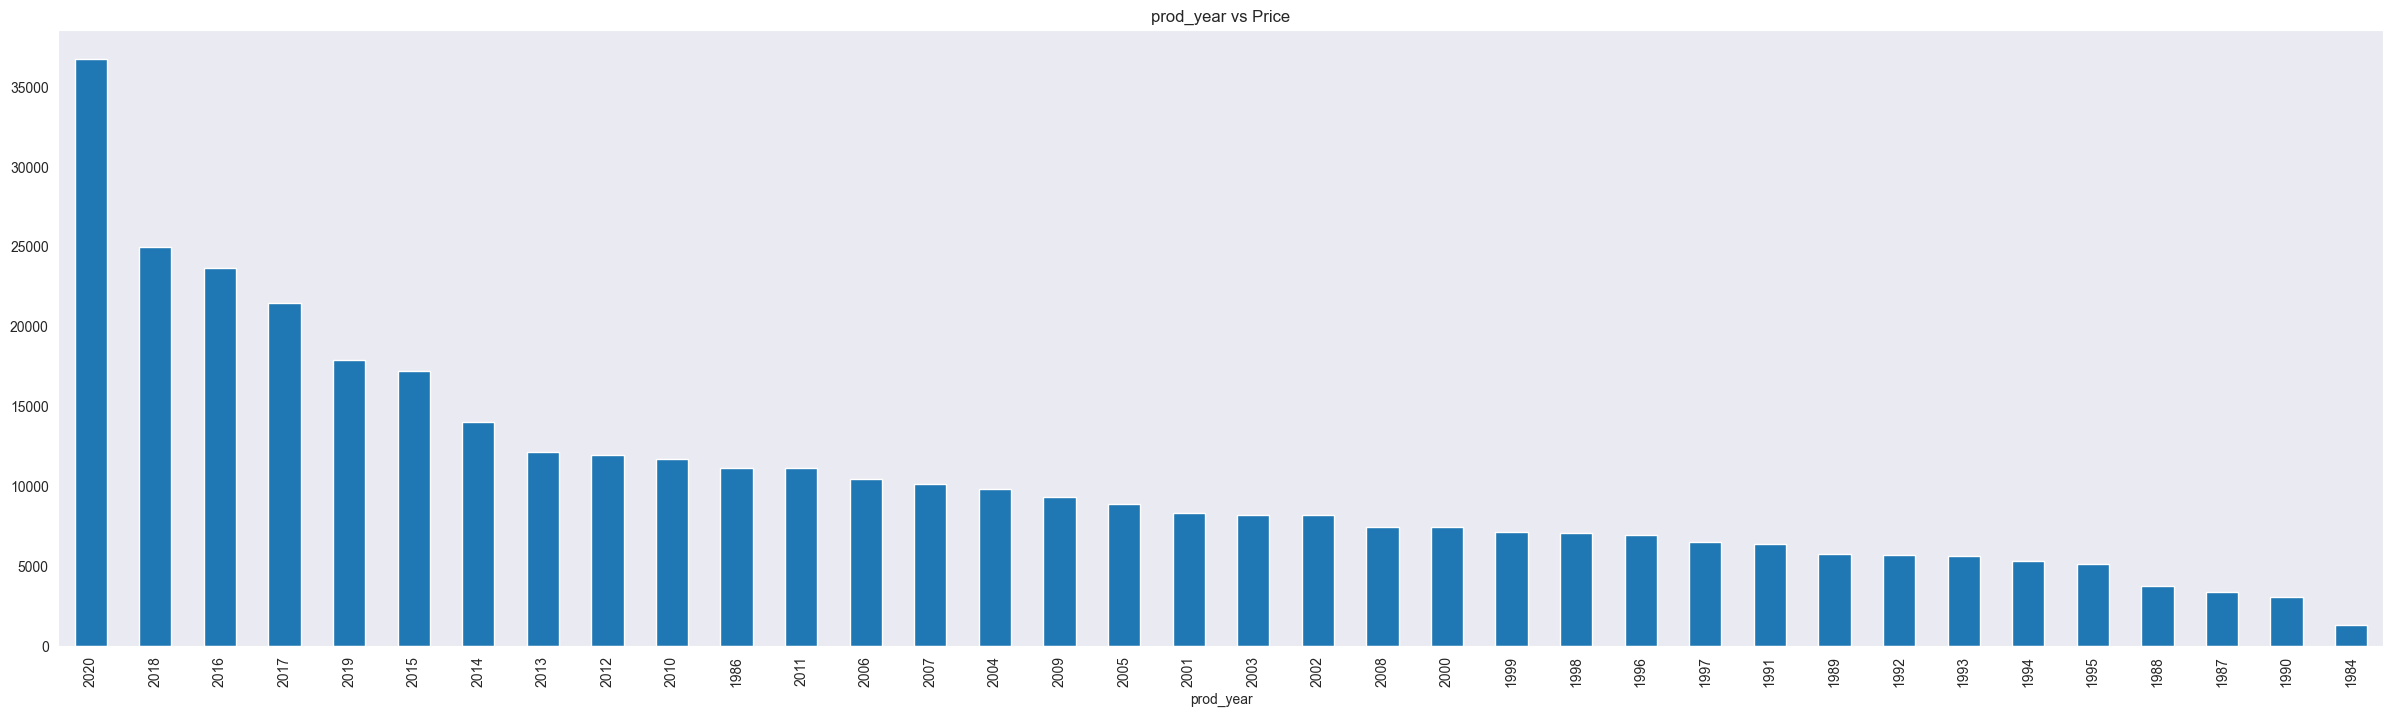

In [120]:
#Calculate count and average price of each prod_year
prod_year_stats = final_test.groupby('prod_year').agg({'prod_year': 'count', 'price': 'mean'})

#Select the top 10 prod_year
top_10_prod_year = prod_year_stats.nlargest(10, 'prod_year')

#Rename the columns
top_10_prod_year.columns = ['Count', 'Average Price']

#Display the DataFrame with the top 10 prod_year, count, and average price
top_10_prod_year

plt.figure(figsize=(30,10))

#Subplot of the countplot for prod_year
plt.subplot(1, 2, 1)
sns.countplot(x='prod_year', data=final_test, order=final_test['prod_year'].value_counts().index[:10], palette='PuBuGn')
plt.title('Top 10 prod_year - Count')

#Subplot of the average price graph for the top 10 prod_year
plt.subplot(1, 2, 2)
sns.barplot(x='prod_year', y='Average Price', data=top_10_prod_year.reset_index(), palette='RdYlBu')
plt.title('Top 10 prod_year - Average Price')
plt.xlabel('prod_year')
plt.xticks(fontsize=15) # Set the font size of the x-axis labels
plt.ylabel('Average Price')
plt.yticks(fontsize=15) # Set the font size of the y-axis labels

plt.tight_layout()
plt.show()

df = final_test.groupby("prod_year")["price"].mean().sort_values(ascending=False)
df.plot.bar(figsize=(30,8))
plt.title('prod_year vs Price')
plt.show()

#### brand

* Main Similarities:
HYUNDAI: The average price for HYUNDAI vehicles remained relatively consistent between the training dataset ( $22,258.11) and the predicted prices table ($20,202.87). This indicates stability in the pricing trend for HYUNDAI cars, suggesting a steady market demand and consistent value perception.

TOYOTA: The average price for TOYOTA vehicles also remained relatively stable between the training dataset ($13,739.97) and the predicted prices table ($10,468.17). This suggests a consistent pricing pattern for TOYOTA cars, indicating a stable market demand and pricing stability.
* Main Changes:
MERCEDES_BENZ: The average price in the training dataset for MERCEDES_BENZ vehicles was $15,325.45, while in the predicted prices table, it decreased to $11,377.17. This indicates a notable decrease in the predicted prices for MERCEDES_BENZ vehicles, potentially influenced by factors such as changes in market conditions, supply and demand dynamics, or shifts in consumer preferences.

CHEVROLET: The average price in the training dataset for CHEVROLET vehicles was $14,727.15, while in the predicted prices table, it decreased to $11,754.41. This suggests a significant drop in the predicted prices for CHEVROLET vehicles, which could be attributed to various factors such as changes in market competition, model updates, or fluctuations in the overall automotive market.

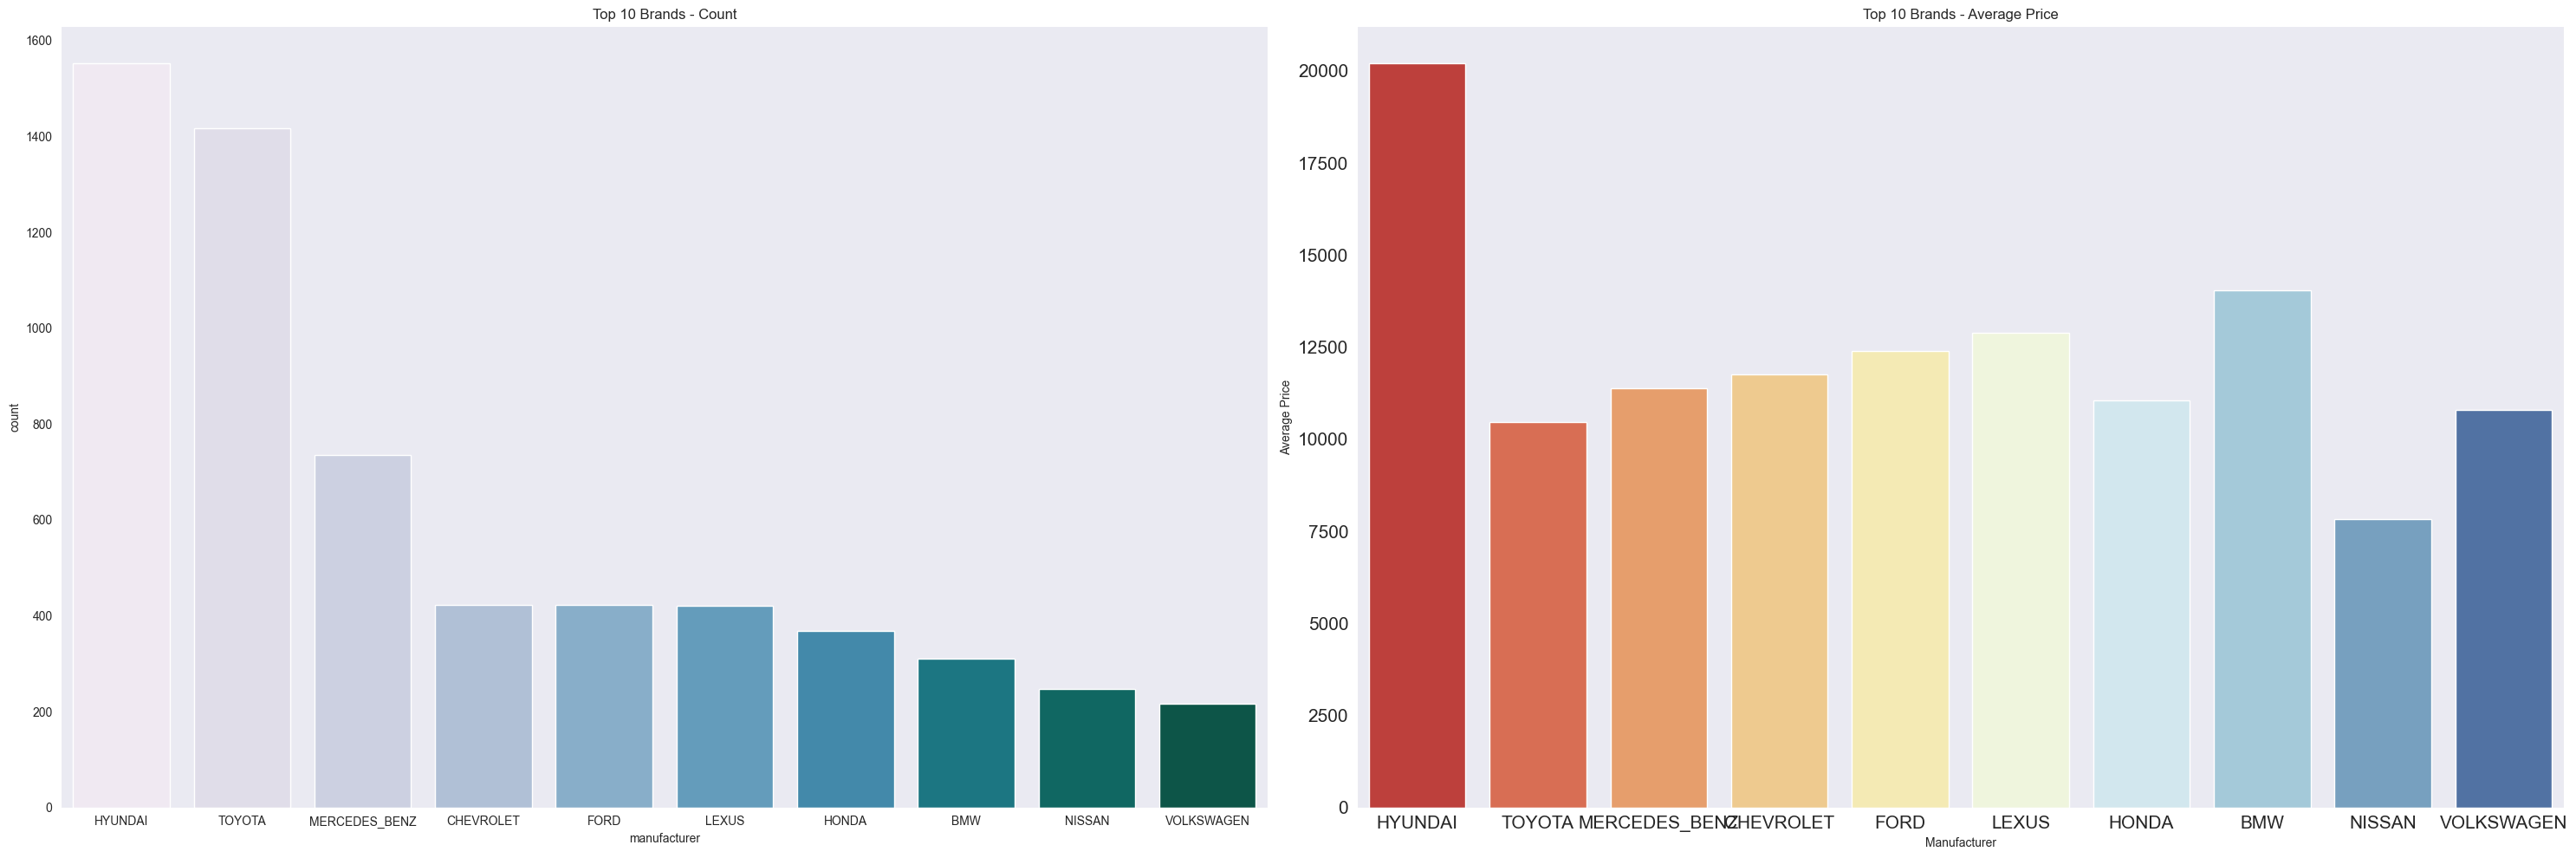

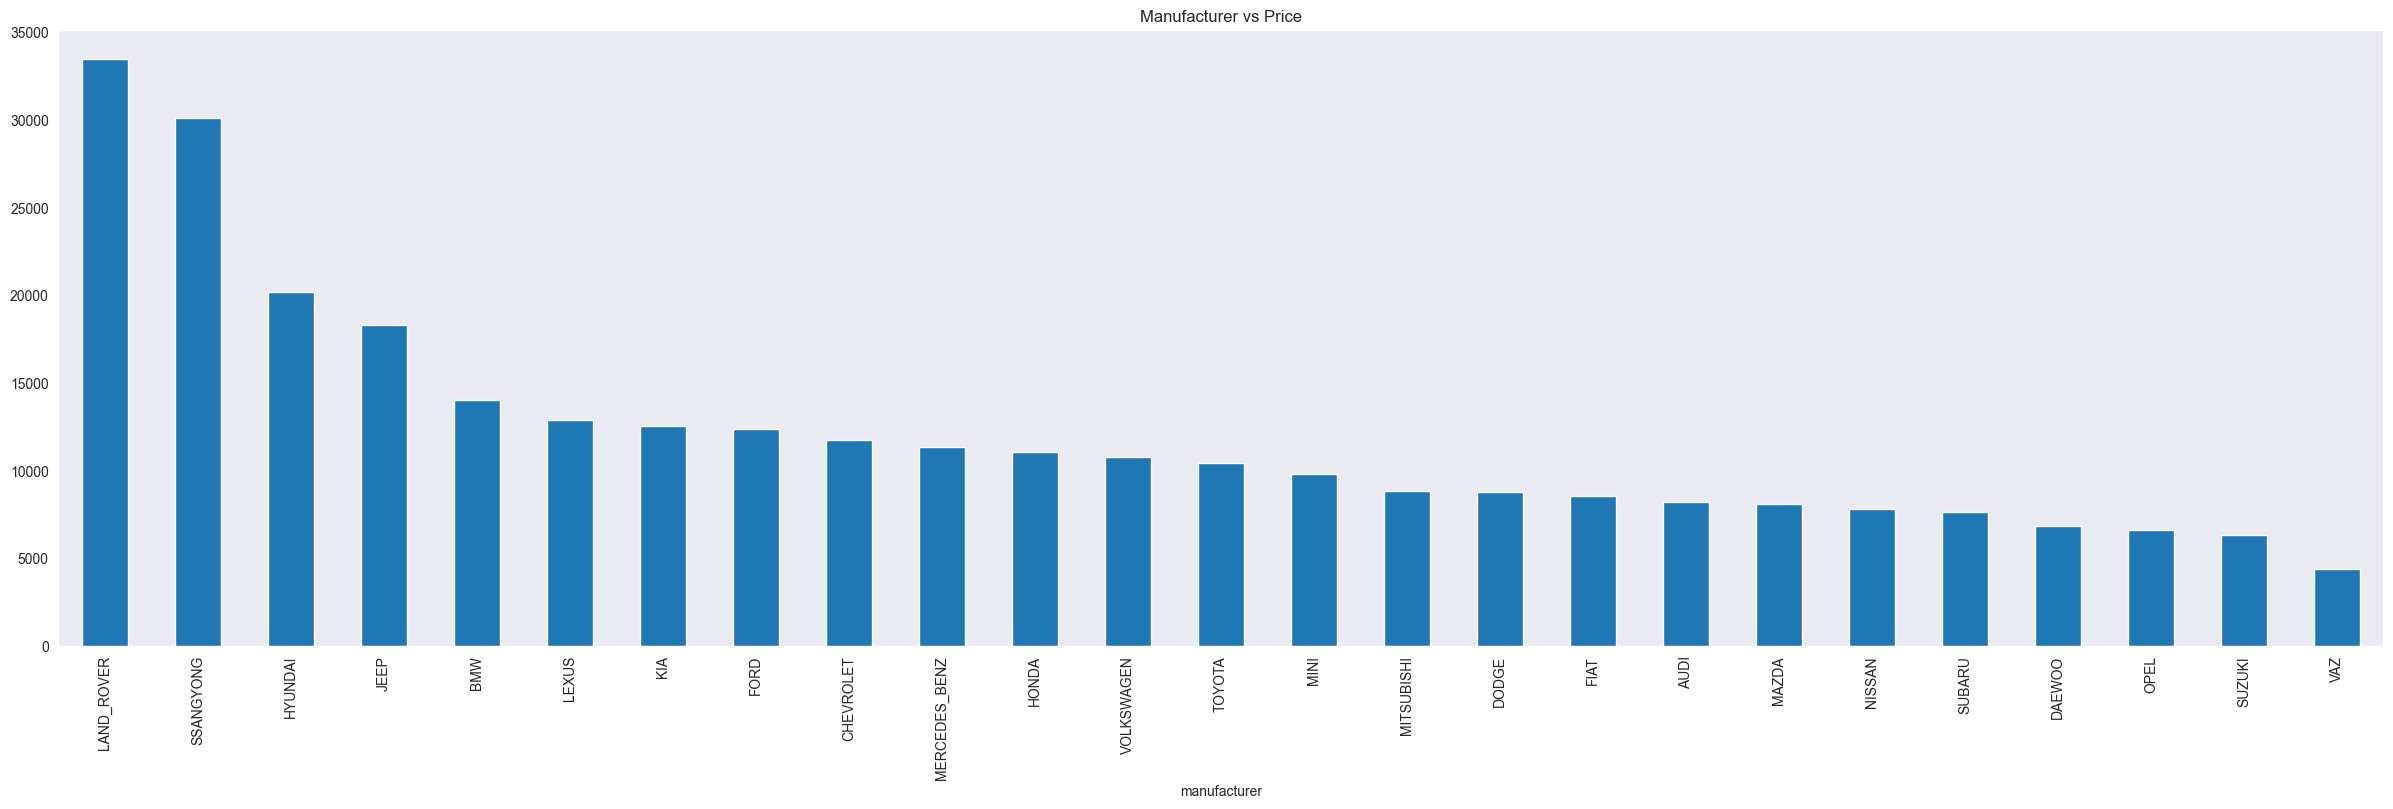

In [114]:
plt.figure(figsize=(30,10))

#Calculate the count and average price of car manufacturers
brand_stats = final_test.groupby('manufacturer').agg({'manufacturer': 'count', 'price': 'mean'})

#Select the top 10 most frequent brands
top_10_brands = brand_stats.nlargest(10, 'manufacturer')

#Rename the columns
top_10_brands.columns = ['Count', 'Average Price']

#Display the DataFrame with the top 10 brands, count, and average price
top_10_brands

#Subplot of the countplot for brands
plt.subplot(1, 2, 1)
sns.countplot(x='manufacturer', data=final_test, order=final_test['manufacturer'].value_counts().index[:10], palette='PuBuGn')
plt.title('Top 10 Brands - Count')

#Subplot of the average price graph for the top 10 brands
plt.subplot(1, 2, 2)
sns.barplot(x='manufacturer', y='Average Price', data=top_10_brands.reset_index(), palette='RdYlBu')
plt.title('Top 10 Brands - Average Price')
plt.xlabel('Manufacturer')
plt.xticks(fontsize=15) # Set the font size of the x-axis labels
plt.ylabel('Average Price')
plt.yticks(fontsize=15) # Set the font size of the y-axis labels

plt.tight_layout()
plt.show()

df = final_test.groupby("manufacturer")["price"].mean().sort_values(ascending=False)
df.plot.bar(figsize=(30,8))
plt.title('Manufacturer vs Price')
plt.show()

#### turbo_stats


In this case, we didn't have many differences. Cars with turbo showed a higher value compared to those without turbo. If there is a difference, it's a variation of around 2,500 lower for both turbo and non-turbo cars, but the difference between them remains very close

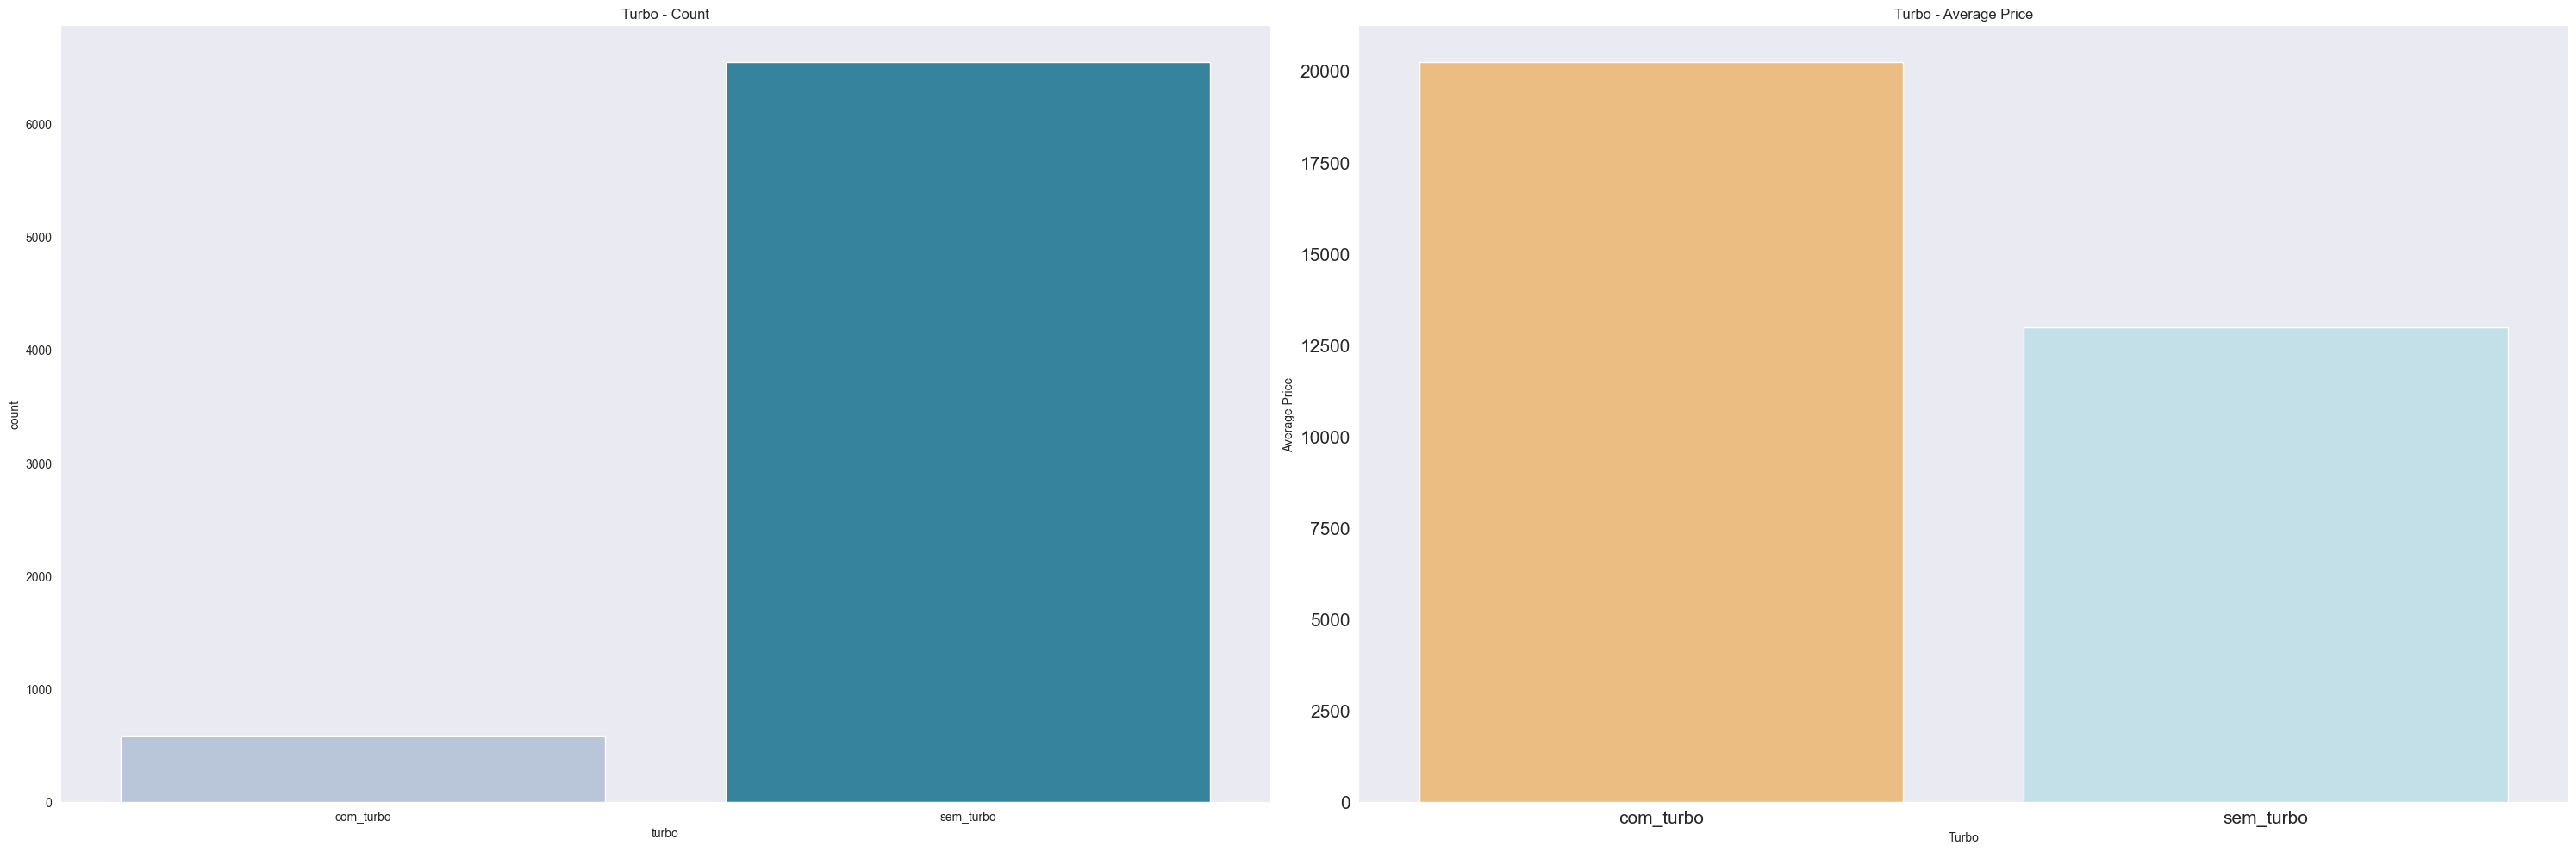

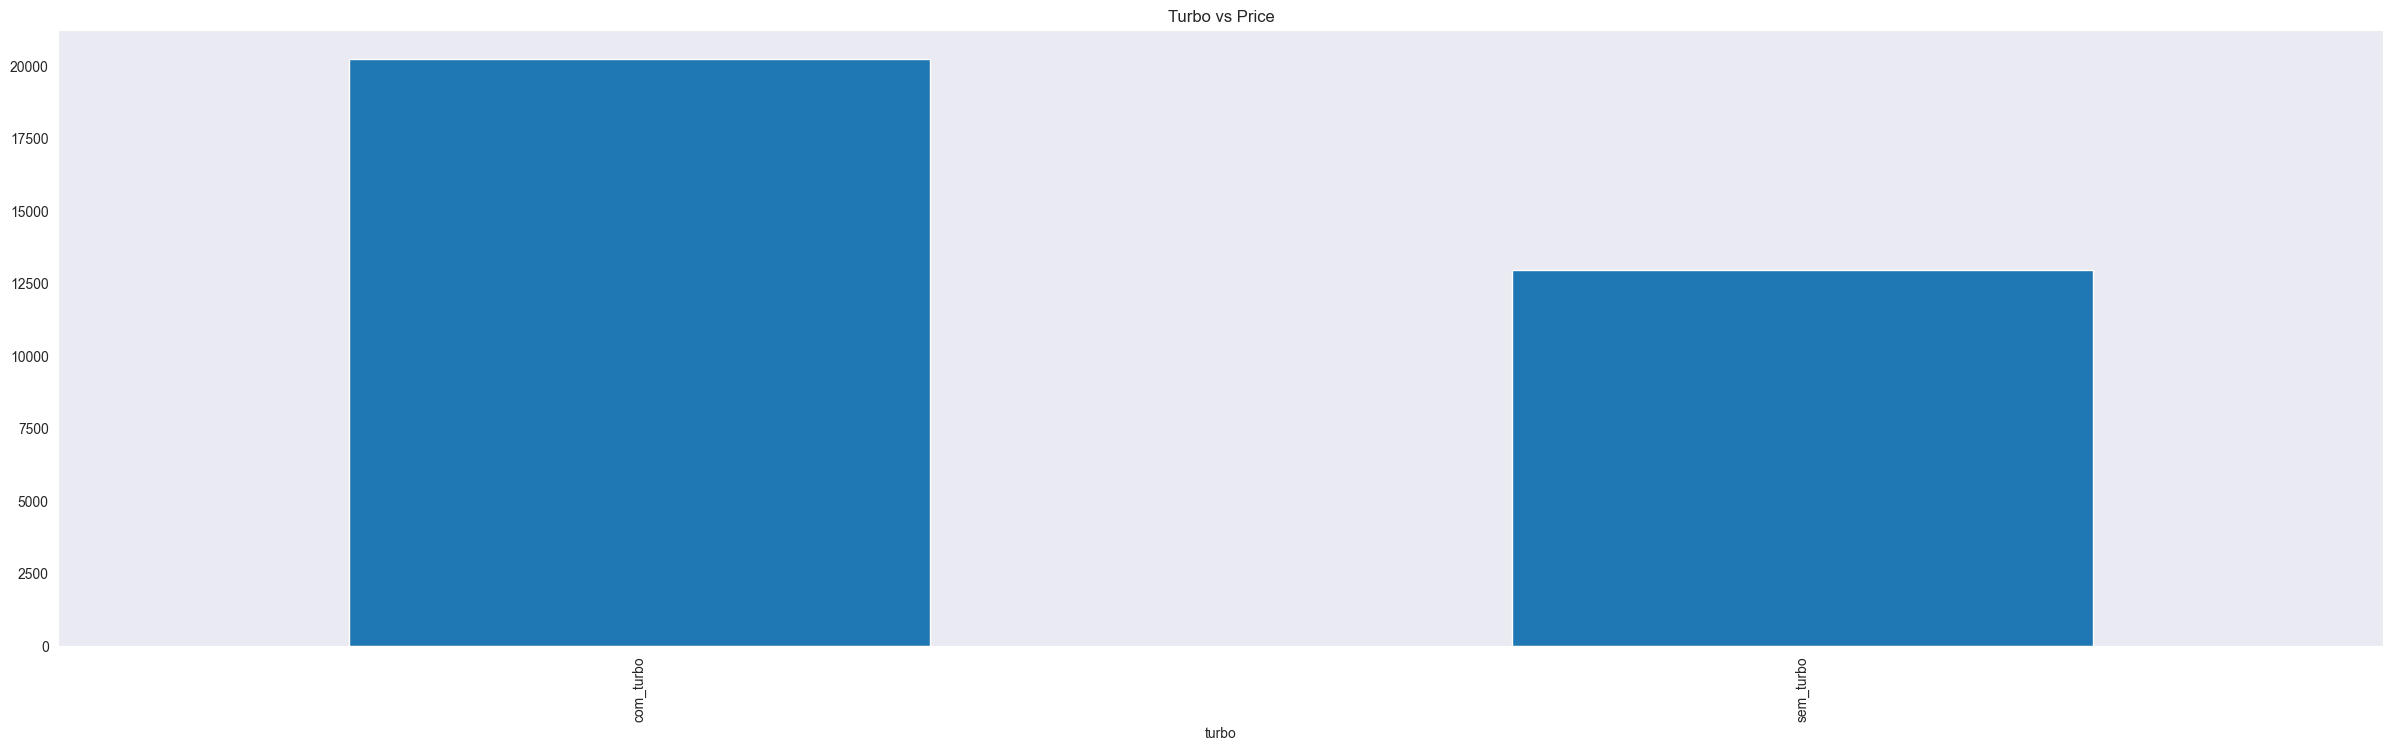

In [102]:
plt.figure(figsize=(30, 10))

# Calculate count and average price of each turbo
turbo_stats = final_test.groupby('turbo').agg({'turbo': 'count', 'price': 'mean'})

# Rename the columns
turbo_stats.columns = ['Count', 'Average Price']

# Display the DataFrame with the turbo values, count, and average price
turbo_stats

# Subplot of countplot for the turbo values
plt.subplot(1, 2, 1)
sns.countplot(x='turbo', data=final_test, palette='PuBuGn')
plt.title('Turbo - Count')

# Subplot of the average price for the turbo values
plt.subplot(1, 2, 2)
sns.barplot(x='turbo', y='Average Price', data=turbo_stats.reset_index(), palette='RdYlBu')
plt.title('Turbo - Average Price')
plt.xlabel('Turbo')
plt.xticks(fontsize=15)
plt.ylabel('Average Price')
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

df = final_test.groupby("turbo")["price"].mean().sort_values(ascending=False)
df = df.head(40)
df.plot.bar(figsize=(30, 8))

plt.title('Turbo vs Price')
plt.show()

#### MANUFACTURER_and_CATEGORY

In [ ]:
# Filter the data for Hyundai and BMW manufacturers
MANUFACTURER_and_CATEGORY = train[(train['manufacturer'] == 'HYUNDAI') | (train['manufacturer'] == 'TOYOTA')]

# Select the desired columns
MANUFACTURER_and_CATEGORY_columns = ['manufacturer', 'price', 'category']
MANUFACTURER_and_CATEGORY = MANUFACTURER_and_CATEGORY[MANUFACTURER_and_CATEGORY_columns]

# Group the data by manufacturer and category
MANUFACTURER_and_CATEGORY_grouped_data = MANUFACTURER_and_CATEGORY.groupby(['manufacturer', 'category'])

# Calculate the mean price for each group
MANUFACTURER_and_CATEGORY_mean_by_group = MANUFACTURER_and_CATEGORY_grouped_data['price'].mean()

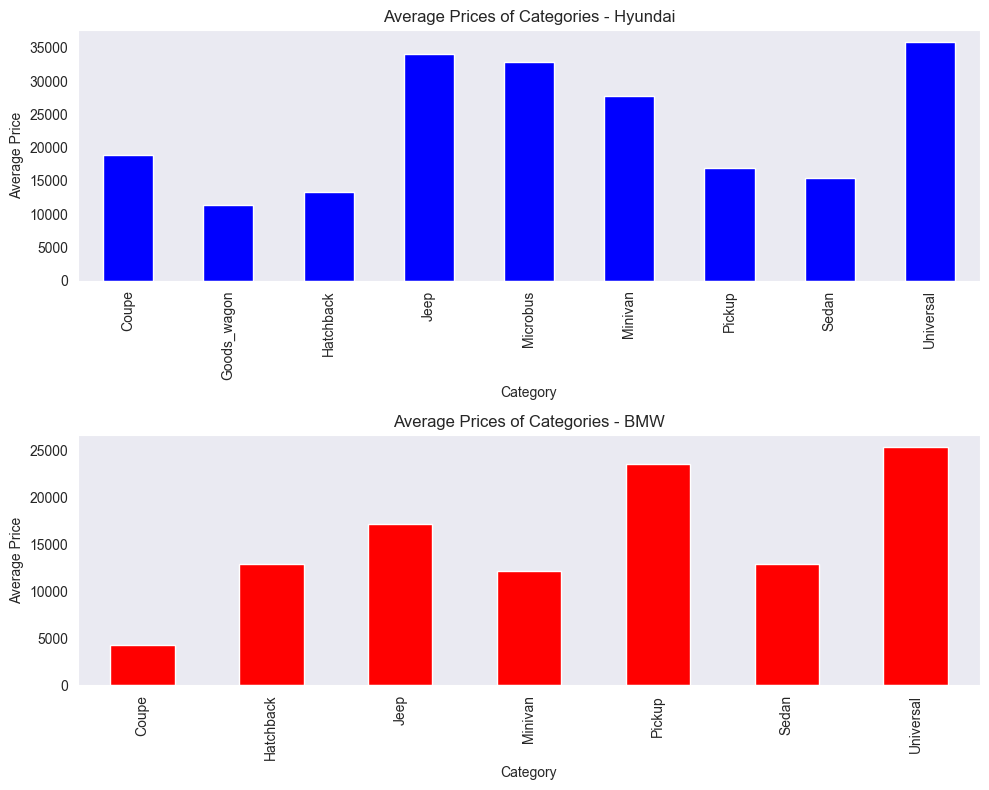

In [101]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot for Hyundai
hyundai_data = MANUFACTURER_and_CATEGORY_mean_by_group.loc['HYUNDAI']
hyundai_data.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Average Prices of Categories - Hyundai')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Average Price')

# Plot for BMW
toyota_data = MANUFACTURER_and_CATEGORY_mean_by_group.loc['TOYOTA']
toyota_data.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Average Prices of Categories - BMW')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Average Price')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()